In [1]:
import pandas as pd
from tqdm import tqdm
from sqlalchemy import create_engine, inspect

import numpy as np
import json

tqdm.pandas(desc="Processing")

In [2]:
%reload_ext sql
%sql mysql://iasamori@localhost/?charset=utf8mb4
%config SqlMagic.displaylimit = 1000
%sql USE iasamori;

There's a new jupysql version available (0.11.1), you're running 0.10.9. To upgrade: pip install jupysql --upgrade
Deploy Shiny apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


Connecting to 'mysql://iasamori@localhost/?charset=utf8mb4'

Running query in 'mysql://iasamori@localhost/?charset=utf8mb4'

++
||
++
++

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R

source("../psych290_data/helper_files/psych290RcodeV1.R")

require(tidyverse)
require(RSQLite)
require(ggthemes)
require(ggpubr)
require(grid)
require(reshape2)
require(psych)
require(lm.beta)
library(caret)
library(ggplot2)
library(pheatmap)
library(RColorBrewer)
library(scales) 
library(lubridate)


library(DBI)
library(RMySQL)

dbcon <- dbConnect(
  drv = MySQL(),
  host = "localhost",  # or your server address
  dbname = "iasamori",
  user = "iasamori",
  port = 3306
)

R[write to console]: Loading required package: ggthemes

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R[write to console]: Loading required package: RSQLite

R[write to console]: Loading required package: ggpubr

R[write to console]: Loading required package: psych

R[write to console]: 
Attaching package: ‘psych’


R[write to console]: The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


R[write to console]: Loading required package: lm.beta

R[write to console]: Loading required package: lattice

R[write to console]: 
Attaching package: ‘caret’


R[write to console]: The following object is masked from ‘package:purrr’:

    lift


R[write to console]: 
Attaching package: ‘scales’


R[write to console]: The following objects are masked from ‘package:psych’:

    alpha, rescale


R[write to console]: The following object is masked from ‘package:purrr’:

    discard


R[write to console]: The following object is masked from ‘package:readr’:

    col_factor




In [5]:
tpc7_norm = pd.read_csv("../data/topic_norms2.csv")
tpc7_norm

group_id         0         1        10       100       101       102  \
0   12_2020  0.000000  0.001587  0.000000  0.000000  0.000000  0.003819   
1    1_2021  0.001447  0.001786  0.001284  0.001770  0.001845  0.001761   
2    2_2021  0.002392  0.001710  0.001697  0.001766  0.001844  0.001751   
3    3_2021  0.001575  0.001816  0.001321  0.002326  0.002201  0.002283   
4    4_2021  0.001103  0.001427  0.001174  0.001730  0.002669  0.002520   
5    5_2021  0.000923  0.001540  0.001151  0.001752  0.002691  0.003066   
6    6_2021  0.001821  0.002116  0.001634  0.002161  0.001928  0.001814   
7    7_2021  0.001596  0.002081  0.000926  0.001691  0.001567  0.002017   
8    8_2021  0.001055  0.001847  0.001609  0.002242  0.002498  0.001208   
9    9_2021  0.001264  0.002044  0.001282  0.002044  0.002532  0.002875   
10  10_2021  0.001164  0.001787  0.000994  0.001653  0.003331  0.002786   
11  11_2021  0.001031  0.001502  0.001325  0.001667  0.002560  0.004838   
12  12_2021  0.001107  0.001490  0.001257  0.002167  0.002418  0.002481   
13   1_2022  0.001161  0.001777  0.001192  0.001845  0.003699  0.002745   
14   2_2022  0.001465  0.002167  0.001524  0.001980  0.002113  0.001962   
15   3_2022  0.001615  0.002501  0.001544  0.001948  0.002279  0.001919   
16   4_2022  0.001384  0.001962  0.001452  0.002330  0.002153  0.002339   
17   5_2022  0.001540  0.002030  0.001475  0.002370  0.002148  0.002258   
18   6_2022  0.001642  0.002123  0.001441  0.002060  0.002160  0.001928   
19   7_2022  0.001832  0.002067  0.001421  0.001850  0.002216  0.002068   
20   8_2022  0.001907  0.002220  0.001078  0.001687  0.002285  0.002004   
21   9_2022  0.001923  0.001909  0.001605  0.002042  0.002602  0.002360   
22  10_2022  0.001798  0.001996  0.001663  0.002067  0.002347  0.002391   
23  11_2022  0.002548  0.002057  0.001309  0.002082  0.002486  0.002490   
24  12_2022  0.002312  0.001927  0.001421  0.001928  0.002273  0.002276   
25   1_2023  0.001601  0.001899  0.001539  0.001857  0.002309  0.002143   
26   2_2023  0.002263  0.002125  0.001715  0.001950  0.002197  0.002110   
27   3_2023  0.002691  0.002236  0.001732  0.001960  0.002102  0.001828   
28   4_2023  0.002411  0.002170  0.001620  0.001989  0.002254  0.001940   
29   5_2023  0.002337  0.002078  0.001483  0.001996  0.002477  0.002093   
30   6_2023  0.002713  0.002098  0.001615  0.001823  0.002288  0.002104   
31   7_2023  0.002519  0.001982  0.001624  0.001840  0.002285  0.002248   
32   8_2023  0.001961  0.002241  0.001632  0.001748  0.002416  0.002093   
33   9_2023  0.001877  0.002541  0.001431  0.001879  0.002237  0.001969   
34  10_2023  0.001694  0.002216  0.001534  0.001748  0.002209  0.001705   
35  11_2023  0.004543  0.002161  0.001763  0.001835  0.002066  0.001957   
36  12_2023  0.002118  0.002072  0.001644  0.001925  0.002253  0.002260   
37   1_2024  0.002093  0.001934  0.001665  0.001854  0.002363  0.002032   
38   2_2024  0.001989  0.002045  0.001669  0.002040  0.002061  0.002031   
39   3_2024  0.002755  0.001878  0.001714  0.001984  0.002199  0.002127   
40   4_2024  0.001926  0.001992  0.001663  0.001971  0.002210  0.002489   
41   5_2024  0.002310  0.001918  0.001524  0.002096  0.002460  0.002505   
42   6_2024  0.001857  0.001905  0.001614  0.001980  0.002255  0.002397   
43   7_2024  0.002591  0.001963  0.001451  0.001795  0.002209  0.002297   
44   8_2024  0.004907  0.002030  0.001457  0.001885  0.002172  0.002019   
45   9_2024  0.002208  0.001987  0.001271  0.002097  0.002509  0.002340   
46  10_2024  0.002137  0.002200  0.001500  0.001929  0.002077  0.001982   
47  11_2024  0.002509  0.001857  0.001225  0.001863  0.002233  0.002236   
48  12_2024  0.002050  0.002253  0.001315  0.001900  0.002147  0.001842   
49   1_2025  0.001787  0.002117  0.001274  0.002171  0.002078  0.001956   
50   2_2025  0.001546  0.002074  0.001473  0.002216  0.002116  0.002044   
51   3_2025  0.001354  0.001557  0.001159  0.002463  0.002223  0.002156   
52   4_2025  0.004376  0.001

In [6]:
deaths_df = pd.read_csv("../data/wonders_death_census_merge.csv")

drug_names = ["heroin", "nat_opioid", "methadone",  "syn_opioid", "cocaine", "unspecified", "cannabis"]
drug_names_cols = [i+"_norm" for i in drug_names]

deaths_df = deaths_df[["Month Code"] + drug_names_cols]
deaths_df

Month Code  heroin_norm  nat_opioid_norm  methadone_norm  syn_opioid_norm  \
0     2021/01     0.284169         0.356190        0.103060         1.670358   
1     2021/02     0.226655         0.324912        0.094038         1.473861   
2     2021/03     0.294457         0.374927        0.102773         1.879459   
3     2021/04     0.273307         0.382992        0.100343         1.889949   
4     2021/05     0.245234         0.366044        0.097310         1.855526   
5     2021/06     0.217469         0.346384        0.087048         1.788849   
6     2021/07     0.241494         0.347486        0.087022         1.829571   
7     2021/08     0.225393         0.344860        0.091481         1.850687   
8     2021/09     0.206631         0.335662        0.085419         1.798921   
9     2021/10     0.198417         0.307847        0.081171         1.778237   
10    2021/11     0.173683         0.305899        0.083837         1.683944   
11    2021/12     0.175105         0.306959        0.093709         1.753448   
12    2022/01     0.183742         0.317045        0.093973         1.789981   
13    2022/02     0.164193         0.297769        0.071741         1.740089   
14    2022/03     0.171032         0.311159        0.076214         1.893357   
15    2022/04     0.152346         0.292697        0.074974         1.762180   
16    2022/05     0.146568         0.297332        0.084224         1.802572   
17    2022/06     0.145289         0.296868        0.082081         1.784505   
18    2022/07     0.148495         0.316750        0.088319         1.903494   
19    2022/08     0.140605         0.282407        0.090645         1.891885   
20    2022/09     0.130329         0.295333        0.074132         1.799200   
21    2022/10     0.124854         0.295408        0.085128         1.925083   
22    2022/11     0.117902         0.265055        0.084472         1.847329   
23    2022/12     0.132735         0.286946        0.092169         1.967462   
24    2023/01     0.110296         0.267990        0.084064         1.929889   
25    2023/02     0.111124         0.256806        0.077459         1.768745   
26    2023/03     0.113732         0.296538        0.083960         1.985554   
27    2023/04     0.110087         0.274920        0.091640         1.947052   
28    2023/05     0.105556         0.278013        0.086229         1.986528   
29    2023/06     0.111721         0.248104        0.080225         1.855878   
30    2023/07     0.093526         0.250292        0.091744         1.880607   
31    2023/08     0.093443         0.239392        0.084544         1.834746   
32    2023/09     0.090098         0.223467        0.071427         1.665039   
33    2023/10     0.084690         0.234822        0.079952         1.656780   
34    2023/11     0.071009         0.215985        0.076039         1.530534   
35    2023/12     0.088098         0.216993        0.088985         1.572759   
36    2024/01     0.073559         0.249627        0.088034         1.509873   
37    2024/02     0.076755         0.215504        0.082364         1.397826   
38    2024/03     0.066962         0.207964        0.074041         1.417696   
39    2024/04     0.080173         0.209863        0.080762         1.339353   
40    2024/05     0.072157         0.212936        0.076280         1.307950   
41    2024/06     0.062091         0.195689        0.079747         1.240639   
42    2024/07     0.067037         0.194936        0.075858         1.120517   
43    2024/08     0.058185         0.189248        0.079637         1.027052   
44    2024/09     0.057858         0.170931        0.075186         0.879323   
45    2024/10     0.063698         0.167610        0.073091         0.911142   
46    2024/11     0.063666         0.150802        0.075988         0.888971   
47    2024/12     0.040469         0.121113        0.054838         0.638407   

    cocaine_norm  unspecified_norm  cannabis_norm  
0       0.550860          0.04

In [7]:
death_tpc7_df = pd.merge(deaths_df, tpc7_norm, on='Month Code', how='inner')

years = [2022,2023, 2024]
death_tpc7_df = death_tpc7_df[death_tpc7_df["year"].isin(years)]
death_tpc7_df = death_tpc7_df.loc[:41]
death_tpc7_df

Month Code  heroin_norm  nat_opioid_norm  methadone_norm  syn_opioid_norm  \
12    2022/01     0.183742         0.317045        0.093973         1.789981   
13    2022/02     0.164193         0.297769        0.071741         1.740089   
14    2022/03     0.171032         0.311159        0.076214         1.893357   
15    2022/04     0.152346         0.292697        0.074974         1.762180   
16    2022/05     0.146568         0.297332        0.084224         1.802572   
17    2022/06     0.145289         0.296868        0.082081         1.784505   
18    2022/07     0.148495         0.316750        0.088319         1.903494   
19    2022/08     0.140605         0.282407        0.090645         1.891885   
20    2022/09     0.130329         0.295333        0.074132         1.799200   
21    2022/10     0.124854         0.295408        0.085128         1.925083   
22    2022/11     0.117902         0.265055        0.084472         1.847329   
23    2022/12     0.132735         0.286946        0.092169         1.967462   
24    2023/01     0.110296         0.267990        0.084064         1.929889   
25    2023/02     0.111124         0.256806        0.077459         1.768745   
26    2023/03     0.113732         0.296538        0.083960         1.985554   
27    2023/04     0.110087         0.274920        0.091640         1.947052   
28    2023/05     0.105556         0.278013        0.086229         1.986528   
29    2023/06     0.111721         0.248104        0.080225         1.855878   
30    2023/07     0.093526         0.250292        0.091744         1.880607   
31    2023/08     0.093443         0.239392        0.084544         1.834746   
32    2023/09     0.090098         0.223467        0.071427         1.665039   
33    2023/10     0.084690         0.234822        0.079952         1.656780   
34    2023/11     0.071009         0.215985        0.076039         1.530534   
35    2023/12     0.088098         0.216993        0.088985         1.572759   
36    2024/01     0.073559         0.249627        0.088034         1.509873   
37    2024/02     0.076755         0.215504        0.082364         1.397826   
38    2024/03     0.066962         0.207964        0.074041         1.417696   
39    2024/04     0.080173         0.209863        0.080762         1.339353   
40    2024/05     0.072157         0.212936        0.076280         1.307950   
41    2024/06     0.062091         0.195689        0.079747         1.240639   

    cocaine_norm  unspecified_norm  cannabis_norm group_id         0  ...  \
12      0.638293          0.031825       0.034226   1_2022  0.001161  ...   
13      0.636662          0.028516       0.031218   2_2022  0.001465  ...   
14      0.690130          0.032106       0.033906   3_2022  0.001615  ...   
15      0.669365          0.031489       0.027890   4_2022  0.001384  ...   
16      0.683383          0.029373       0.026376   5_2022  0.001540  ...   
17      0.669826          0.027560       0.027859   6_2022  0.001642  ...   
18      0.694275          0.025448       0.028741   7_2022  0.001832  ...   
19      0.712000          0.028121       0.029617   8_2022  0.001907  ...   
20      0.691402          0.020625       0.028397   9_2022  0.001923  ...   
21      0.721346          0.026882       0.028077  10_2022  0.001798  ...   
22      0.699352          0.021491       0.026565  11_2022  0.002548  ...   
23      0.748089          0.027442       0.024757  12_2022  0.002312  ...   
24      0.750612          0.026233       0.028617   1_2023  0.001601  ...   
25      0.682235          0.013108       0.027409   2_2023  0.002263  ...   
26      0.781241          0.028284       0.036323   3_2023  0.002691  ...   
27      0.770609          0.024695       0.028861   4_2023  0.002411  ...   
28      0.799844          0.017543       0.033302   5_2023  0.002337  ...   
29      0.765409          0.016045       0.019611   6_2023  0.002713  ...   
30      0.755034          0.017814       0.022268   7_2023 

# trends

## cdc trend - age ranges

In [ ]:
# to be implemented

In [8]:
age_range_df = pd.read_csv("../data/wonders_death_census_age_range.csv")
age_range_cols = age_range_df.loc[:, 'cocaine_20_24_norm':'syn_opioid_65_69_norm'].columns.tolist()

print(age_range_cols)
age_range_df

['cocaine_20_24_norm', 'cocaine_25_29_norm', 'cocaine_30_34_norm', 'cocaine_35_39_norm', 'cocaine_40_44_norm', 'cocaine_45_49_norm', 'cocaine_50_54_norm', 'cocaine_55_59_norm', 'cocaine_60_64_norm', 'cocaine_65_69_norm', 'heroin_30_34_norm', 'heroin_35_39_norm', 'heroin_40_44_norm', 'heroin_45_49_norm', 'heroin_50_54_norm', 'heroin_55_59_norm', 'heroin_60_64_norm', 'methadone_30_34_norm', 'methadone_35_39_norm', 'methadone_40_44_norm', 'methadone_45_49_norm', 'methadone_50_54_norm', 'methadone_55_59_norm', 'methadone_60_64_norm', 'nat_opioid_25_29_norm', 'nat_opioid_30_34_norm', 'nat_opioid_35_39_norm', 'nat_opioid_40_44_norm', 'nat_opioid_45_49_norm', 'nat_opioid_50_54_norm', 'nat_opioid_55_59_norm', 'nat_opioid_60_64_norm', 'nat_opioid_65_69_norm', 'nat_opioid_70_74_norm', 'syn_opioid_15_19_norm', 'syn_opioid_20_24_norm', 'syn_opioid_25_29_norm', 'syn_opioid_30_34_norm', 'syn_opioid_35_39_norm', 'syn_opioid_40_44_norm', 'syn_opioid_45_49_norm', 'syn_opioid_50_54_norm', 'syn_opioid_55

Month Code  year      month  month_num  resident_population  month_num_str  \
0     2021/01  2021    January          1            331845010              1   
1     2021/02  2021   February          2            331781640              2   
2     2021/03  2021      March          3            331797645              3   
3     2021/04  2021      April          4            331860794              4   
4     2021/05  2021        May          5            331927373              5   
5     2021/06  2021       June          6            332001243              6   
6     2021/07  2021       July          7            332099760              7   
7     2021/08  2021     August          8            332309095              8   
8     2021/09  2021  September          9            332476987              9   
9     2021/10  2021    October         10            332632825             10   
10    2021/11  2021   November         11            332790066             11   
11    2021/12  2021   December         12            332944016             12   
12    2022/01  2022    January          1            333076095              1   
13    2022/02  2022   February          2            333143964              2   
14    2022/03  2022      March          3            333270565              3   
15    2022/04  2022      April          4            333450582              4   
16    2022/05  2022        May          5            333634341              5   
17    2022/06  2022       June          6            333818051              6   
18    2022/07  2022       July          7            334017321              7   
19    2022/08  2022     August          8            334269739              8   
20    2022/09  2022  September          9            334537650              9   
21    2022/10  2022    October         10            334790804             10   
22    2022/11  2022   November         11            335024203             11   
23    2022/12  2022   December         12            335254172             12   
24    2023/01  2023    January          1            335459736              1   
25    2023/02  2023   February          2            335661692              2   
26    2023/03  2023      March          3            335876018              3   
27    2023/04  2023      April          4            336097793              4   
28    2023/05  2023        May          5            336315484              5   
29    2023/06  2023       June          6            336552261              6   
30    2023/07  2023       July          7            336806231              7   
31    2023/08  2023     August          8            337103895              8   
32    2023/09  2023  September          9            337409418              9   
33    2023/10  2023    October         10            337703191             10   
34    2023/11  2023   November         11            337986543             11   
35    2023/12  2023   December         12            338259155             12   
36    2024/01  2024    January          1            338505183              1   
37    2024/02  2024   February          2            338740353              2   
38    2024/03  2024      March          3            339000753              3   
39    2024/04  2024      April          4            339268209              4   
40    2024/05  2024        May          5            339539066              5   
41    2024/06  2024       June          6            339824802              6   
42    2024/07  2024       July          7            340110988              7   
43    2024/08  2024     August          8            340294414              8   
44    2024/09  2024  September          9            340489239              9   
45    2024/10  2024    October         10            340671553             10   
46    2024/11  2024   November         11            340843530             11   
47    2024/12  2024   December         12            341004896             12   

    cocaine_20_24_norm  cocaine_2

In [117]:
drug_name = "nat_opioid"
# drug_name = "heroin"
drug_cols = [i for i in age_range_cols if drug_name in i]
drug_age_range_df = age_range_df[["Month Code", "month_num", "year"] + drug_cols]

age_list = [i.split("_")[-3:-1] for i in drug_cols]
new_col_names = ["-".join(i) for i in age_list]
rename_dict = {drug_cols[i]:new_col_names[i] for i in range(len(new_col_names))}

drug_age_range_df = drug_age_range_df.rename(columns=rename_dict)
drug_age_range_df = drug_age_range_df.loc[12:41]

drug_age_range_df = pd.merge(drug_age_range_df, deaths_df, on='Month Code', how='inner')
drug_age_range_df[new_col_names] = drug_age_range_df[new_col_names].div(drug_age_range_df[f"{drug_name}_norm"], axis=0) * 100
drug_age_range_df

Month Code  month_num  year     25-29      30-34      35-39      40-44  \
0     2022/01          1  2022  8.143939   9.469697  13.162879  11.174242   
1     2022/02          2  2022  6.854839  11.794355  11.995968  11.189516   
2     2022/03          3  2022  9.450338  11.186114  11.282546  12.054002   
3     2022/04          4  2022  7.069672  10.143443  14.036885  10.655738   
4     2022/05          5  2022  8.467742  10.685484  12.096774  12.096774   
5     2022/06          6  2022  7.870838  11.099899  11.806256  13.319879   
6     2022/07          7  2022  7.088847  12.948960  12.098299  10.775047   
7     2022/08          8  2022  6.885593  10.487288  11.546610  12.923729   
8     2022/09          9  2022  7.692308  10.931174  11.842105  10.829960   
9     2022/10         10  2022  7.381193   9.504550  10.920121  13.346815   
10    2022/11         11  2022  8.220721  10.585586  11.936937  11.261261   
11    2022/12         12  2022  7.172557  10.602911  10.706861  12.370062   
12    2023/01          1  2023  7.007786  10.901001  12.124583  11.902113   
13    2023/02          2  2023  7.772622   9.512761  11.716937  12.761021   
14    2023/03          3  2023  7.028112  11.947791  12.349398  11.646586   
15    2023/04          4  2023  6.709957  11.038961  11.147186  12.987013   
16    2023/05          5  2023  6.737968   9.839572  11.764706  11.122995   
17    2023/06          6  2023  6.107784  11.856287  11.137725  11.017964   
18    2023/07          7  2023  6.998814  10.083037   9.608541  13.167260   
19    2023/08          8  2023  5.328377   9.913259  13.011152  10.408922   
20    2023/09          9  2023  5.968170  11.273210  11.405836   9.814324   
21    2023/10         10  2023  5.422446   9.709962  10.592686  13.114754   
22    2023/11         11  2023  5.753425  12.465753   9.315068  12.328767   
23    2023/12         12  2023  7.220708   9.400545   8.719346  11.171662   
24    2024/01          1  2024  4.852071  11.242604  13.372781  12.544379   
25    2024/02          2  2024  7.123288  10.821918  11.095890  12.602740   
26    2024/03          3  2024  6.241135  10.921986   9.078014  10.780142   
27    2024/04          4  2024  5.477528   8.567416   8.567416  10.674157   
28    2024/05          5  2024  5.532503   9.405256  11.618257  10.926694   
29    2024/06          6  2024  5.864662   9.924812  10.676692  10.375940   

        45-49      50-54      55-59      60-64     65-69     70-74  \
0    9.943182  10.511364  11.174242   9.943182  5.681818  3.787879   
1   11.491935  10.786290  11.794355  10.685484  5.040323  1.814516   
2    8.871745   9.546770  13.500482   9.739634  5.689489  1.735776   
3    9.733607  12.295082  13.012295   9.118852  5.942623  2.561475   
4   10.282258  10.685484   9.677419  10.685484  6.048387  3.125000   
5   11.301715   8.274470  12.411705   9.989909  5.348133  2.724521   
6   10.869565  10.869565  10.018904  10.964083  5.198488  3.024575   
7    8.686441  12.500000  11.864407   9.216102  5.720339  2.648305   
8   11.336032  10.627530  10.728745   9.514170  5.870445  3.542510   
9   10.010111   9.403438  12.436805  10.920121  6.774520  2.628918   
10  10.135135   9.572072  12.387387   9.797297  7.319820  1.801802   
11  10.498960   9.355509  11.226611  11.434511  7.796258  2.182952   
12  11.234705  10.344828  11.234705  11.679644  5.672970  2.113459   
13   8.120650  11.252900  10.440835  10.788863  7.076566  3.132251   
14  10.140562   9.036145   9.939759  12.048193  5.622490  3.313253   
15   8.766234  11.038961  11.038961  10.606061  7.034632  3.463203   
16   9.839572  12.085561  11.871658  10.802139  7.058824  2.887701   
17   9.341317  11.137725  11.257485  10.179641  6.347305  3.712575   
18  10.557533  11.862396   9.015421  10.557533  7.117438  2.965599   
19   9.789343  11.771995  11.400248  11.028501  7.311029  3.717472   
20  11.007958   8.222812  12.599469  11.140584  8.355438  2.785146   
21   8.827238  10.340479  12.862547  12.358134  6.557377  3.152585   
22   

/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


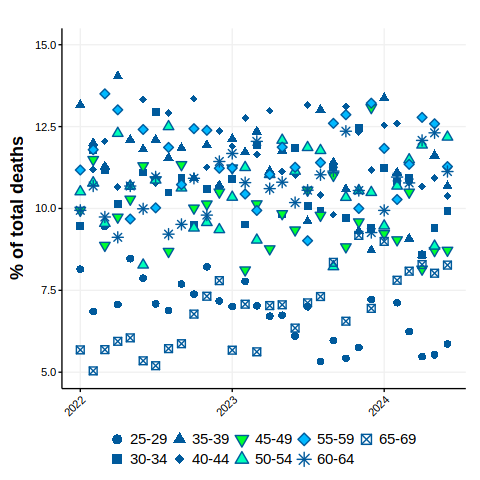

In [121]:
%%R -i drug_age_range_df -i drug_name

df <- drug_age_range_df

# Convert Month Code to Date
df$Date <- as.Date(paste0(df$`Month Code`, "/01"), format = "%Y/%m/%d")

# Define age ranges and their corresponding markers/colors
age_ranges <- c('15-19', '20-24', '25-29', '30-34', '35-39', '40-44', 
                '45-49', '50-54', '55-59', '60-64', '65-69')
markers <- c(16, 15, 17, 18, 25, 24, 23, 8, 7, 6, 5)  # Different shape numbers
fill_colors <- rainbow(length(age_ranges))

# Reshape data to long format for ggplot
df_long <- df %>%
  select(Date, all_of(age_ranges[age_ranges %in% names(df)])) %>%
  pivot_longer(cols = -Date, names_to = "Age_Range", values_to = "Value")

# Create mapping for shapes and colors
df_long$Shape <- markers[match(df_long$Age_Range, age_ranges)]
df_long$Fill_Color <- fill_colors[match(df_long$Age_Range, age_ranges)]

# Create the plot
p <- ggplot(df_long, aes(x = Date, y = Value, group = Age_Range)) +
  # geom_line(color = "#0077be", size = 1) +
  geom_point(aes(shape = Age_Range, fill = Age_Range), 
             color = "#005a9c", size = 3, stroke = 1) +
  scale_shape_manual(values = setNames(markers[1:length(unique(df_long$Age_Range))], 
                                      unique(df_long$Age_Range))) +
  scale_fill_manual(values = setNames(fill_colors[1:length(unique(df_long$Age_Range))], 
                                     unique(df_long$Age_Range))) +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  labs(x = NULL, y = "% of total deaths", title = NULL) + 
  # ylim(5,20) +
  ylim(5,15) +
  # ylim(0,15) +
  theme_minimal() +
  theme_Publication() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.y = element_text(size = 18),
        legend.title = element_blank(),
        legend.text = element_text(size = 15),
        panel.grid.minor = element_blank()) +
  guides(shape = guide_legend(override.aes = list(size = 4)),
         fill = guide_legend(override.aes = list(size = 4)))

ggsave(paste0("./v2_figures/trend_age_", drug_name, ".svg"), plot = p, width = 6, height = 4, dpi = 300)
p

## cdc trend - all ages

/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


[1] "syn_opioid_norm"
[1] "nat_opioid_norm"
[1] "heroin_norm"
[1] "methadone_norm"
[1] "cocaine_norm"
[1] "cannabis_norm"


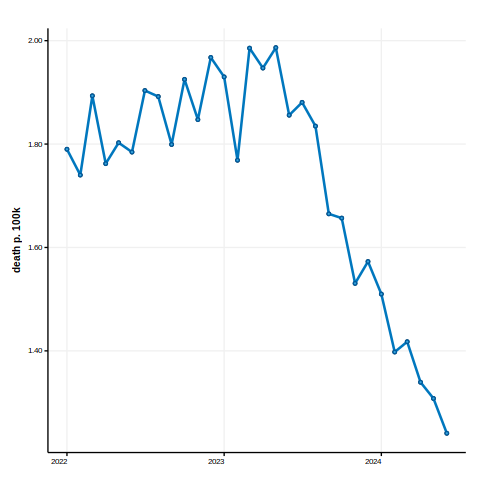

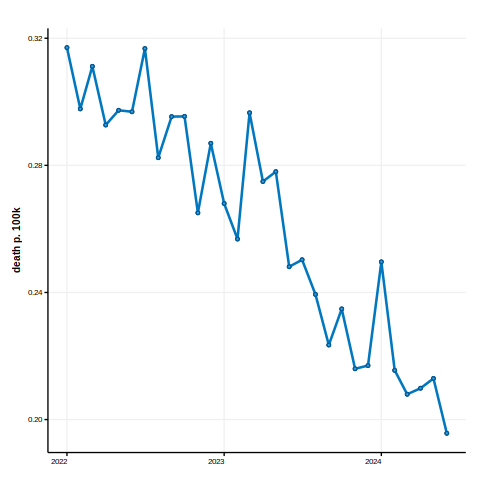

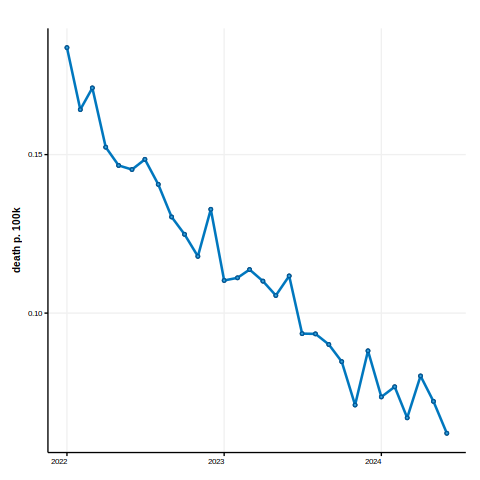

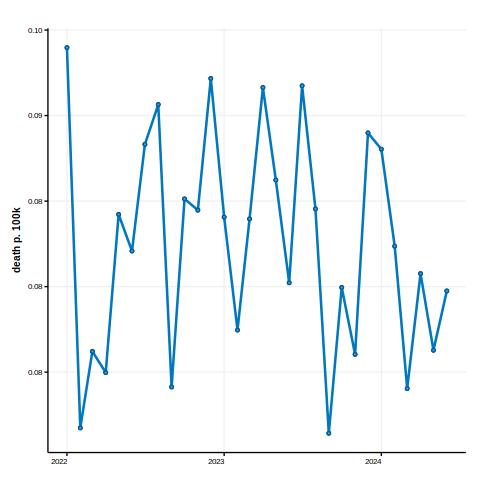

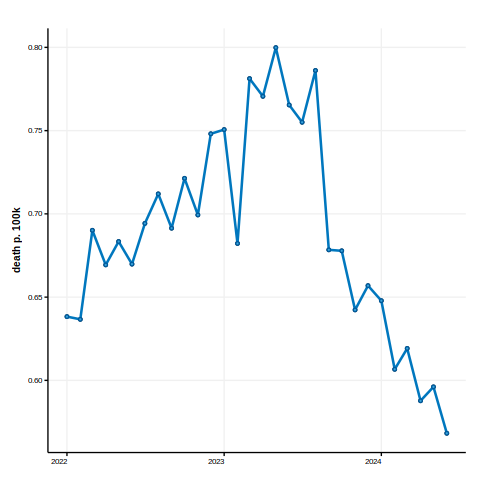

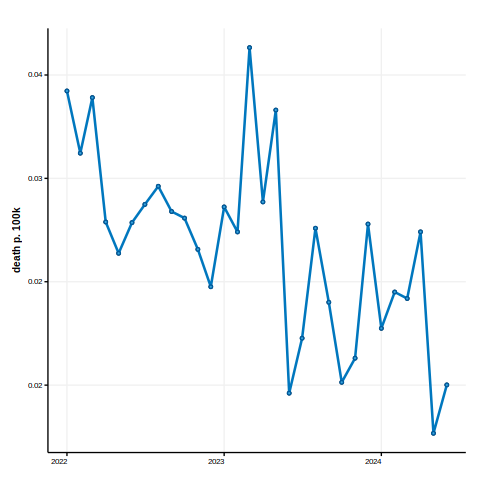

In [258]:
%%R -i death_tpc7_df


death_tpc7_df$date <- as.Date(paste(death_tpc7_df$year, death_tpc7_df$month, "01", sep="-"))
death_tpc7_df$month_year <- format(death_tpc7_df$date, "%b %Y")
death_tpc7_df$month_year <- factor(death_tpc7_df$month_year, 
                                 levels = unique(death_tpc7_df$month_year[order(death_tpc7_df$date)]))


# print(head(death_tpc7_df))
columns_to_plot <- c("syn_opioid_norm", "nat_opioid_norm", "heroin_norm", "methadone_norm", "cocaine_norm", "cannabis_norm")

# Loop through each column
for (col in columns_to_plot) {

    death_tpc7_df[[col]] <- death_tpc7_df[[col]]

    # Create the plot
    p <- qplot(x = date, y = .data[[col]], data = death_tpc7_df, group = 1, ylab = "death p. 100k") +
        theme_Publication() +
        scale_y_continuous(labels = scales::number_format(accuracy = 0.01)) +
        scale_x_date(date_breaks = "1 year", date_labels = "%Y", expand = c(0.05, 0.05)) +
        theme(
            axis.text.x = element_text(angle = 0, hjust = 1, size = 8),
            axis.text.y = element_text(size = 8),
            axis.title.x = element_text(size = 10),
            axis.title.y = element_text(size = 10)
        ) +

        # theme(axis.text.x = element_text(angle = 45, hjust = 1), 
        #     plot.margin = margin(t = 10, r = 25, b = 40, l = 10, unit = "pt")) +
        xlab(NULL) +
        geom_line(color = "#0077be", size = 1.2) +  # Strong blue line 
        geom_point(color = "#005a9c", fill = "#39a5dc", shape = 21, size = 1, stroke = 1) # Blue outline with lighter blue fill

    ggsave(paste0("./v2_figures/cdc_", col, ".svg"), plot = p, width = 3.5, height = 1.5, dpi = 300)

    print(col)
    print(p)
    # break
}

## topic trend

[1] "0"


/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"
[1] "6"
[1] "7"
[1] "8"
[1] "9"
[1] "10"
[1] "11"
[1] "12"
[1] "13"
[1] "14"
[1] "15"
[1] "16"
[1] "17"
[1] "18"
[1] "19"
[1] "20"
[1] "21"
[1] "22"
[1] "23"
[1] "24"
[1] "25"
[1] "26"
[1] "27"
[1] "28"
[1] "29"
[1] "30"
[1] "31"
[1] "32"
[1] "33"
[1] "34"
[1] "35"
[1] "36"
[1] "37"
[1] "38"
[1] "39"
[1] "40"
[1] "41"
[1] "42"
[1] "43"
[1] "44"
[1] "45"
[1] "46"
[1] "47"
[1] "48"
[1] "49"
[1] "50"
[1] "51"
[1] "52"
[1] "53"
[1] "54"
[1] "55"
[1] "56"
[1] "57"
[1] "58"
[1] "59"
[1] "60"
[1] "61"
[1] "62"
[1] "63"
[1] "64"
[1] "65"
[1] "66"
[1] "67"
[1] "68"
[1] "69"
[1] "70"
[1] "71"
[1] "72"
[1] "73"
[1] "74"
[1] "75"
[1] "76"
[1] "77"
[1] "78"
[1] "79"
[1] "80"
[1] "81"
[1] "82"
[1] "83"
[1] "84"
[1] "85"
[1] "86"
[1] "87"
[1] "88"
[1] "89"
[1] "90"
[1] "91"
[1] "92"
[1] "93"
[1] "94"
[1] "95"
[1] "96"
[1] "97"
[1] "98"
[1] "99"
[1] "100"
[1] "101"
[1] "102"
[1] "103"
[1] "104"
[1] "105"
[1] "106"
[1] "107"
[1] "108"
[1] "109"
[1] "110"
[1] "111

R[write to console]: Error in `[[<-.data.frame`(`*tmp*`, col, value = numeric(0)) : 
  replacement has 0 rows, data has 30

R[write to console]: In addition: 
R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 




Error in `[[<-.data.frame`(`*tmp*`, col, value = numeric(0)) : 
  replacement has 0 rows, data has 30


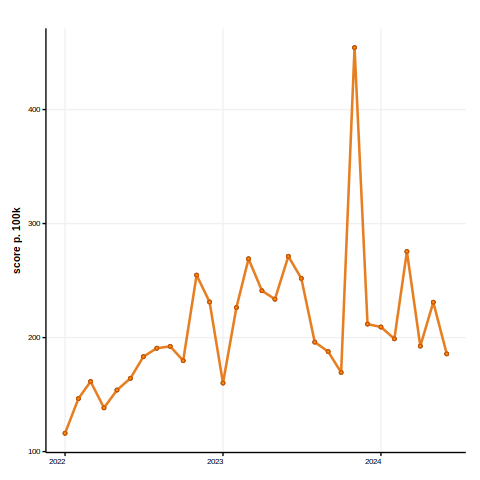

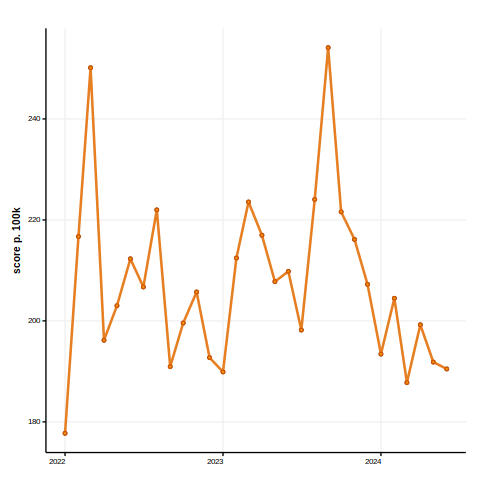

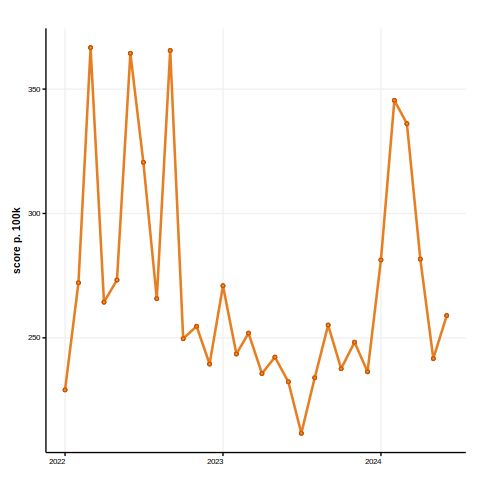

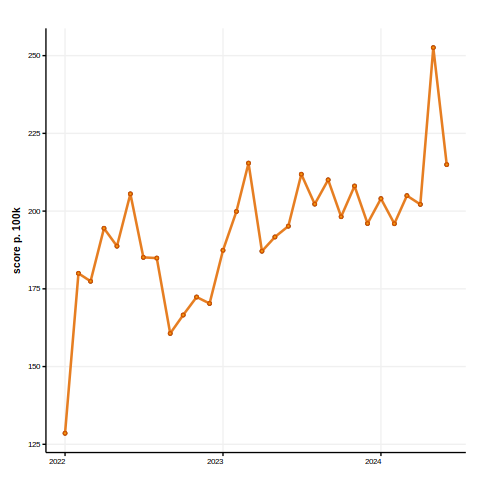

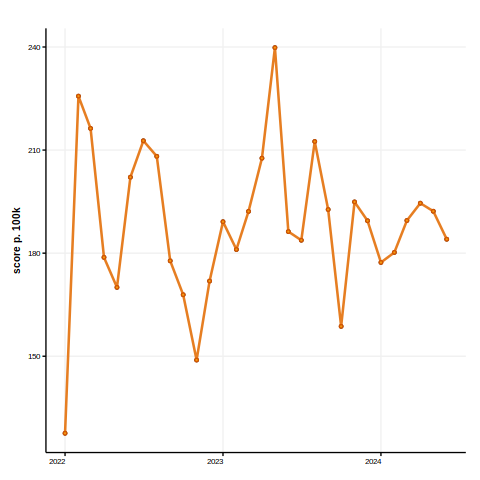

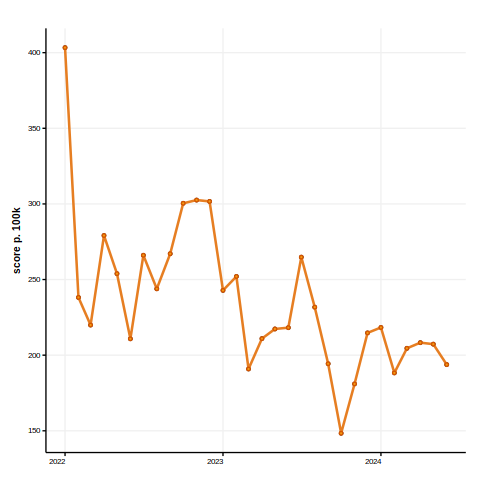

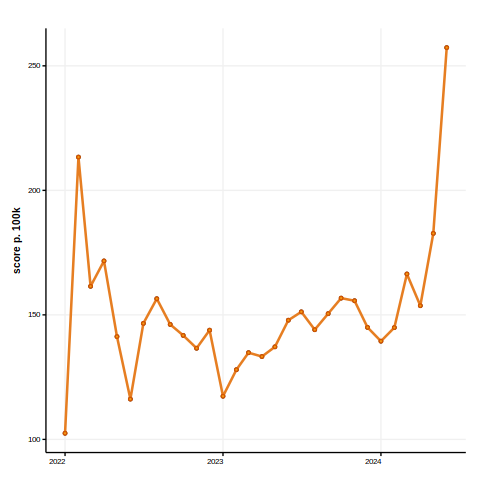

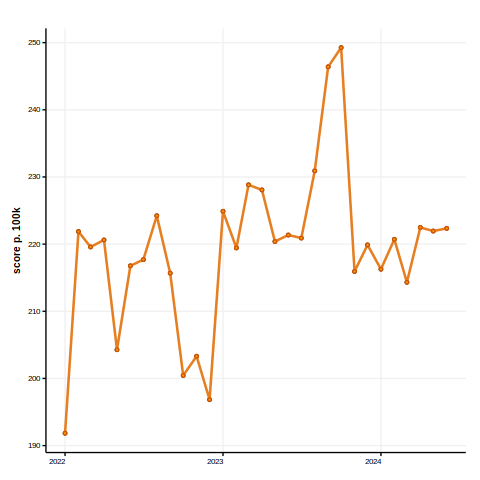

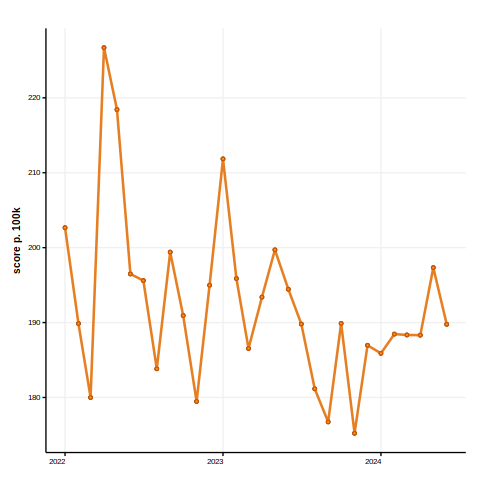

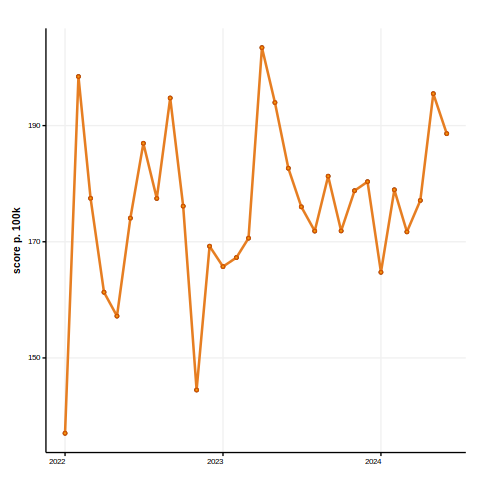

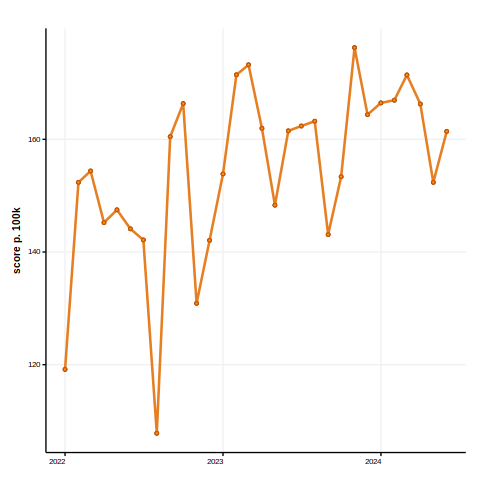

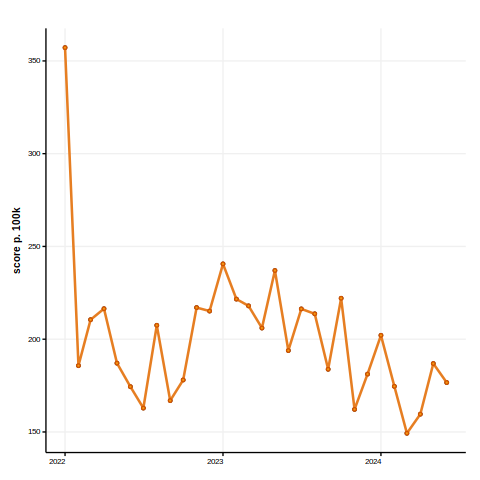

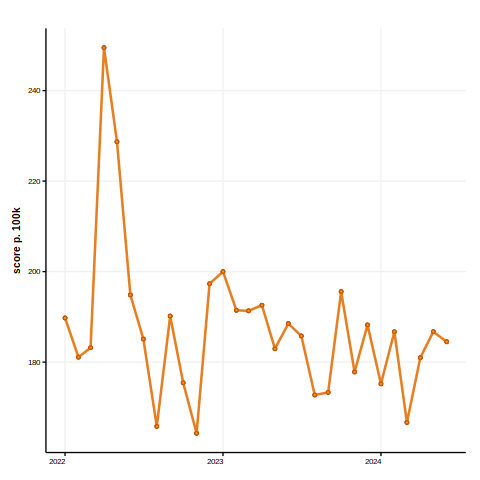

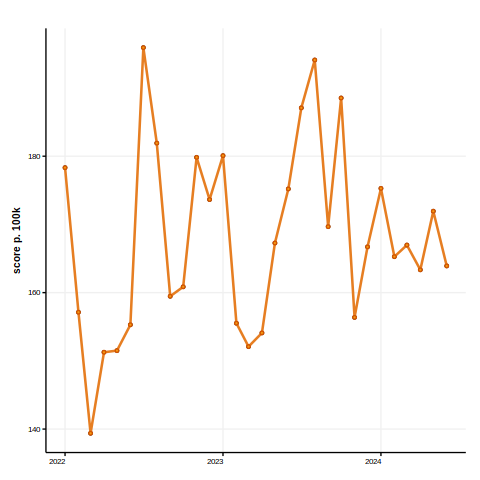

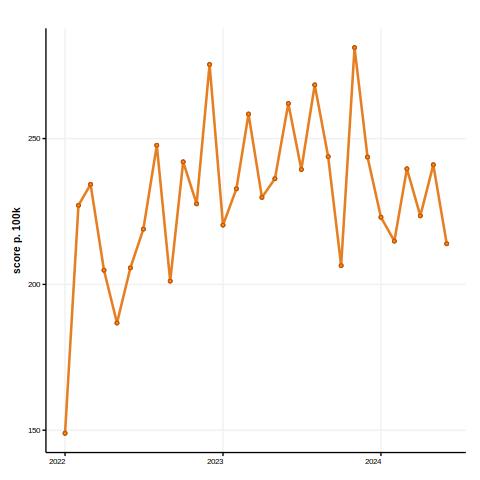

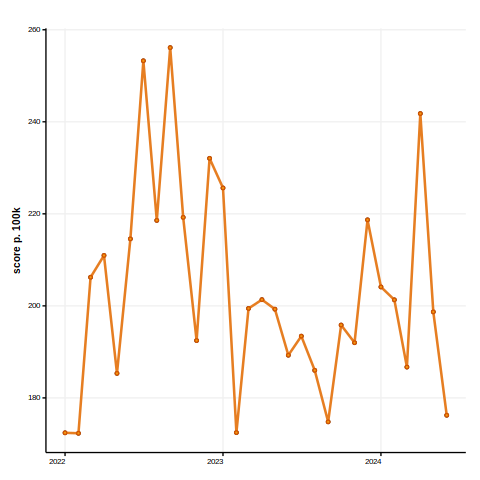

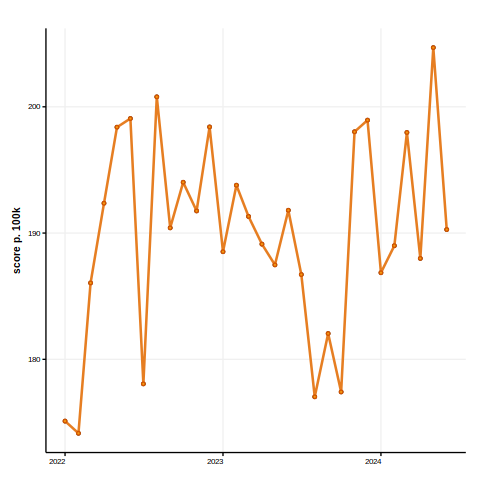

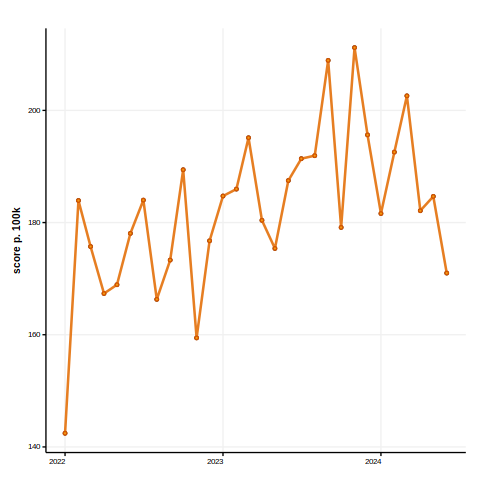

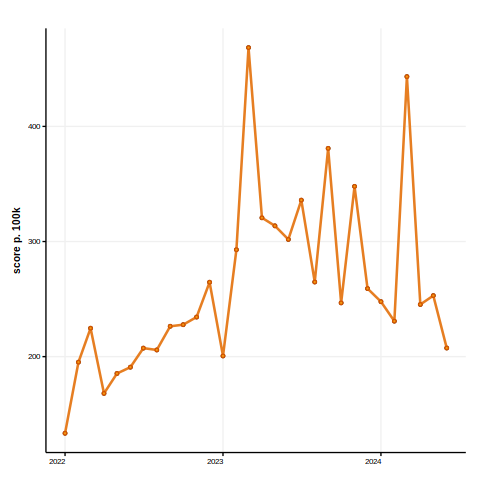

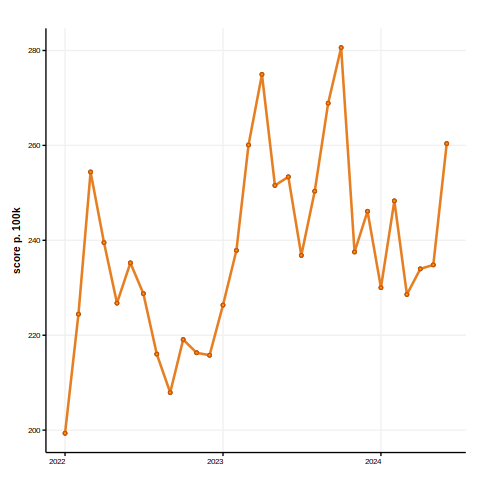

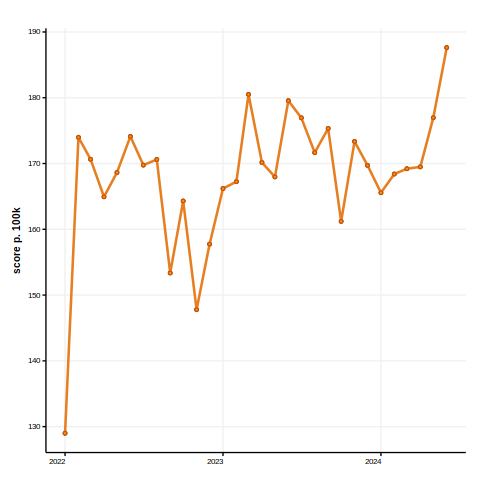

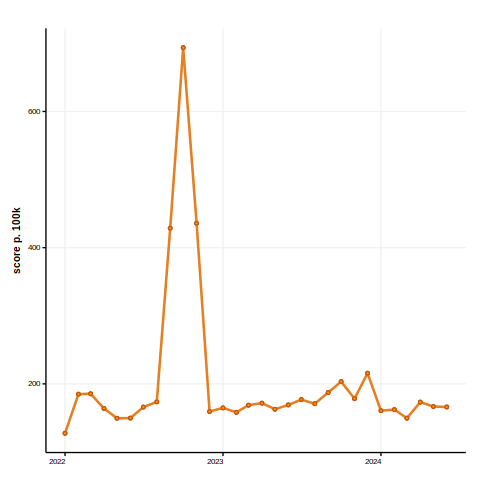

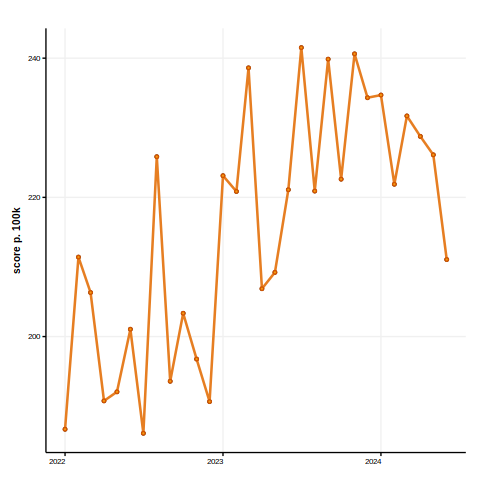

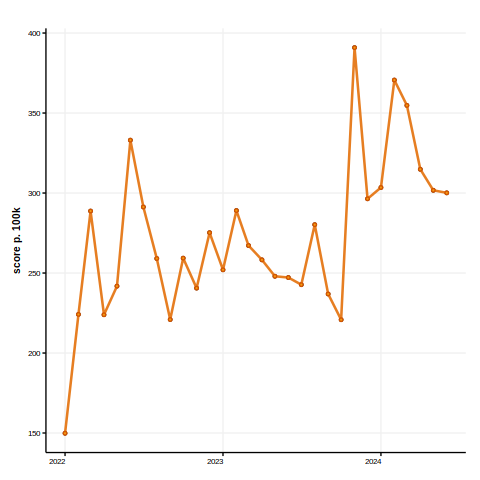

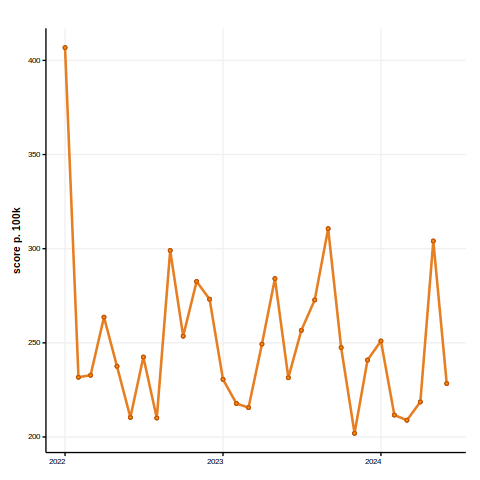

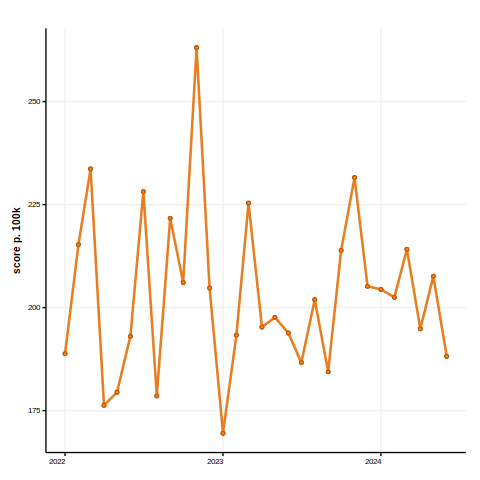

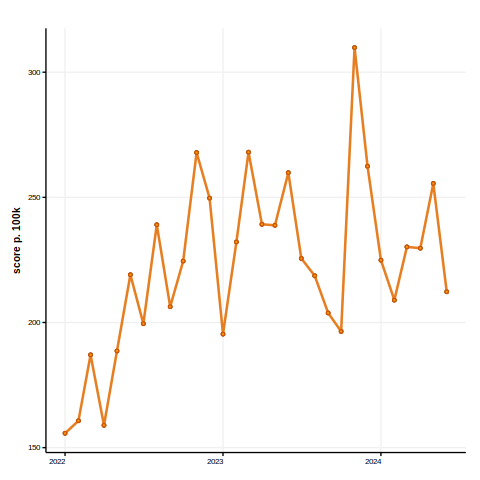

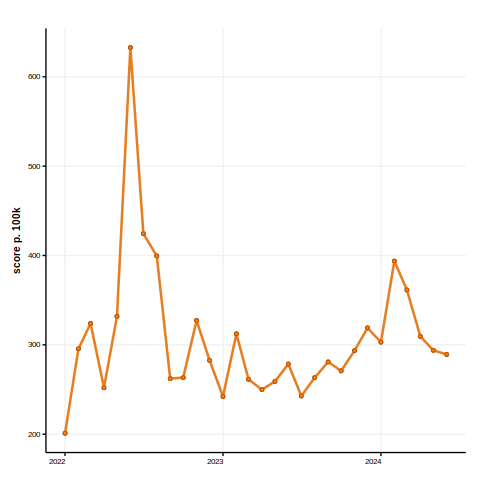

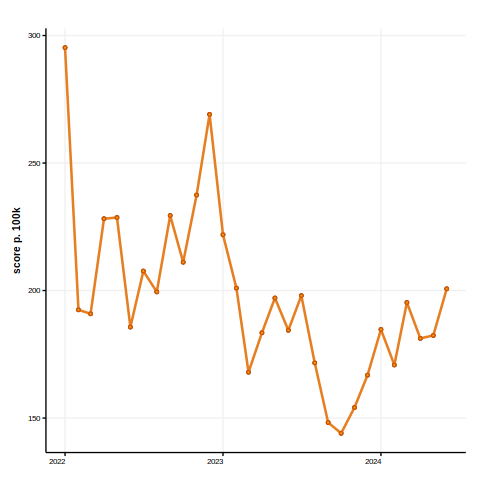

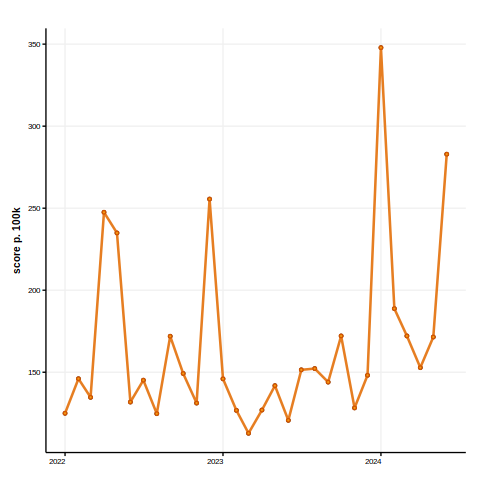

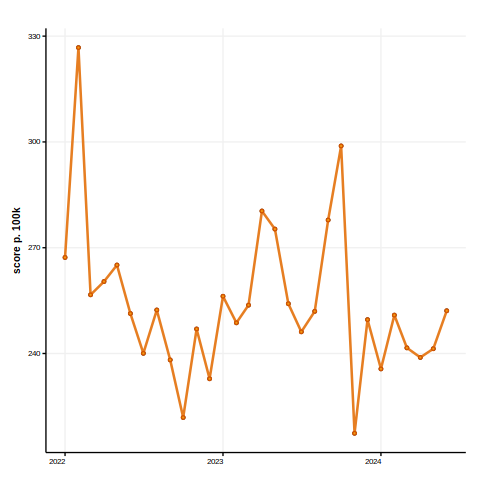

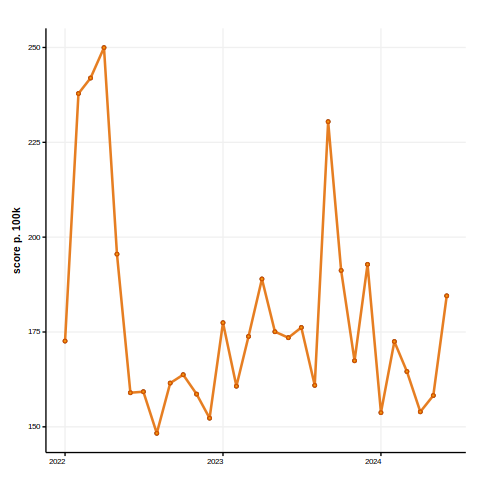

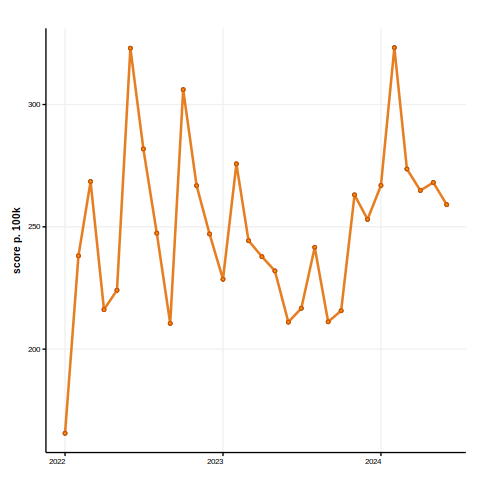

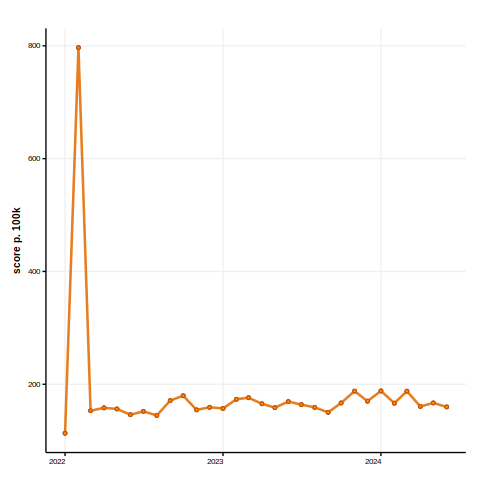

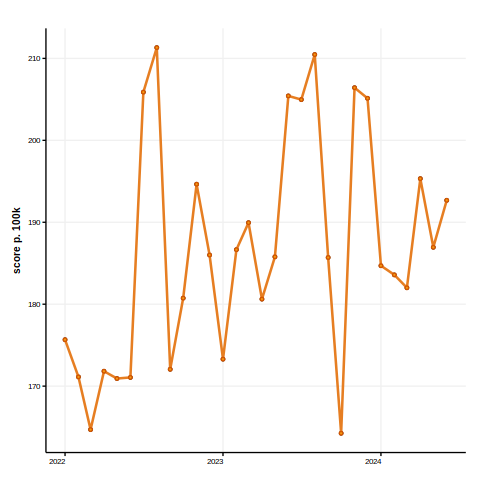

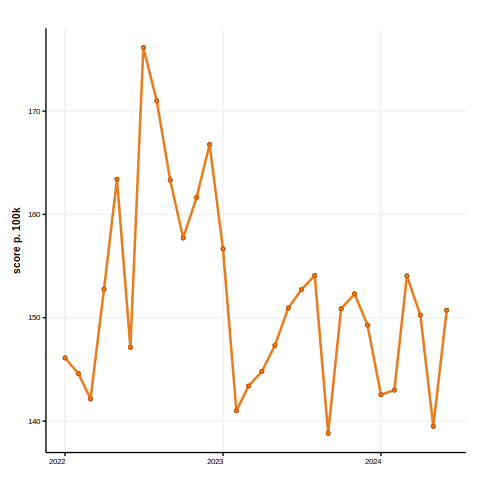

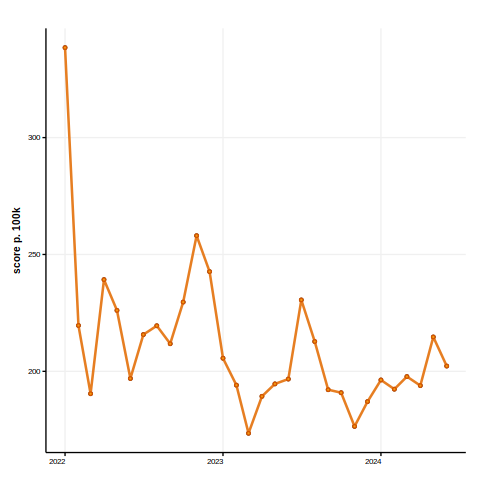

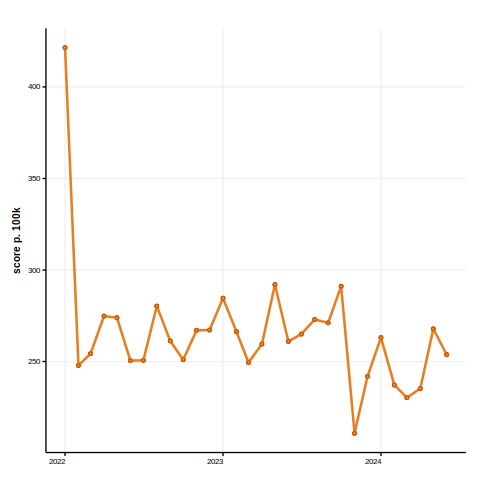

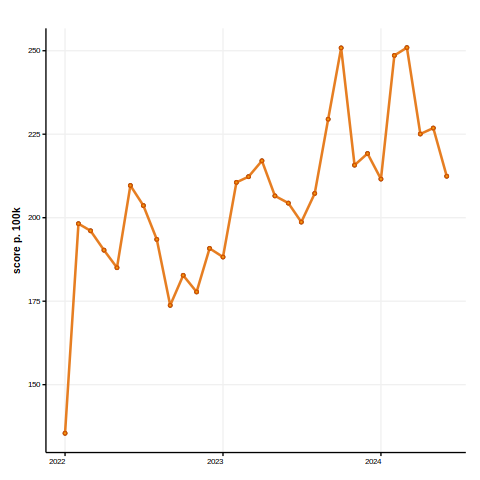

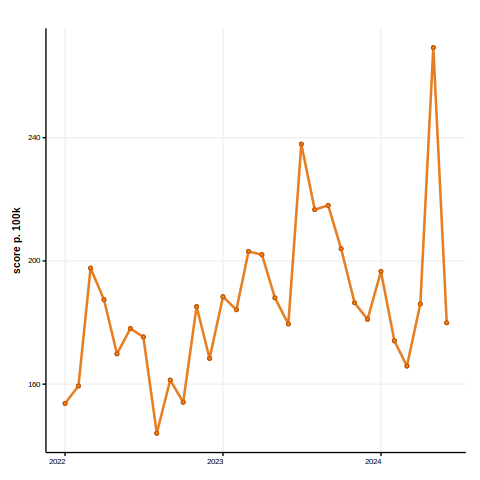

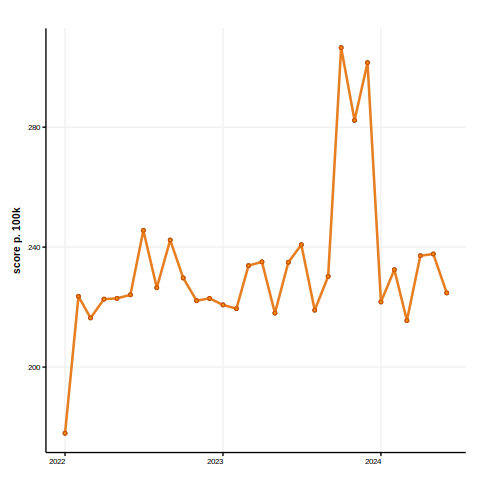

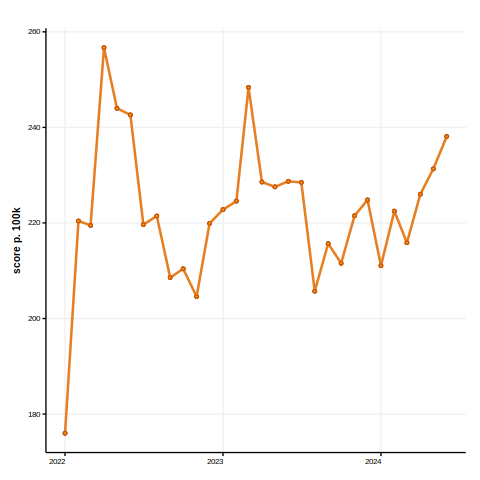

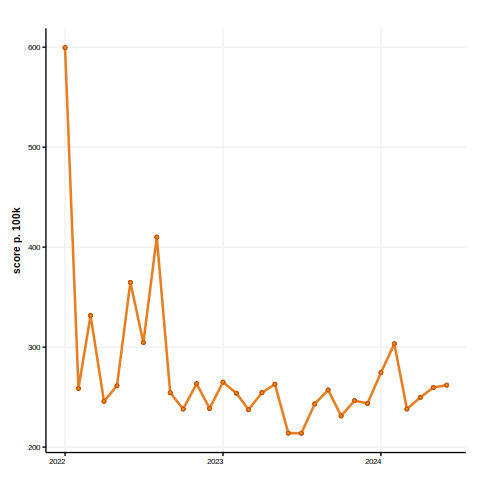

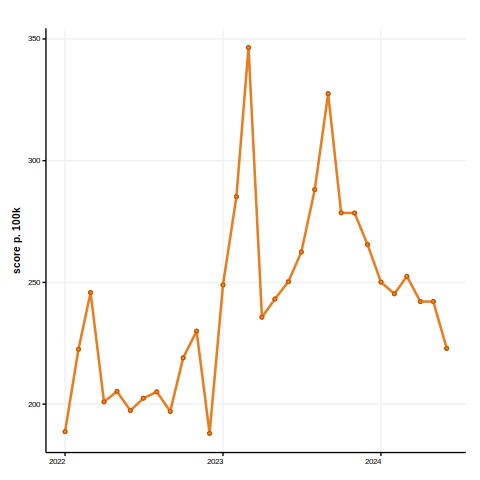

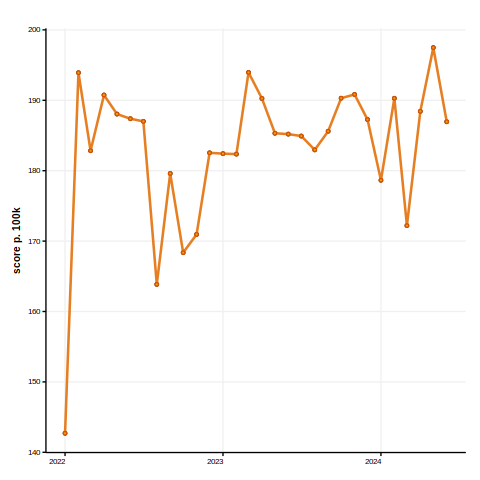

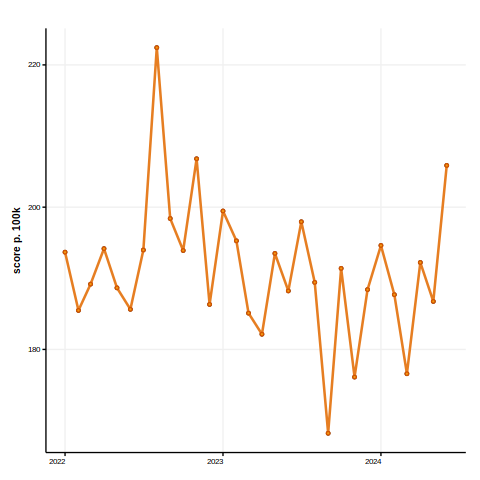

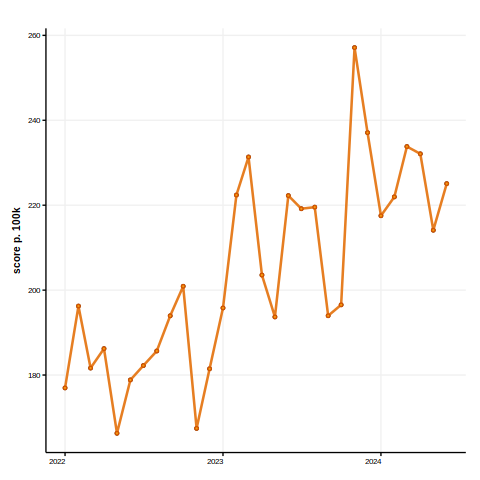

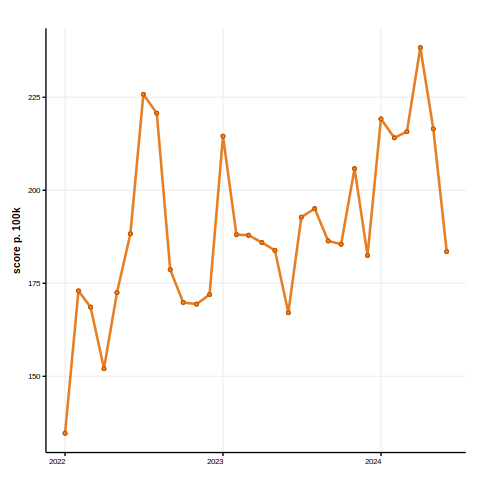

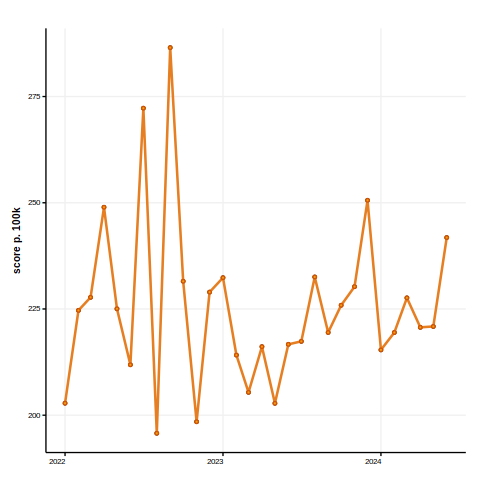

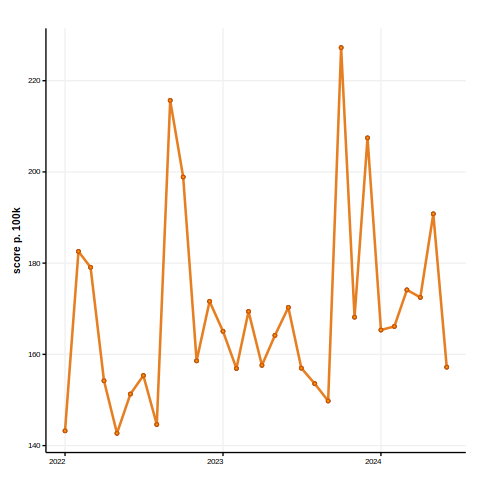

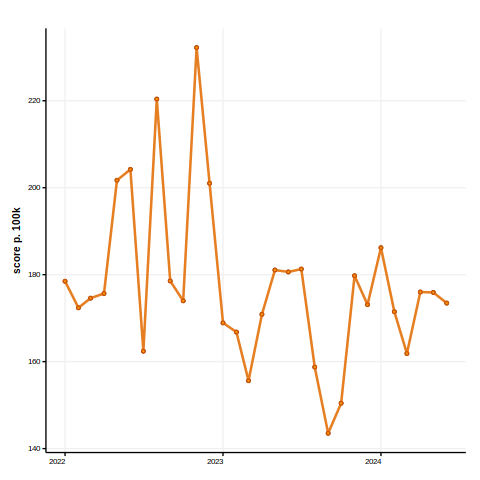

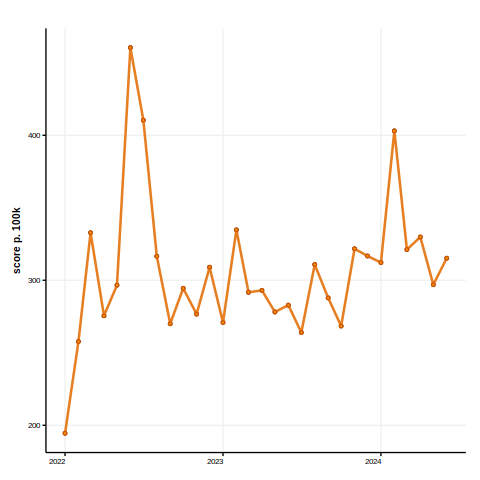

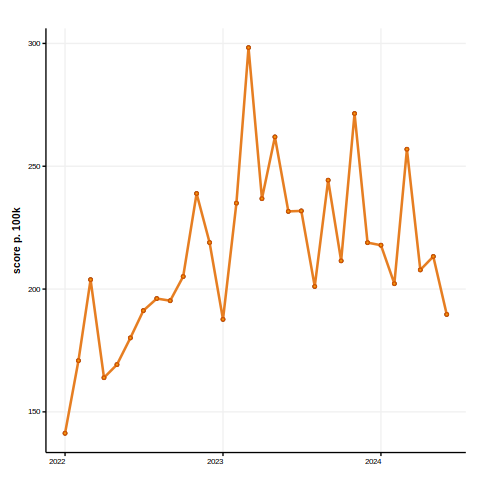

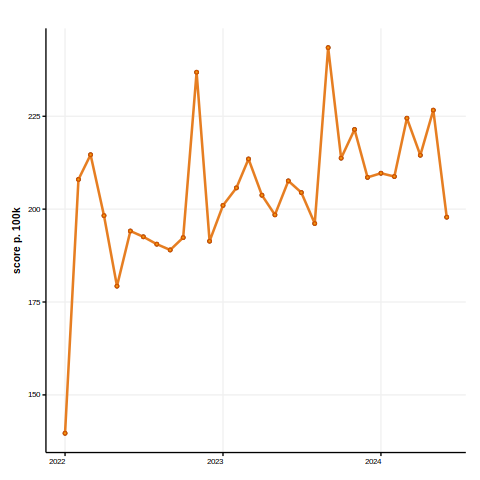

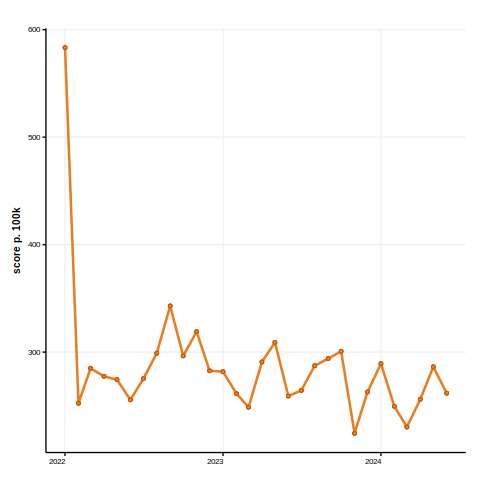

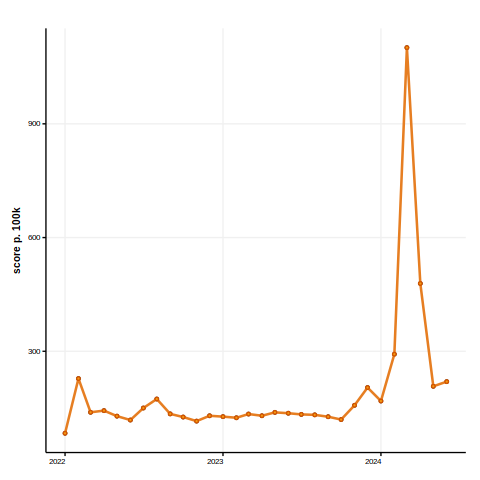

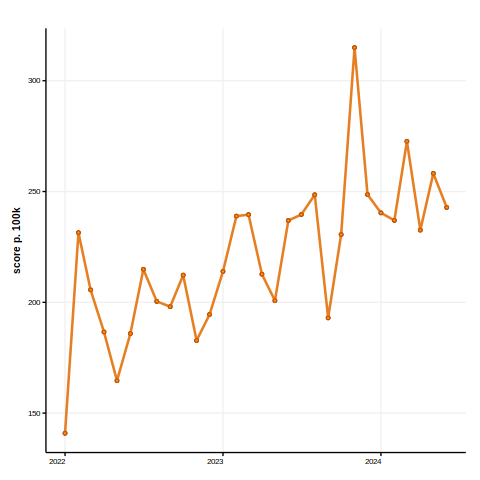

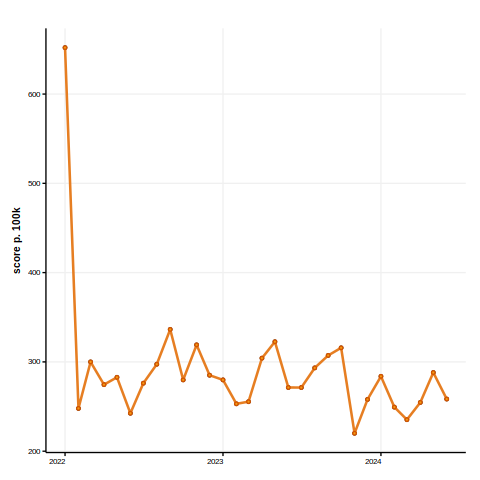

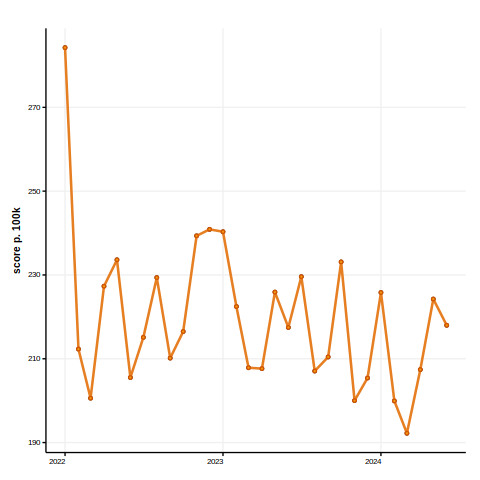

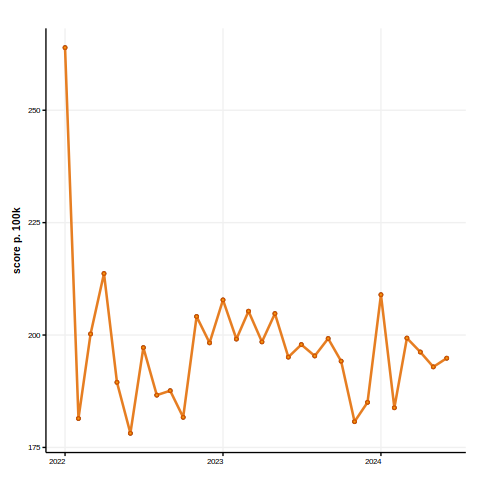

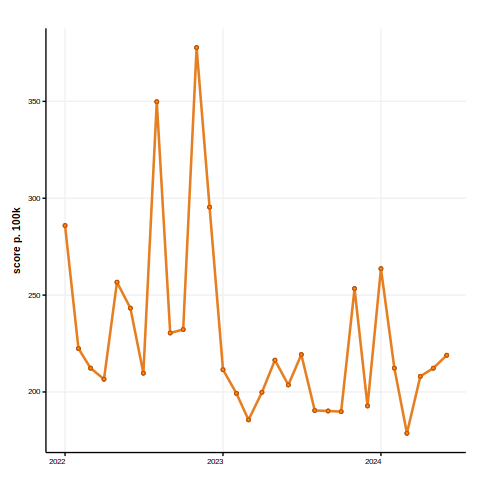

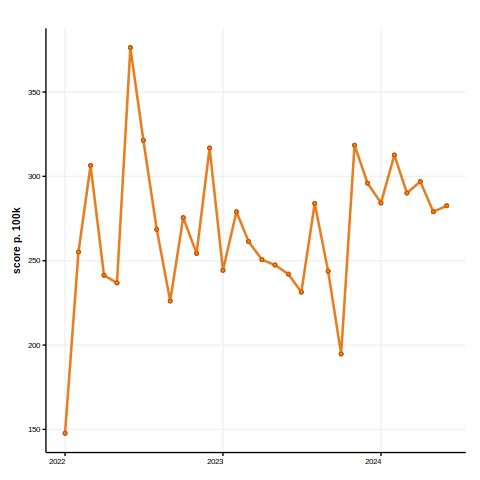

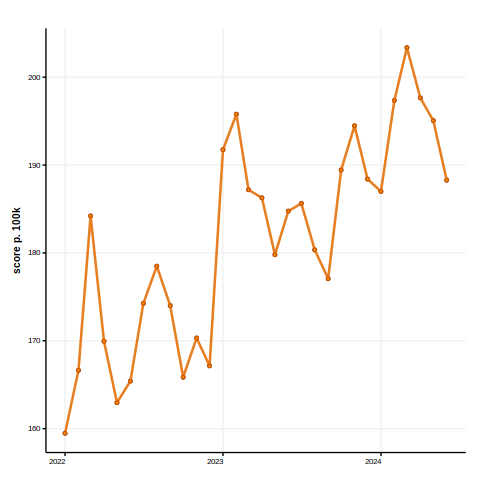

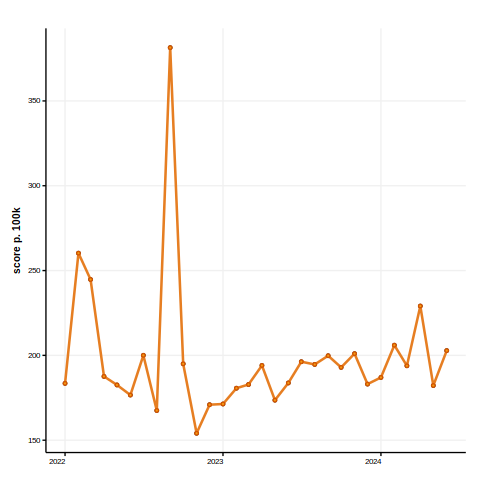

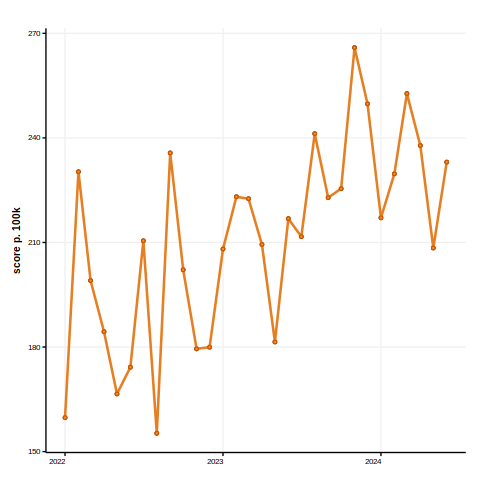

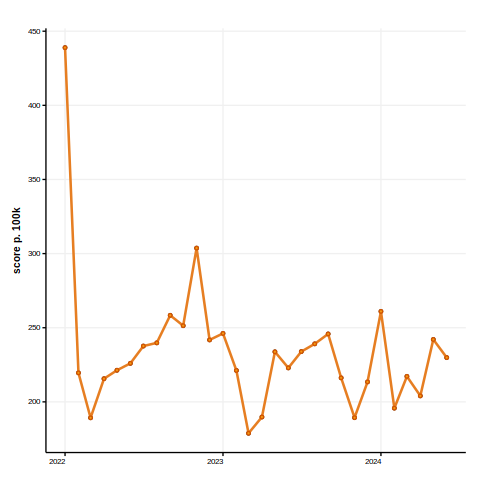

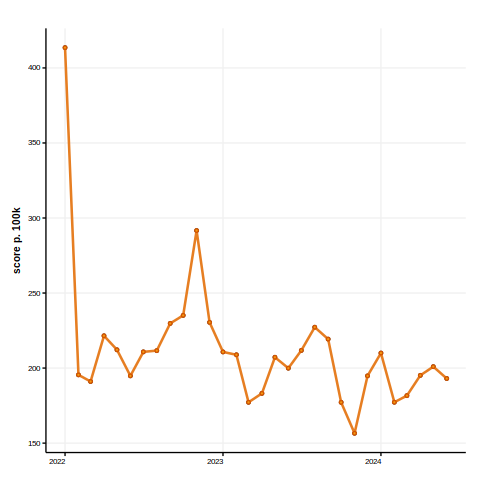

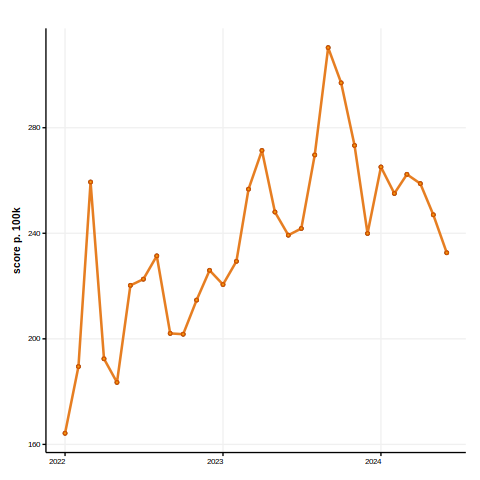

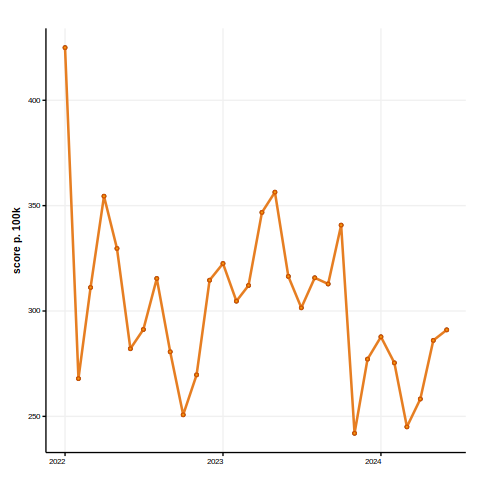

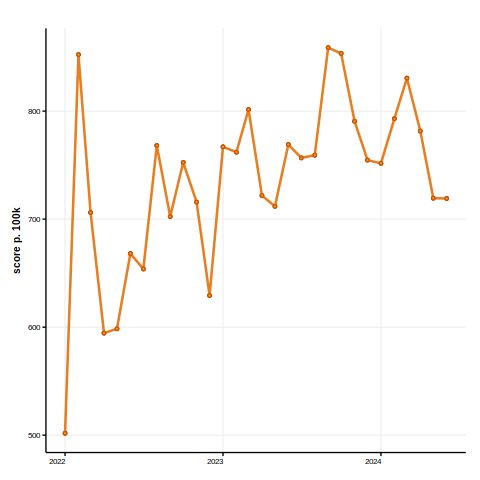

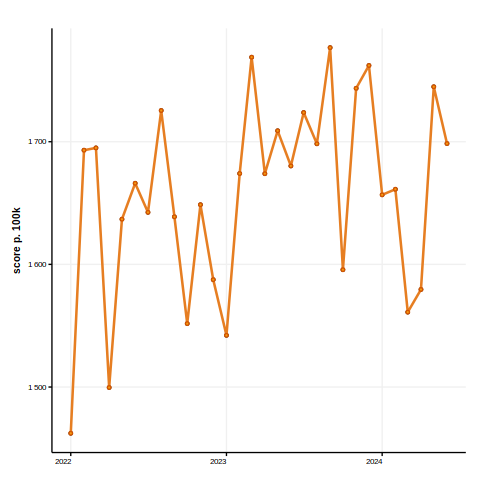

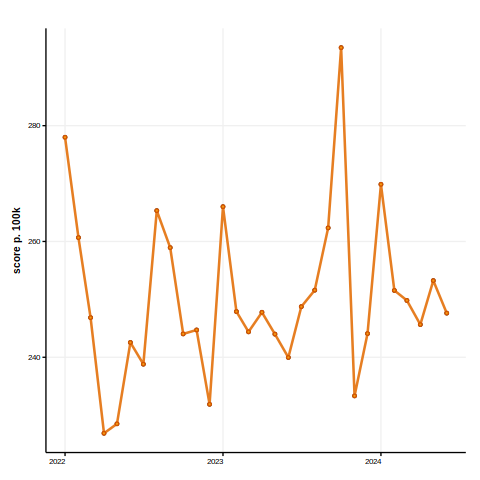

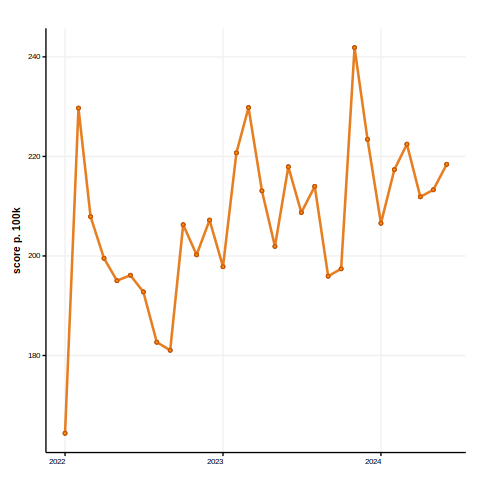

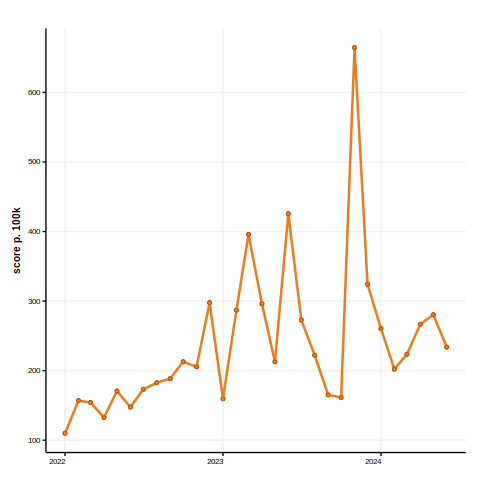

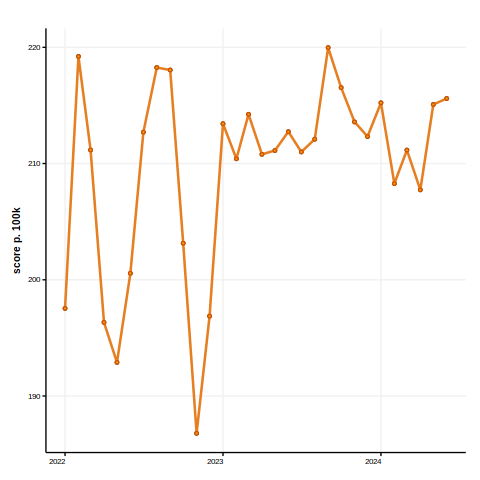

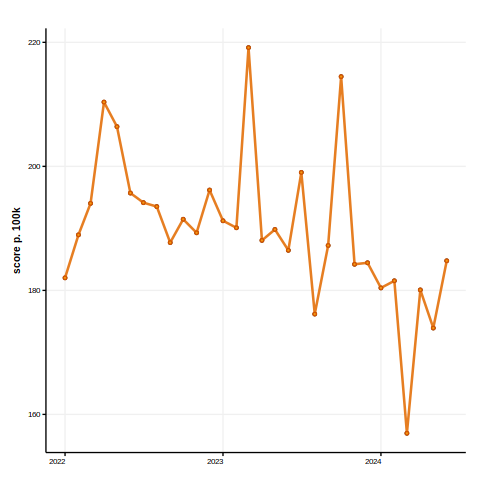

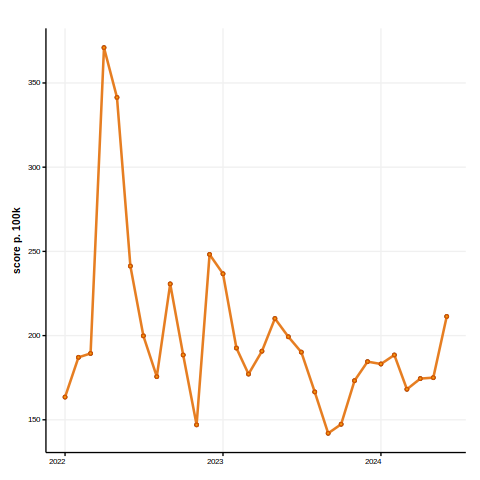

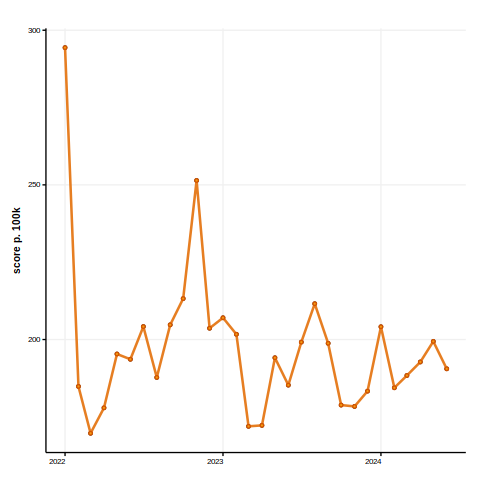

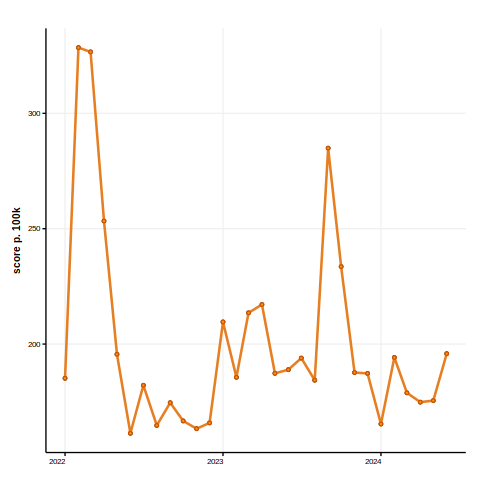

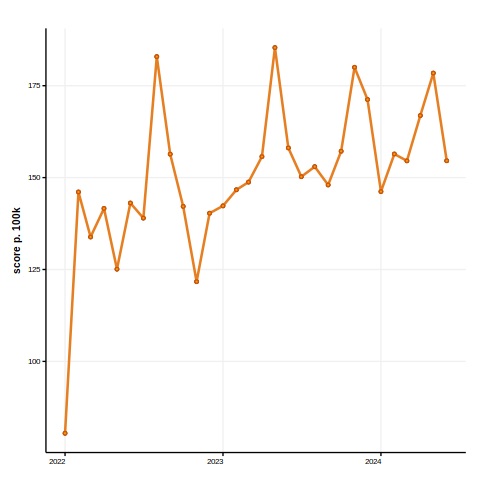

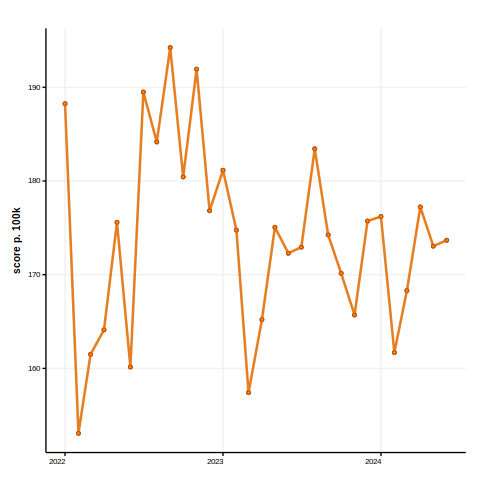

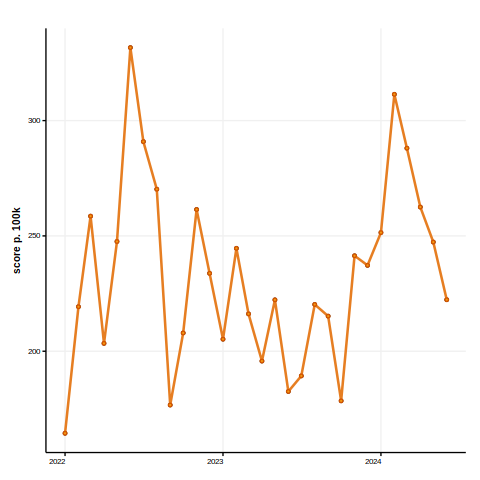

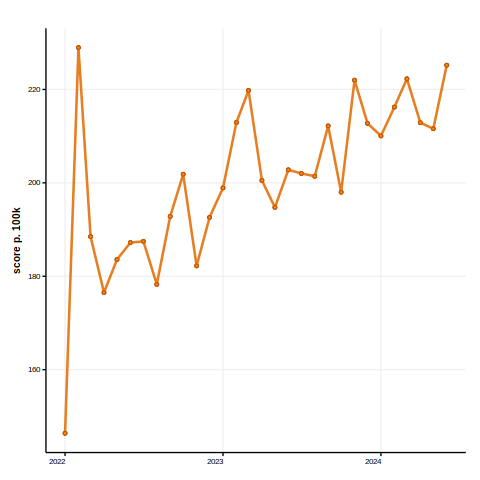

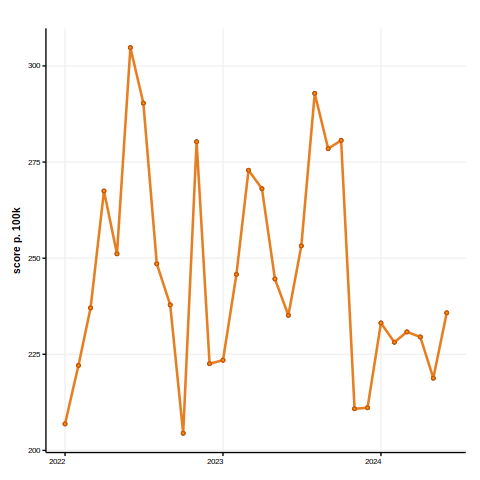

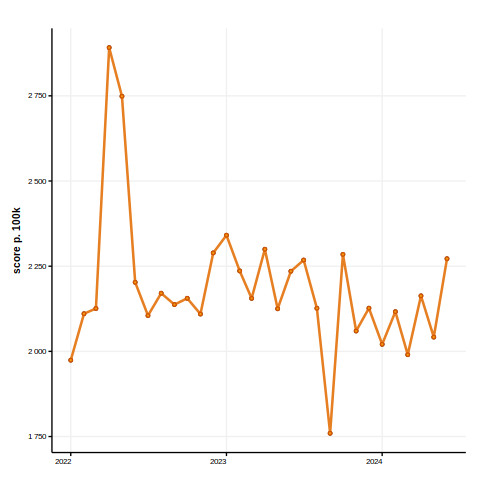

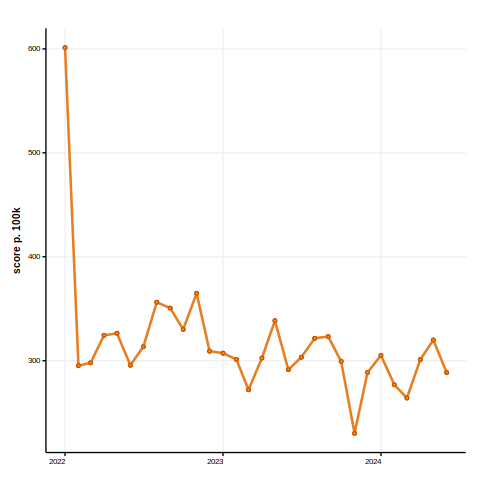

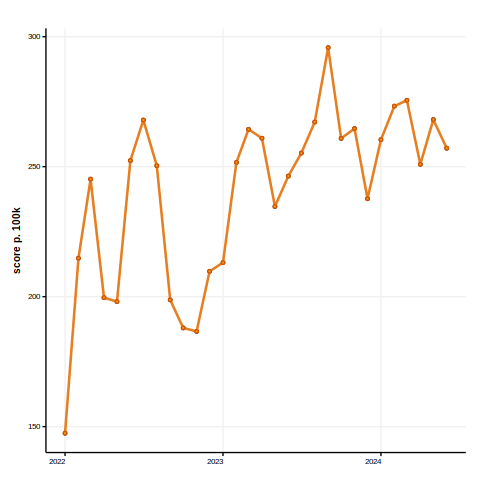

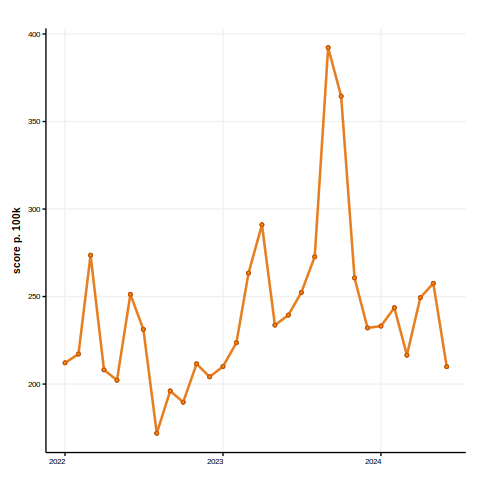

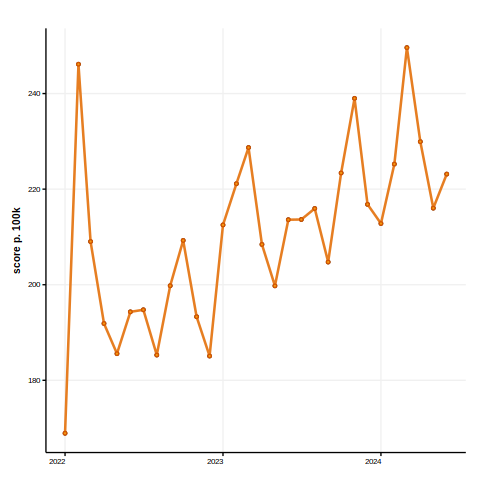

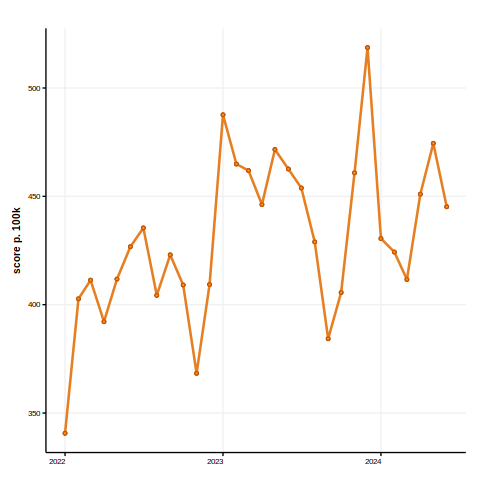

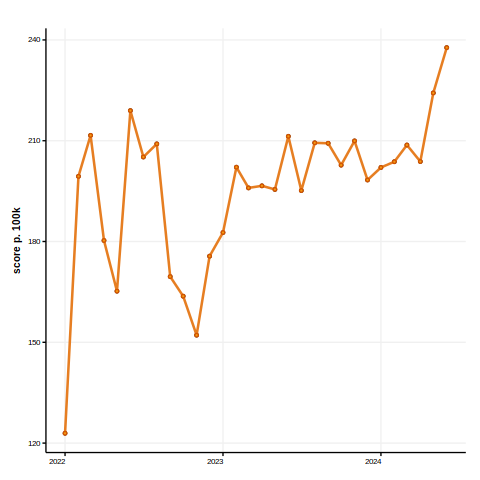

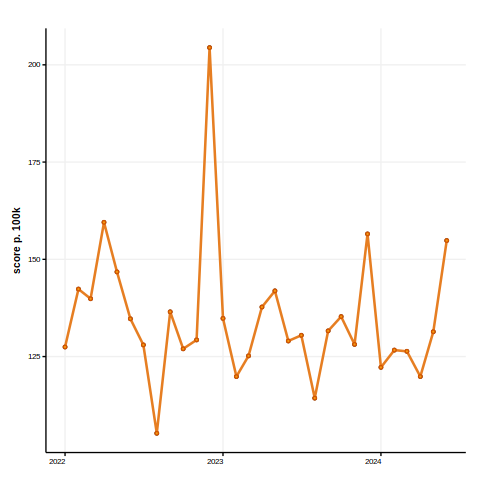

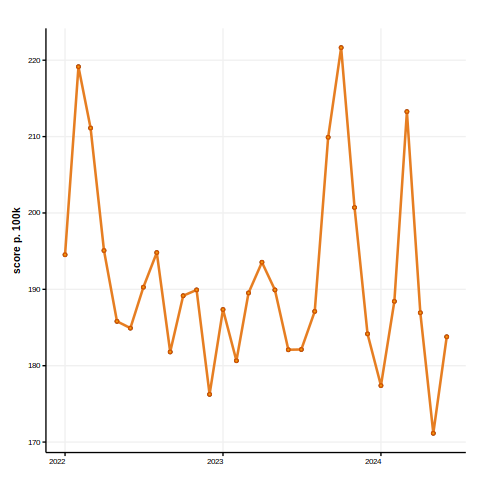

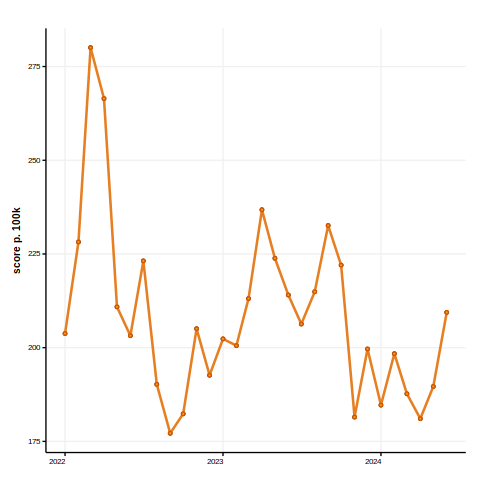

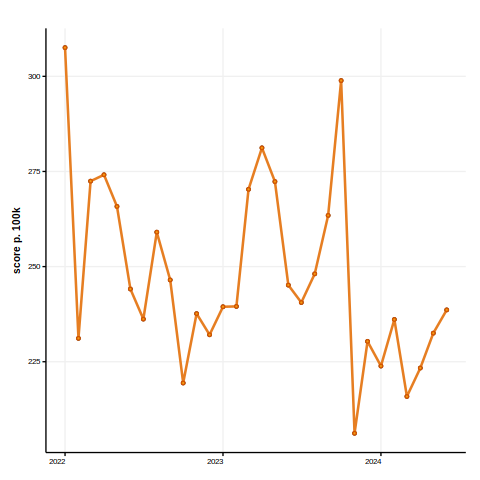

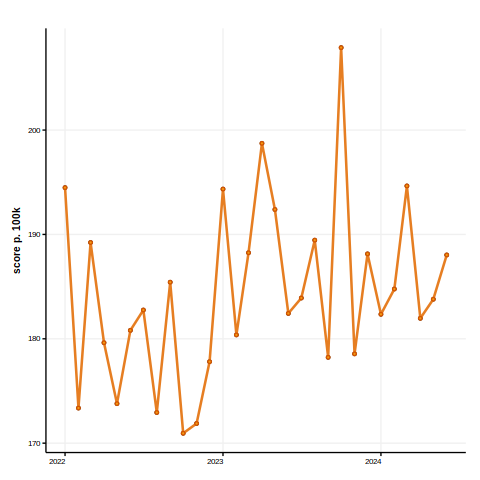

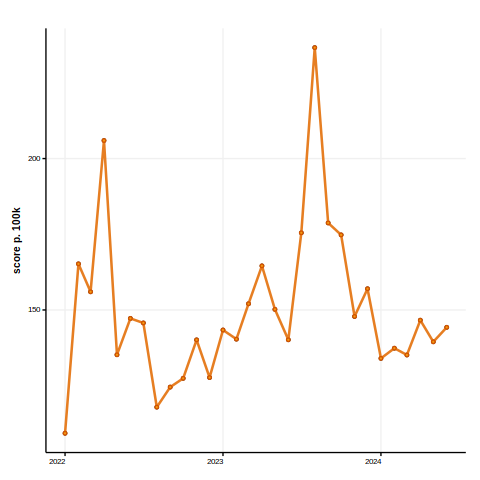

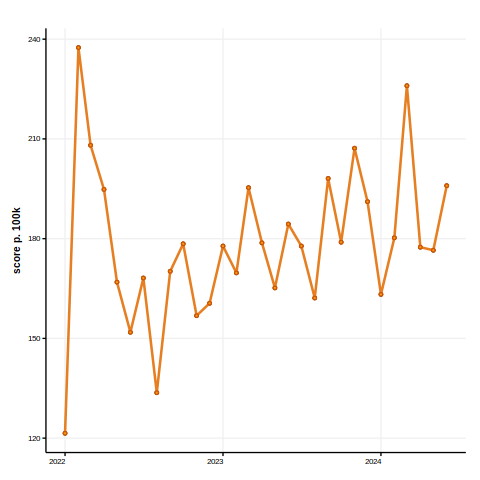

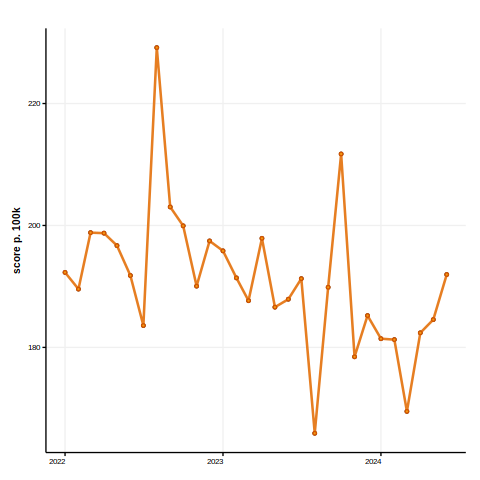

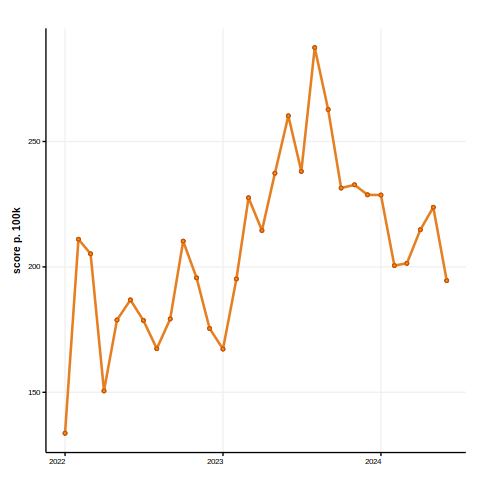

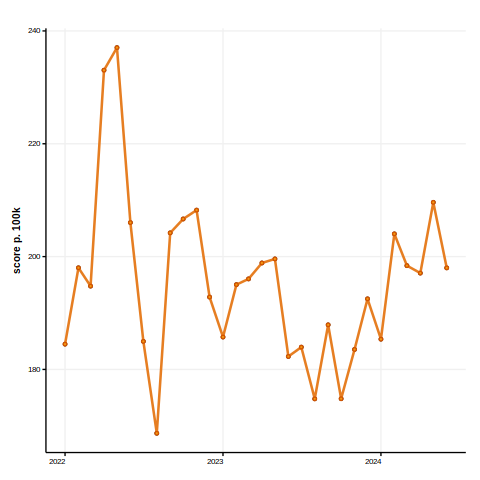

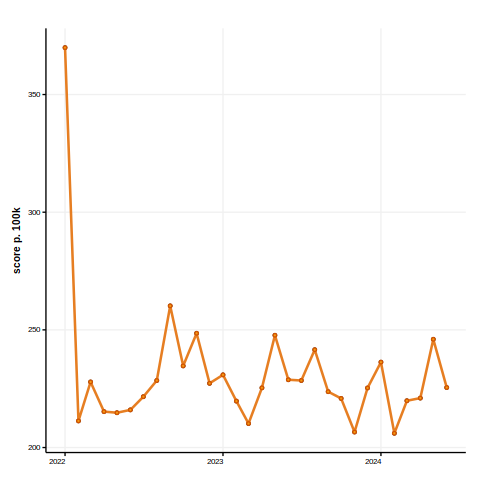

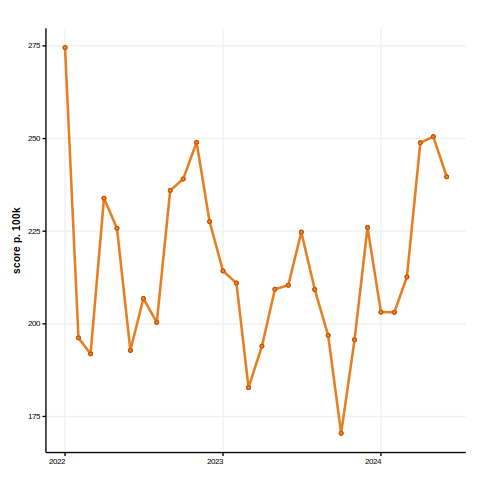

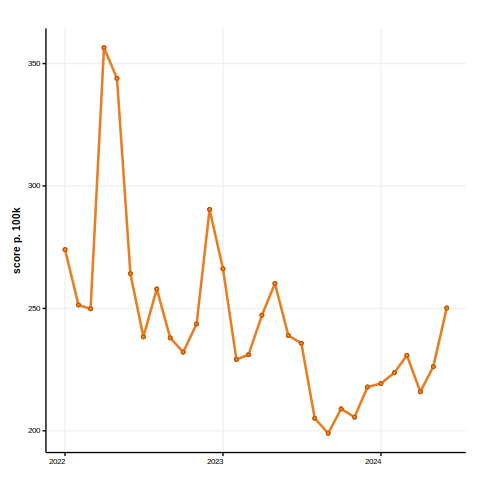

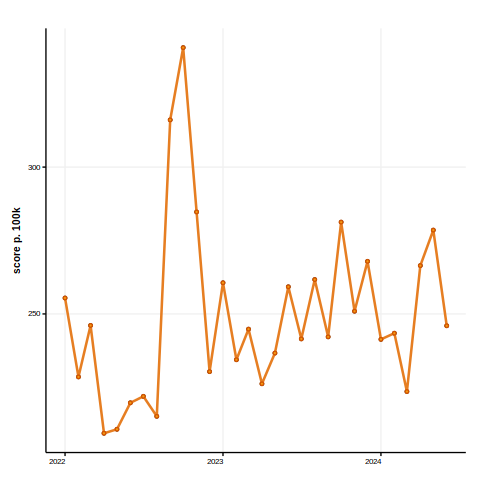

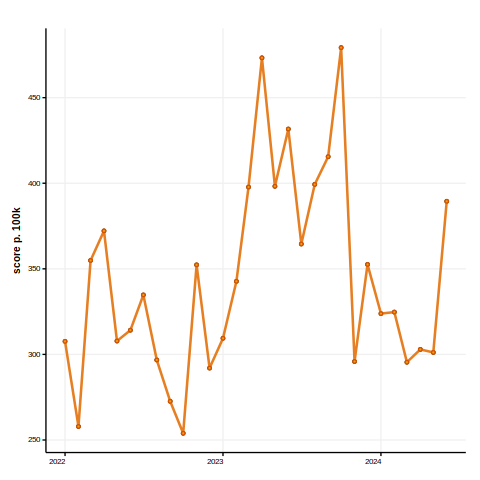

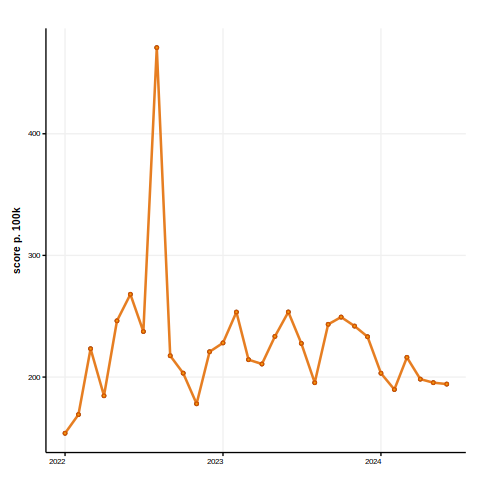

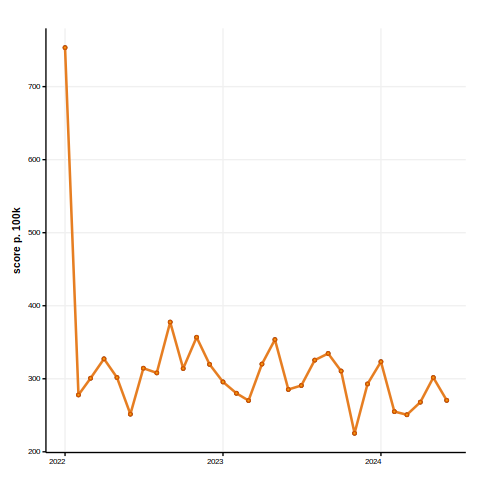

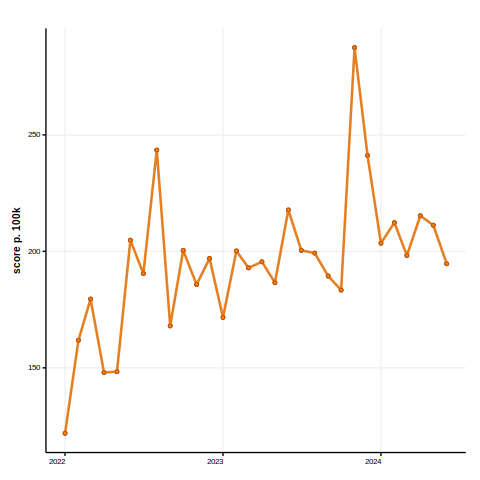

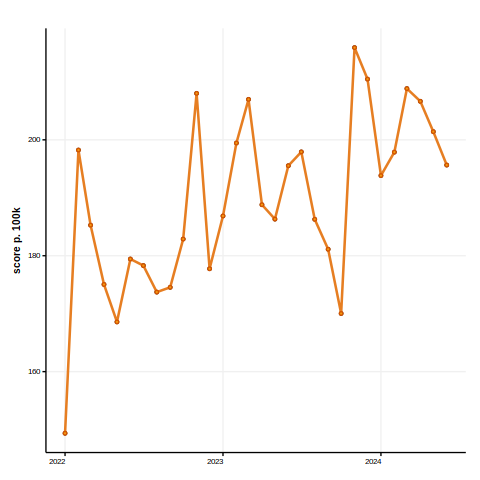

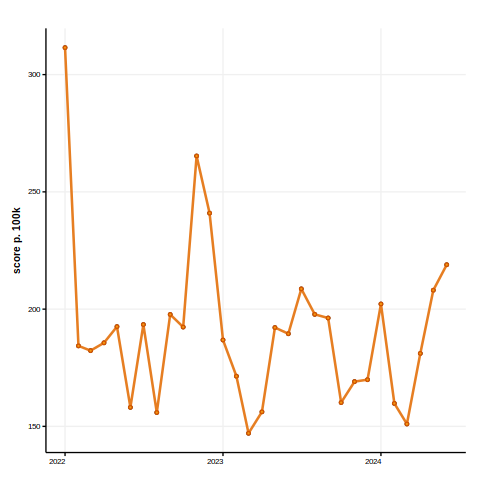

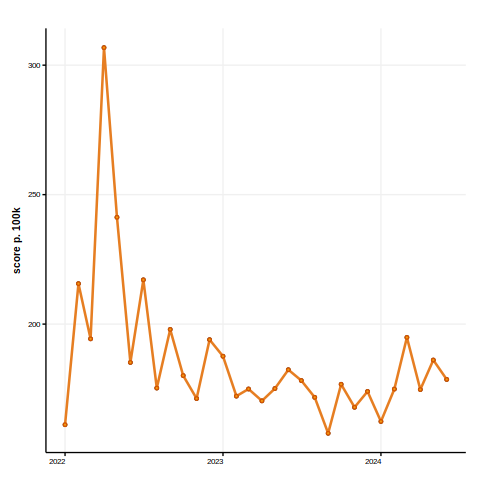

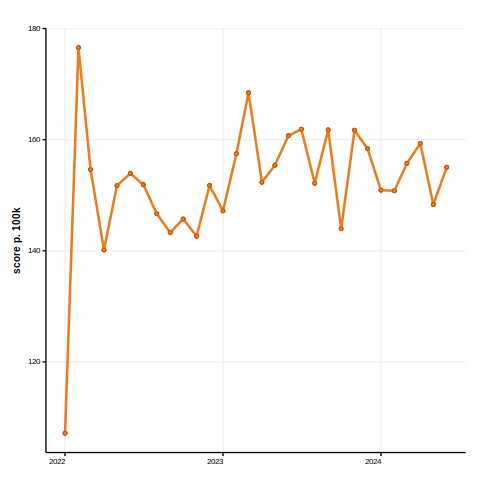

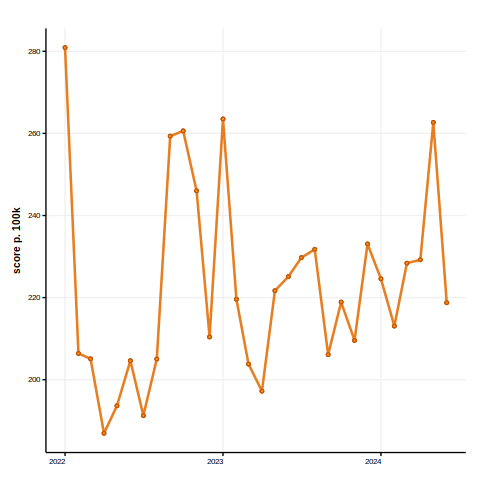

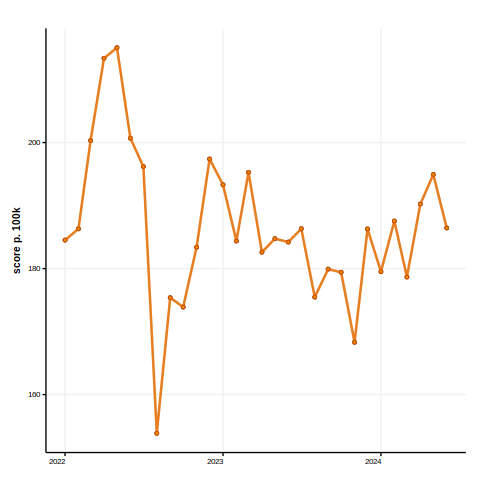

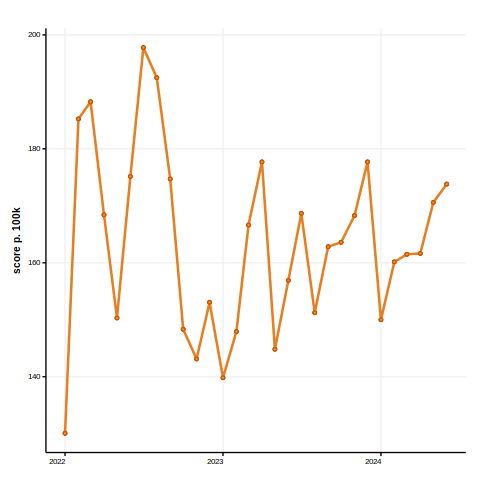

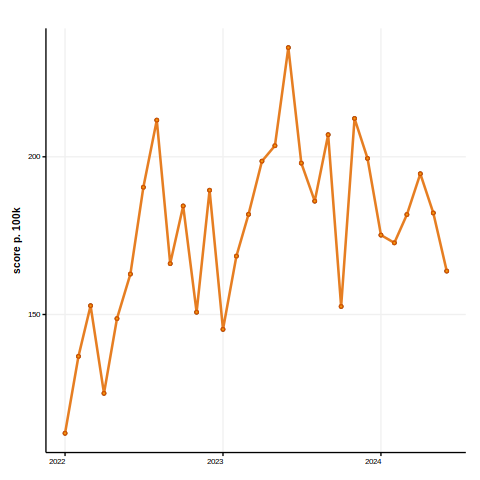

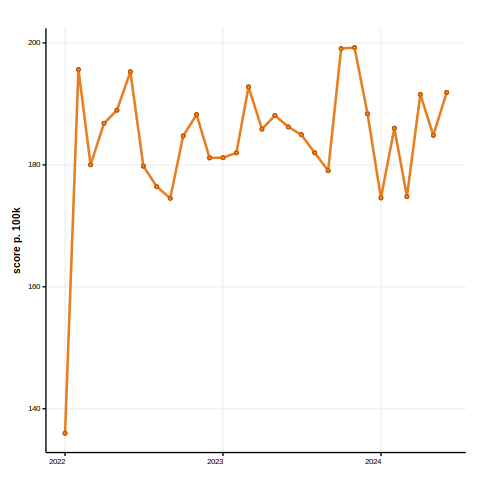

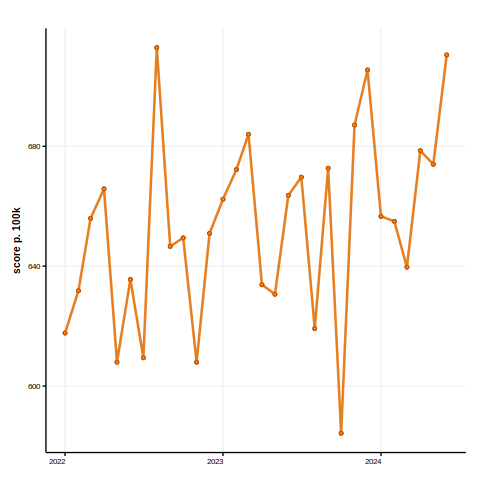

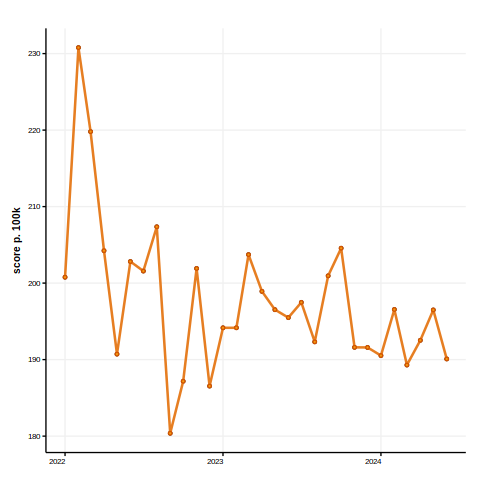

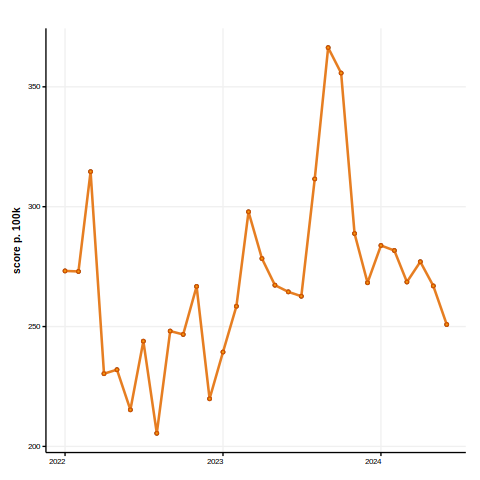

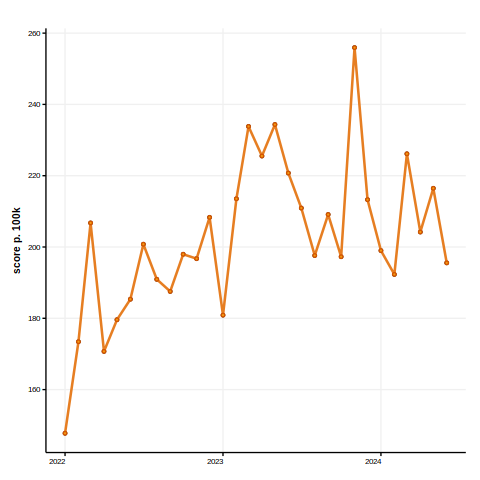

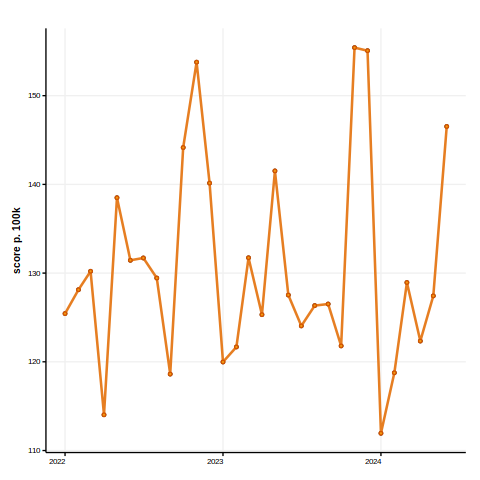

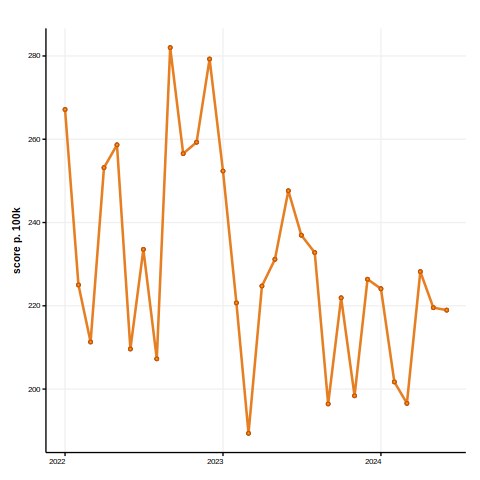

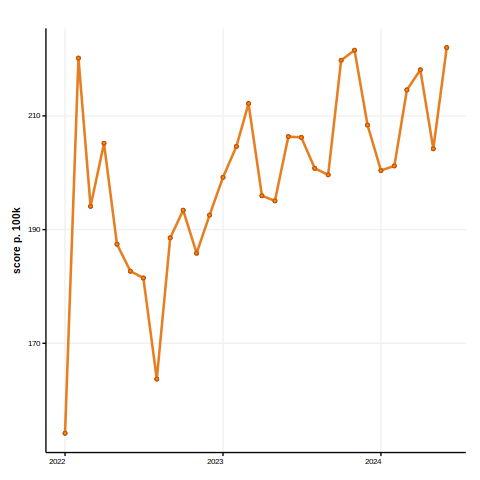

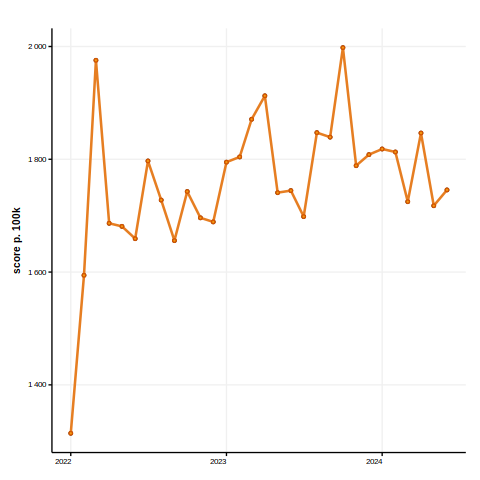

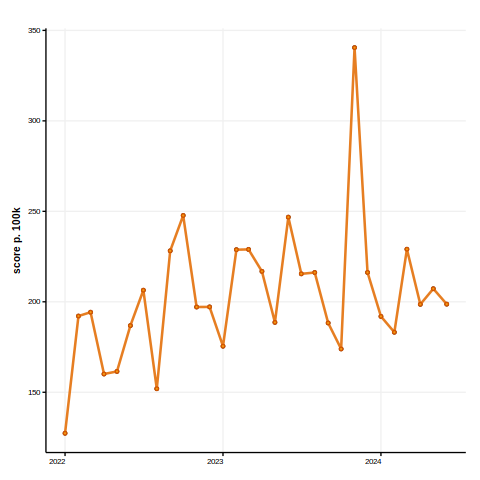

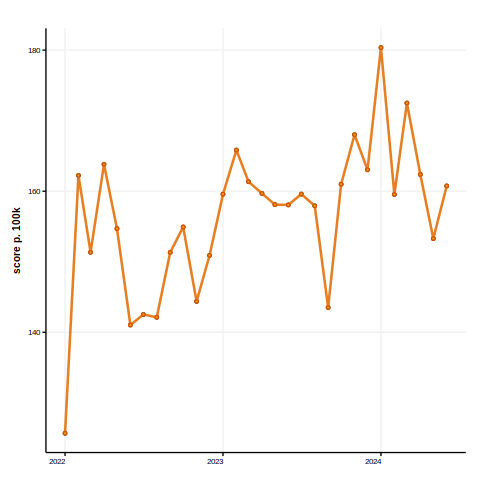

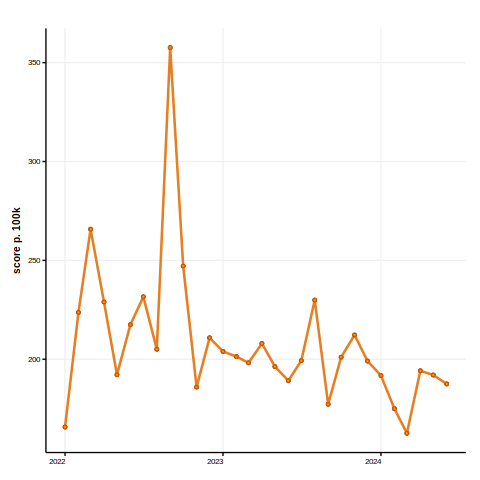

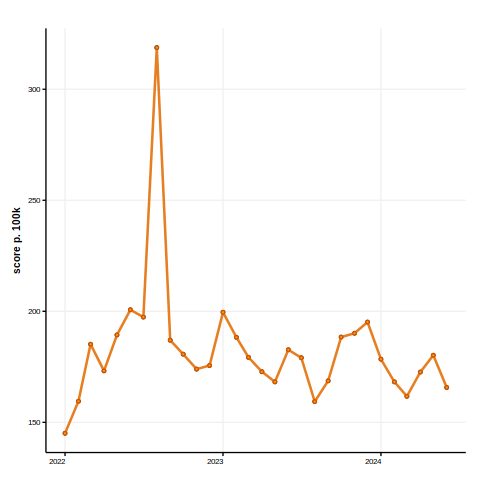

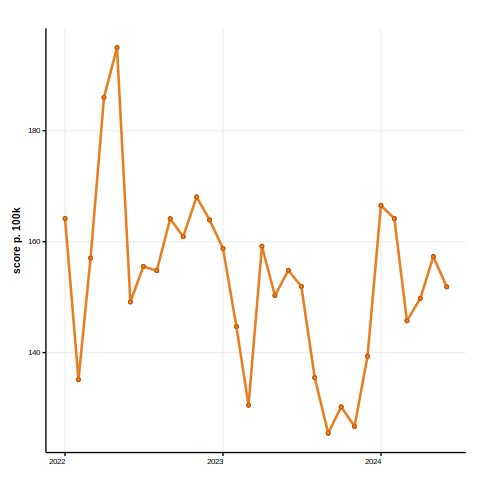

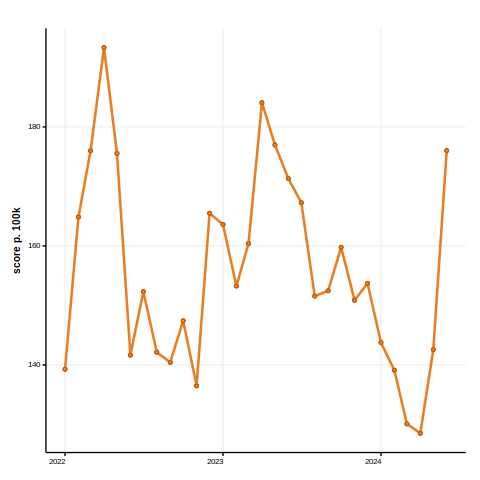

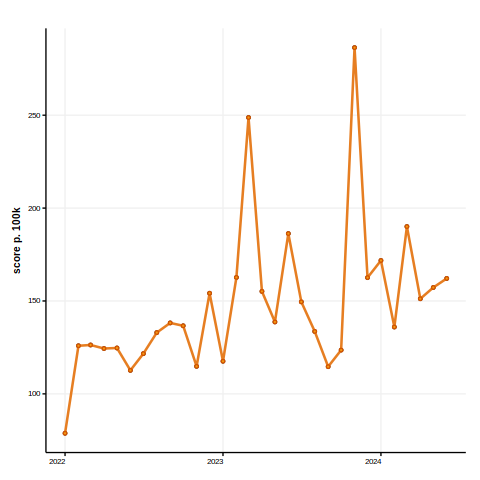

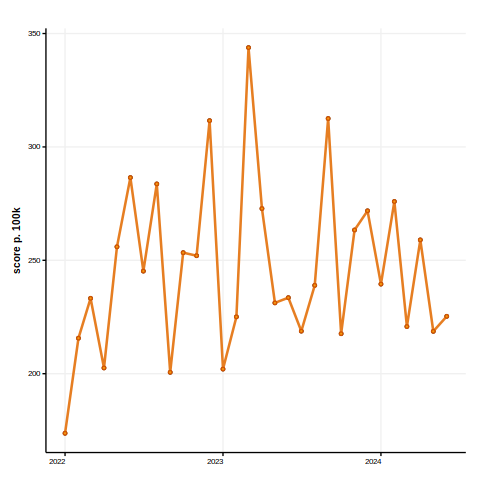

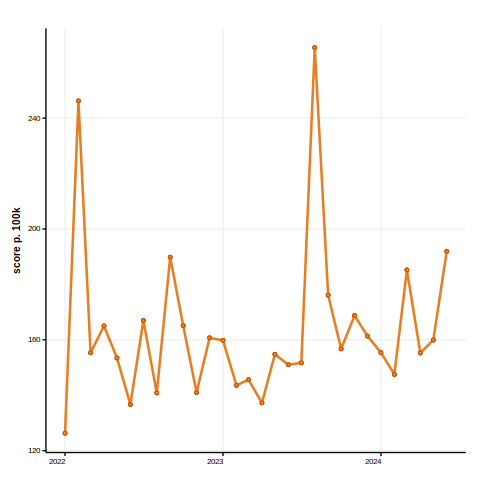

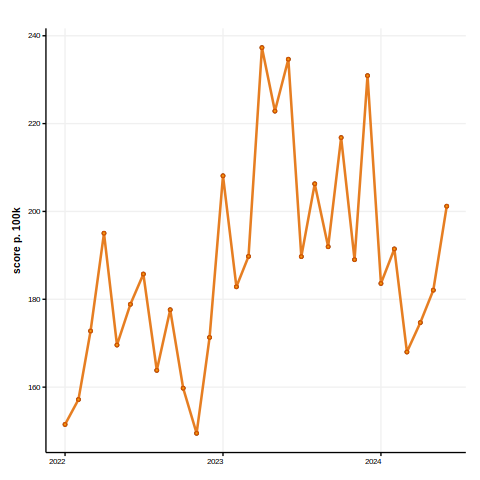

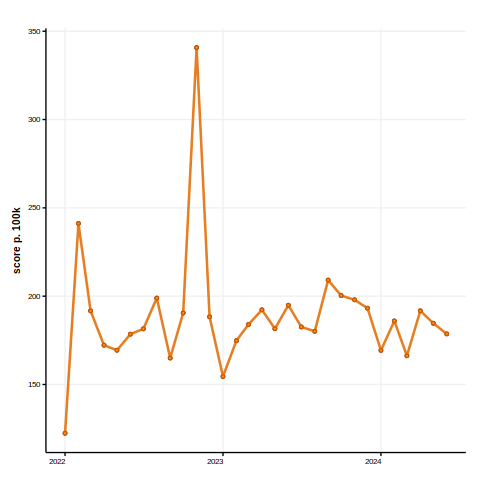

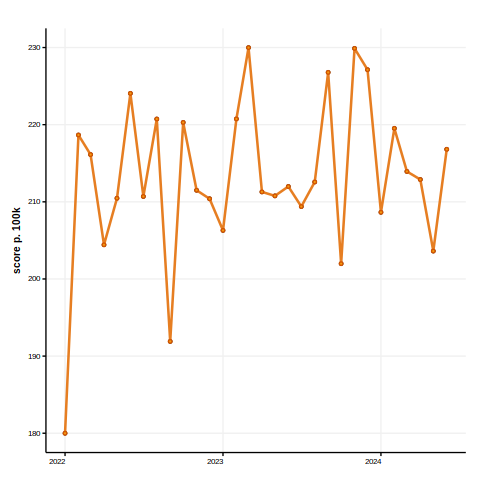

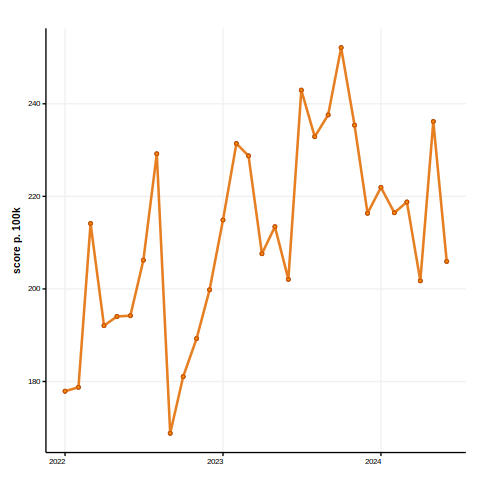

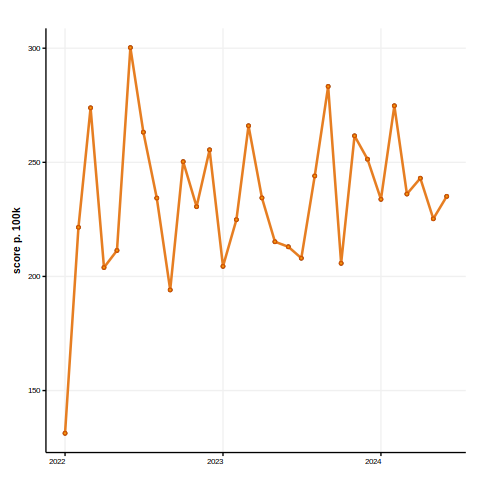

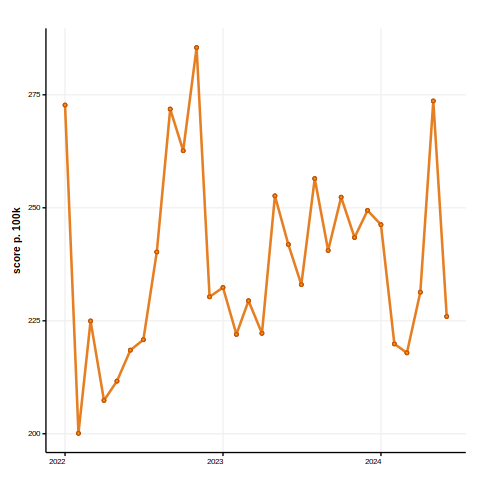

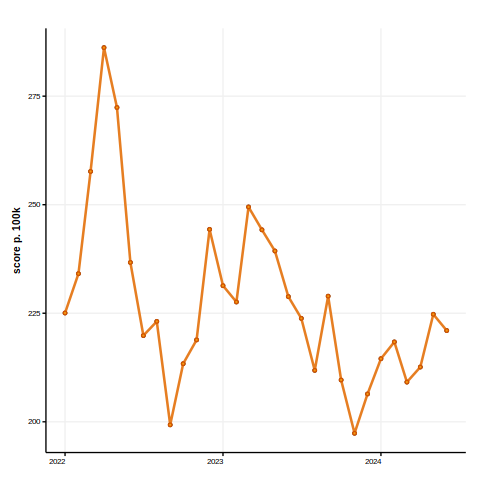

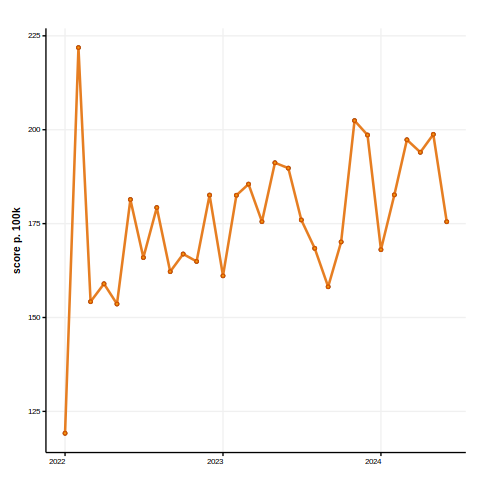

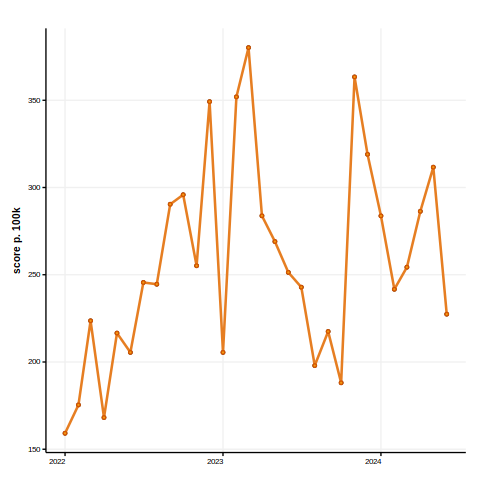

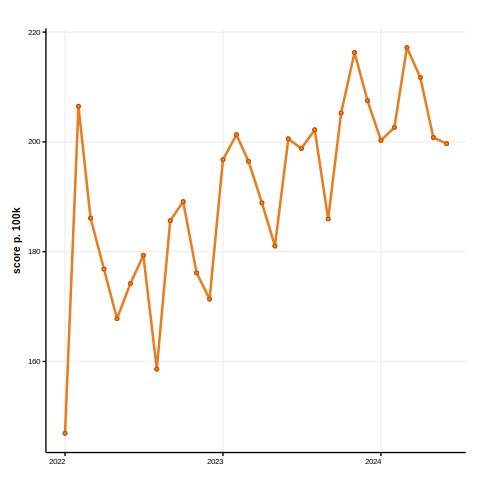

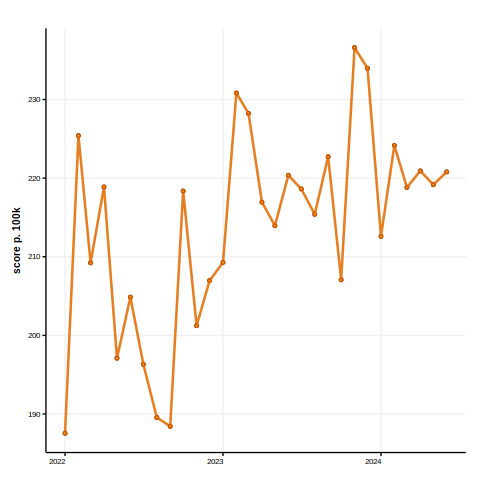

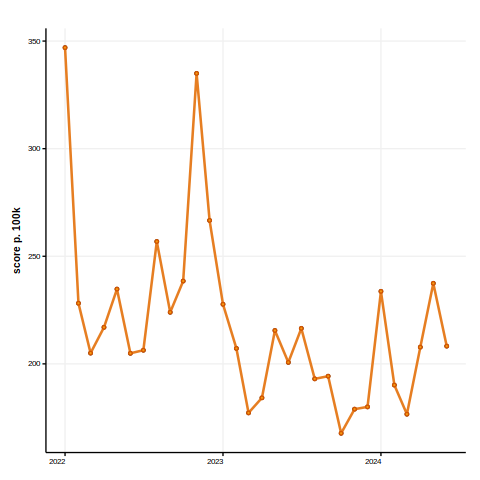

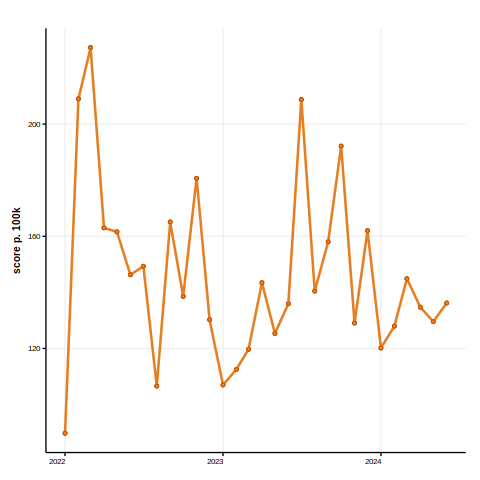

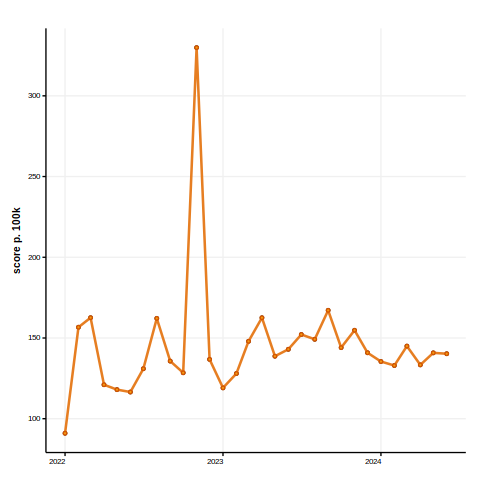

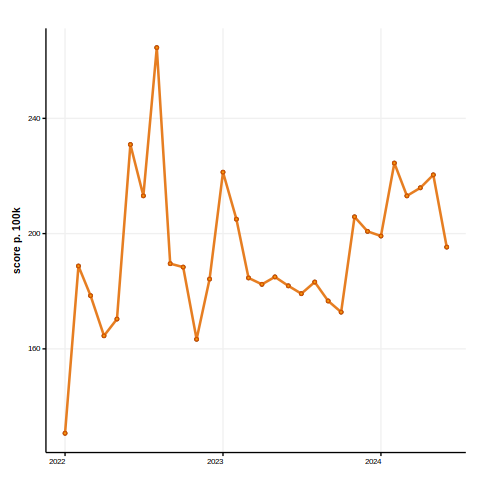

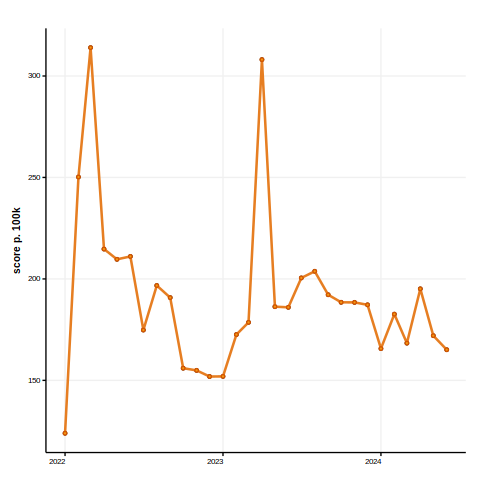

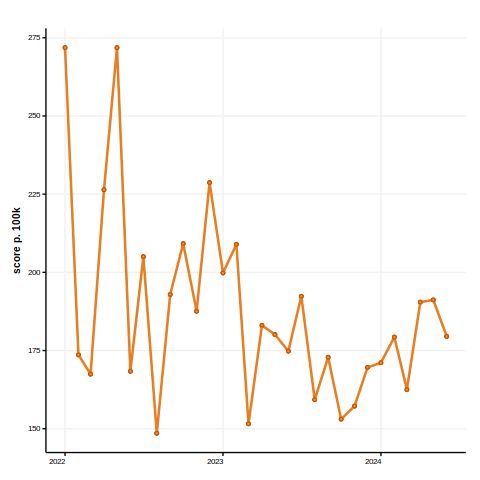

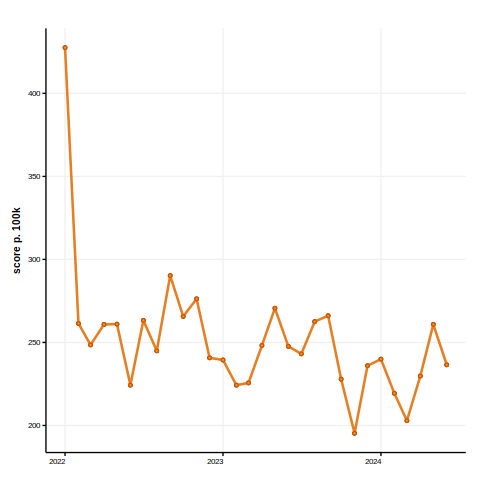

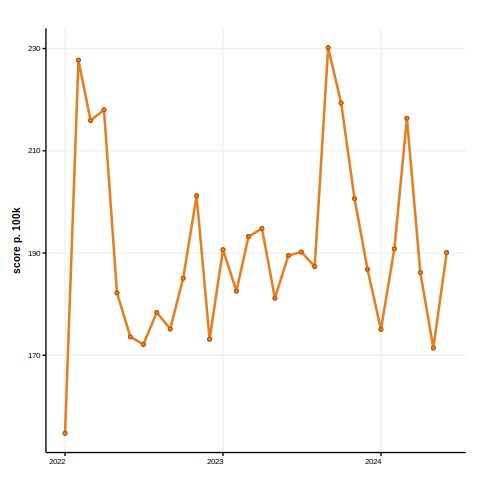

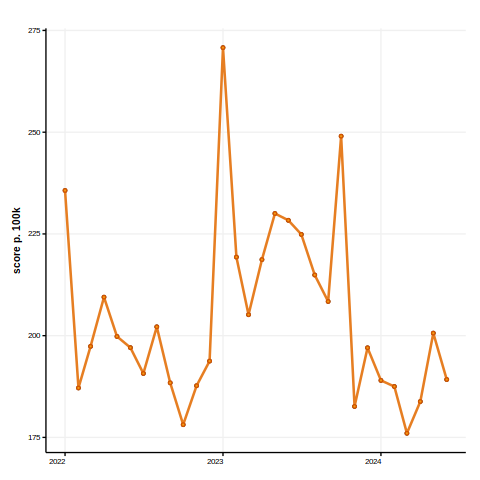

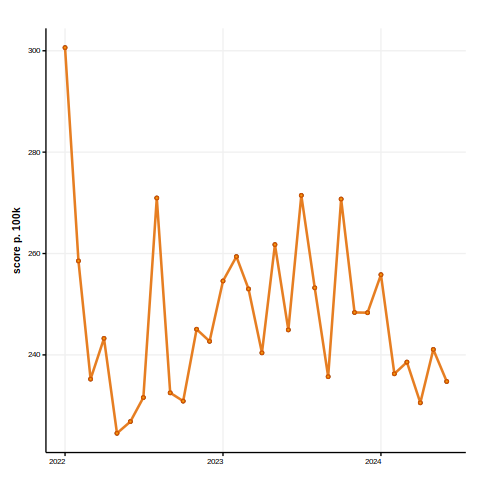

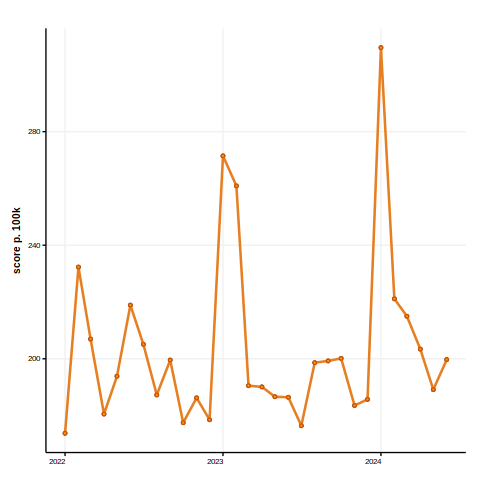

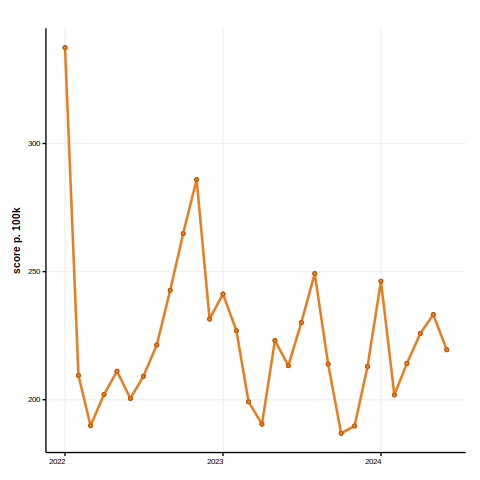

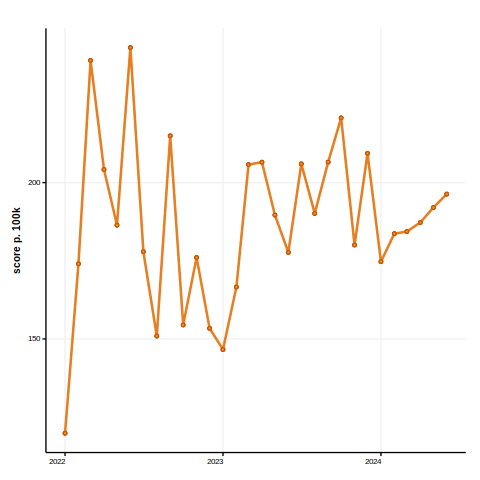

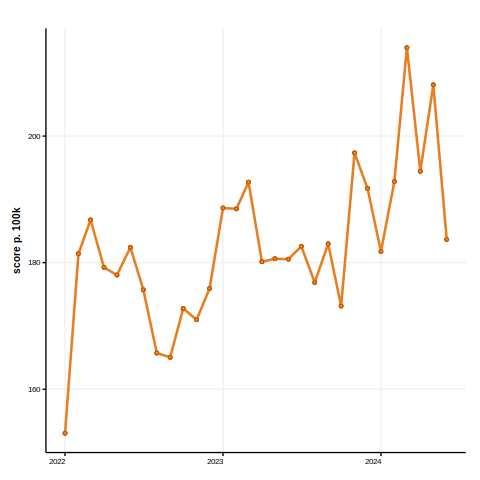

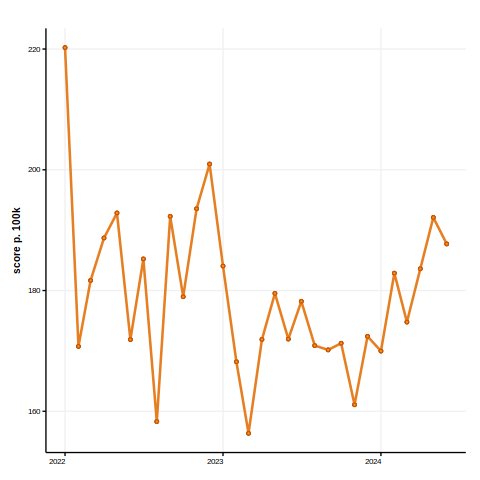

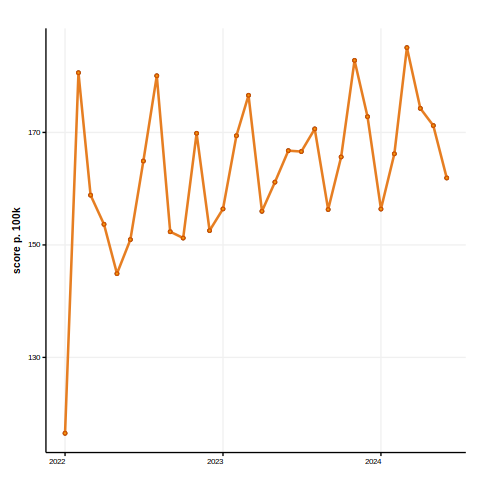

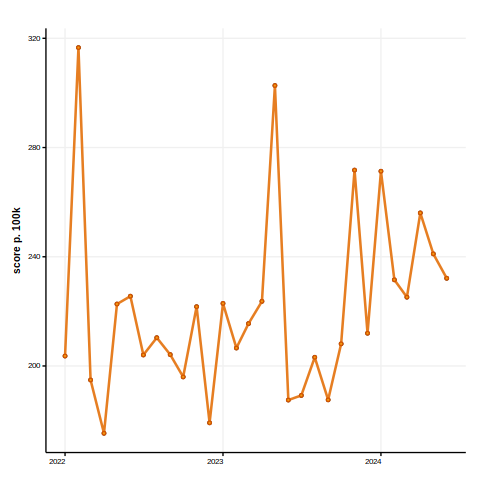

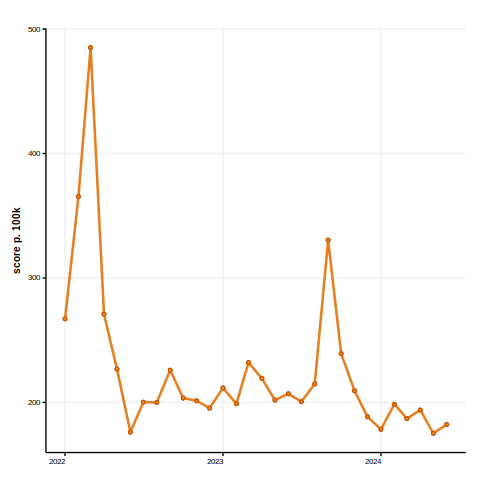

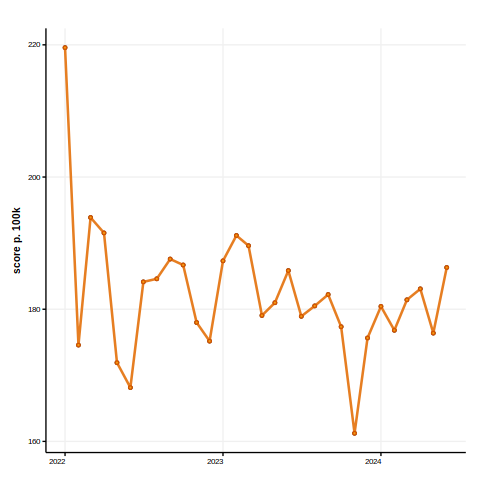

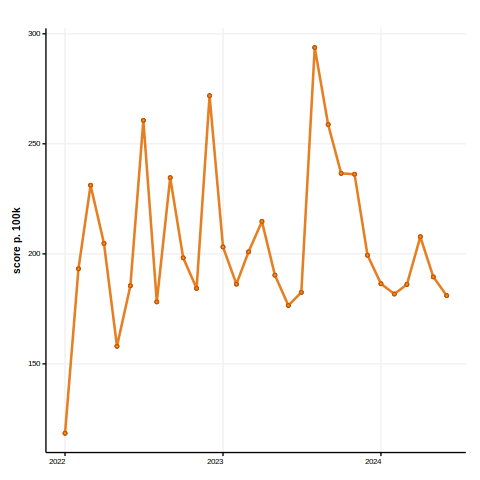

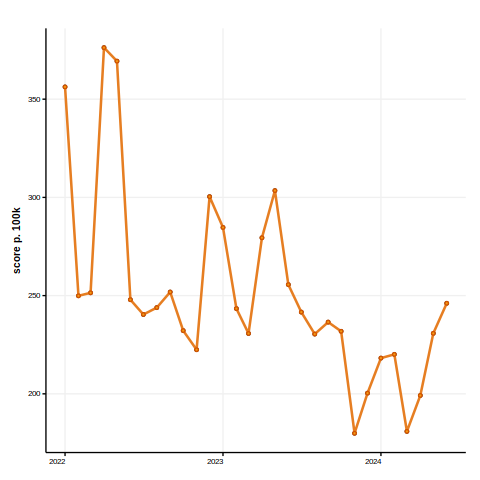

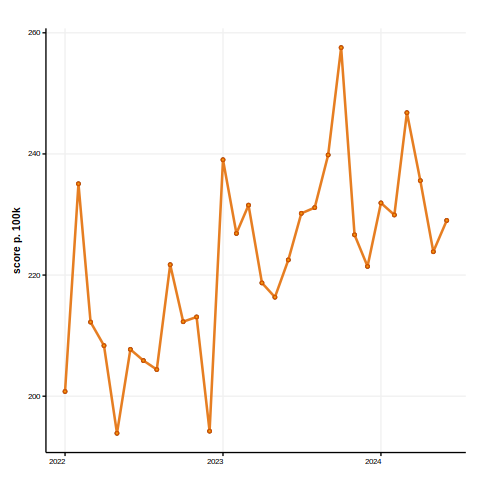

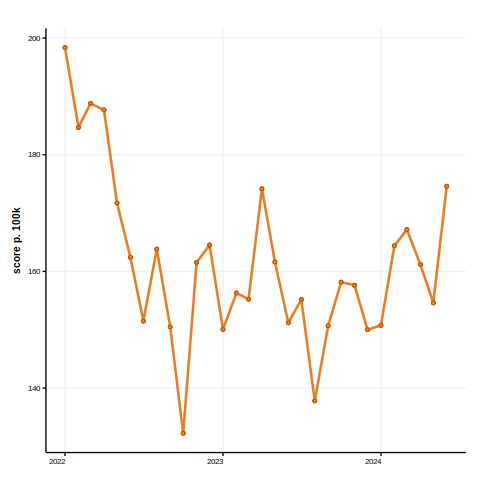

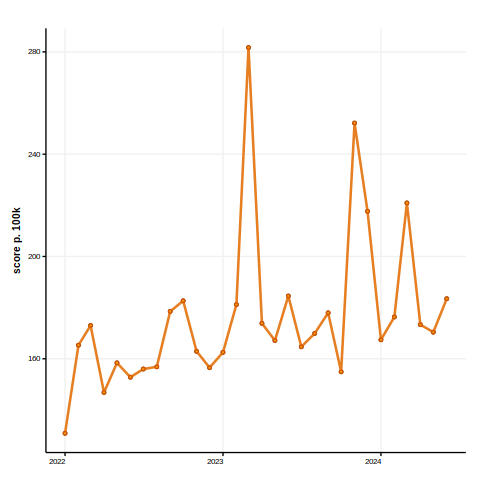

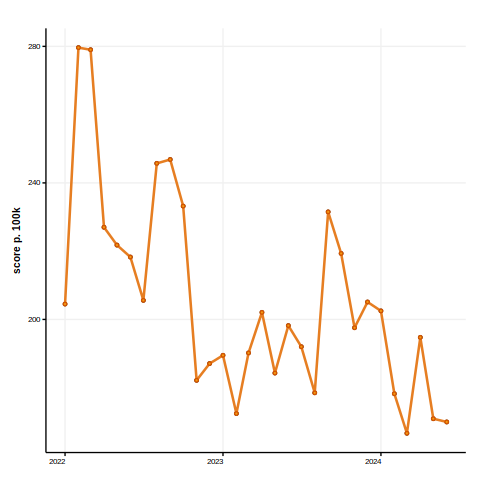

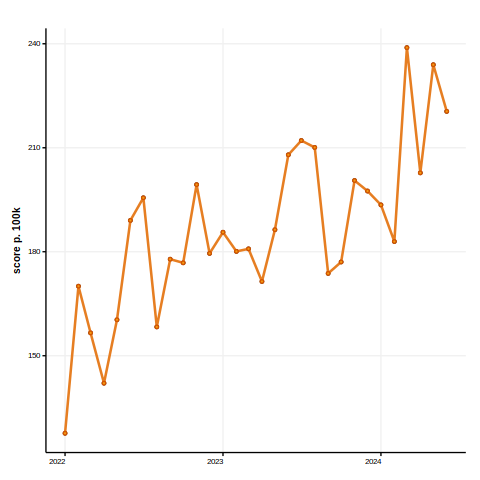

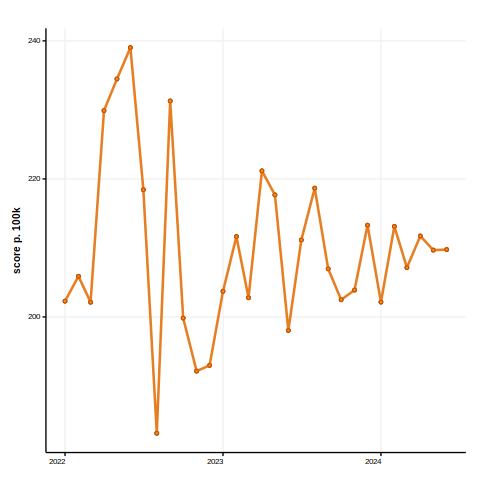

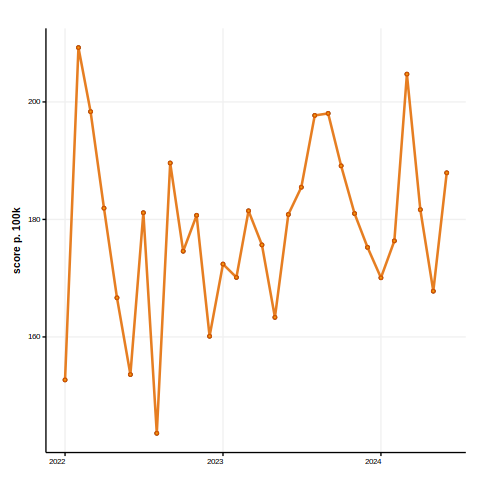

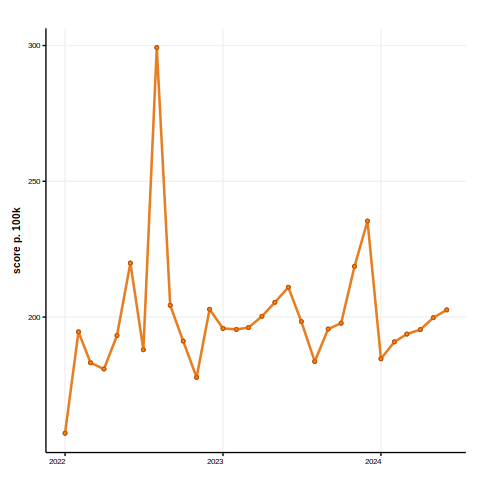

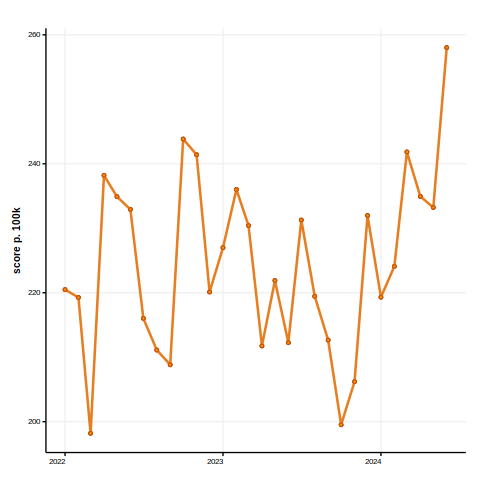

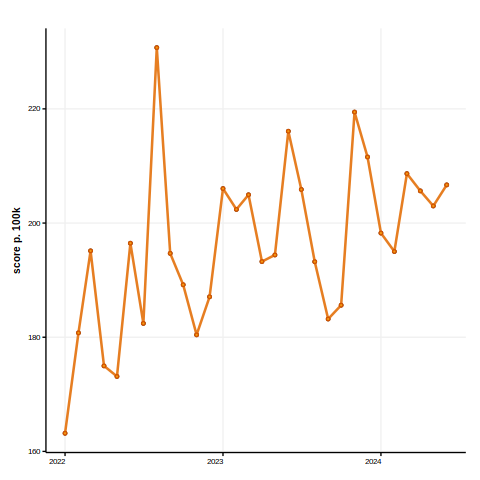

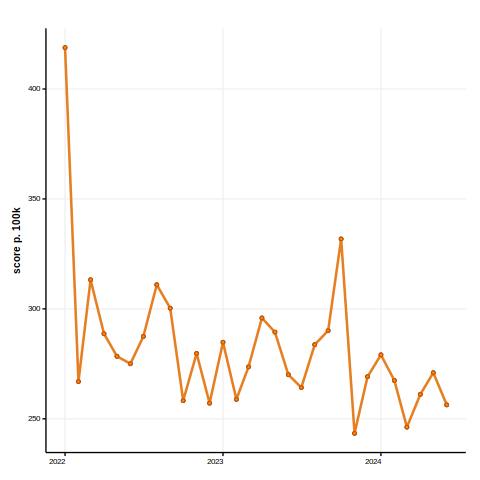

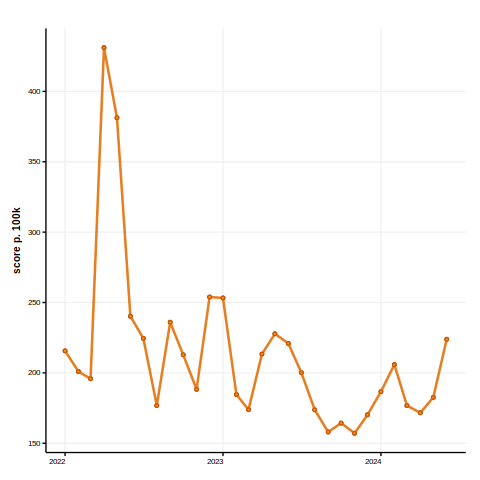

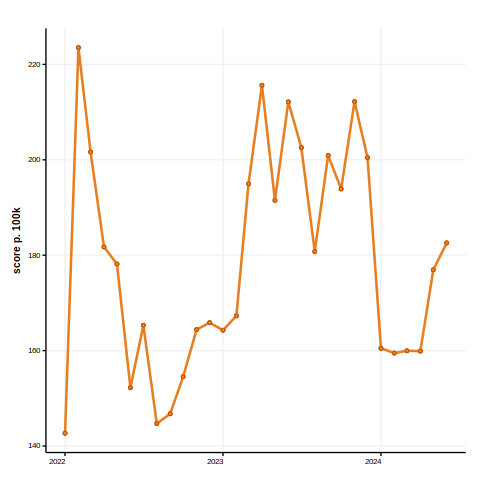

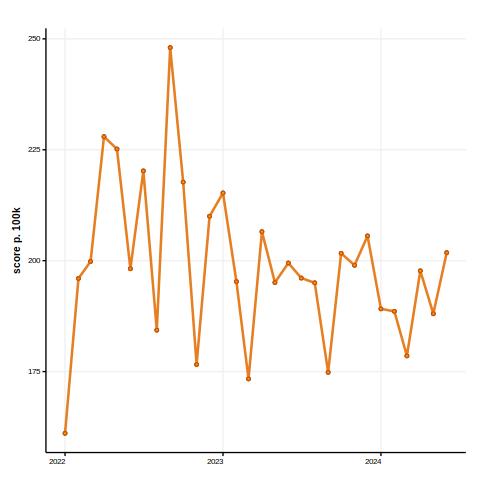

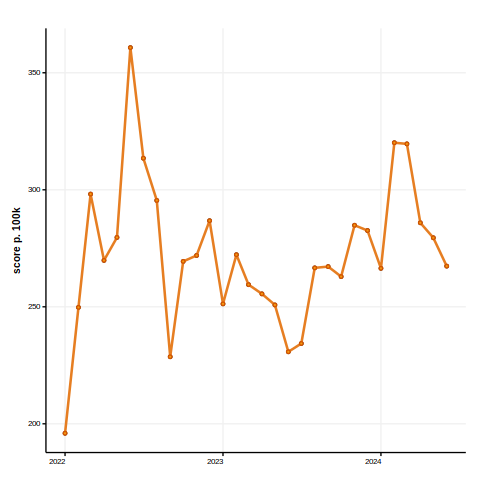

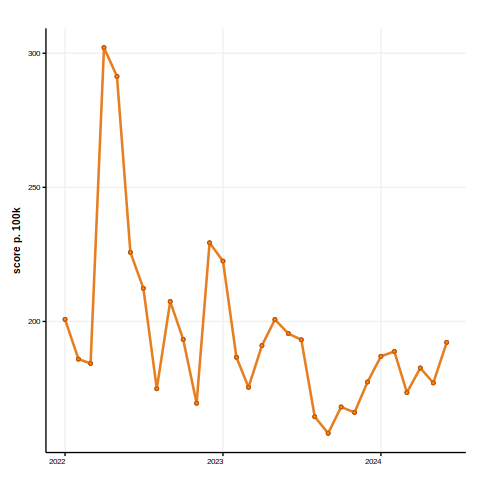

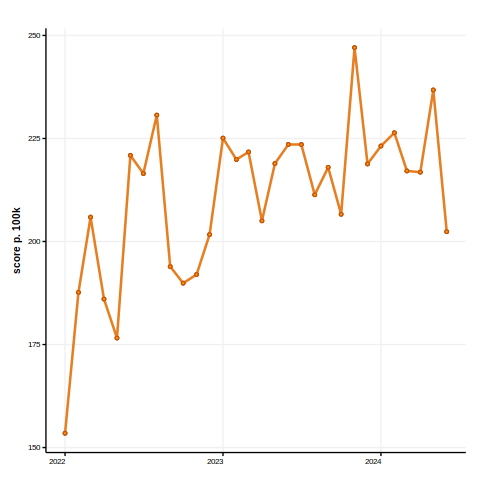

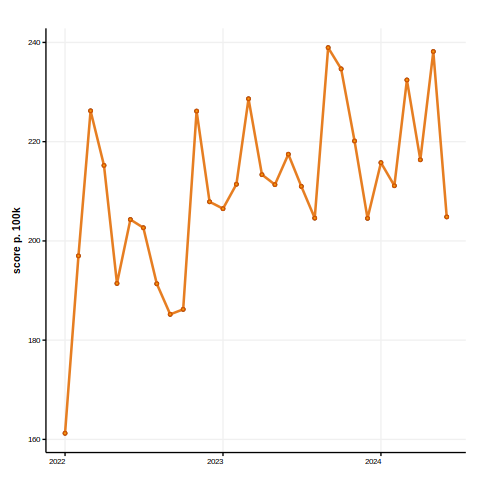

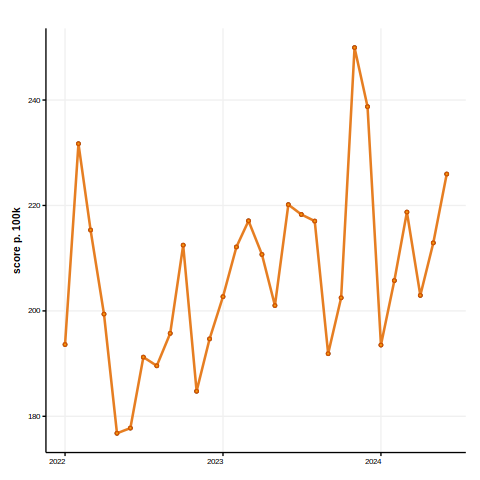

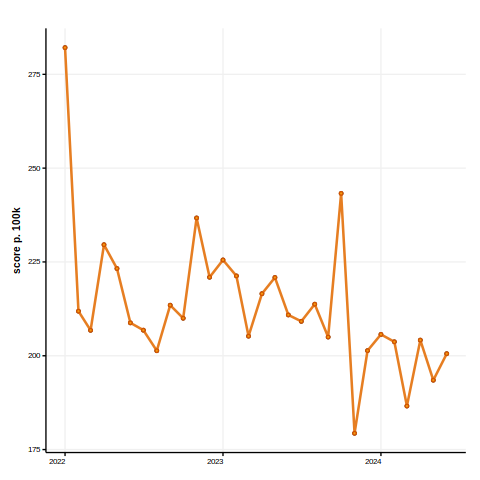

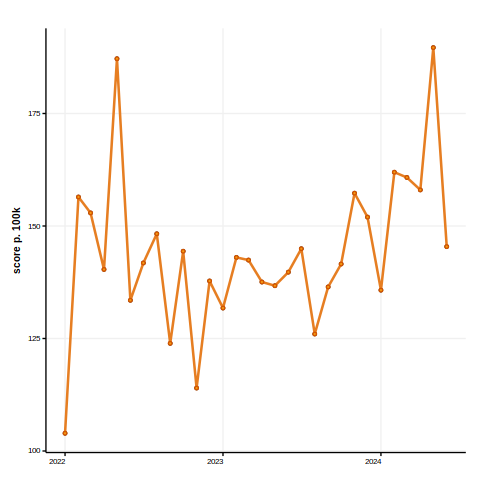

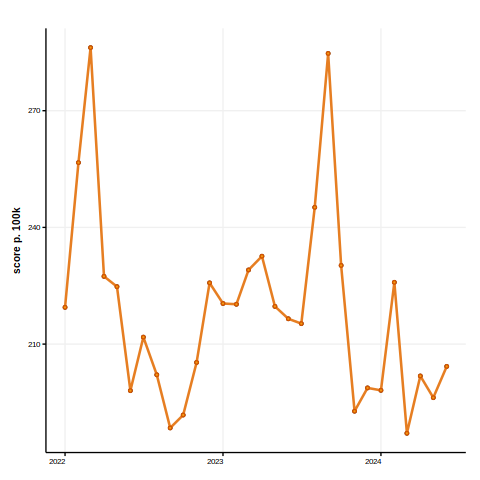

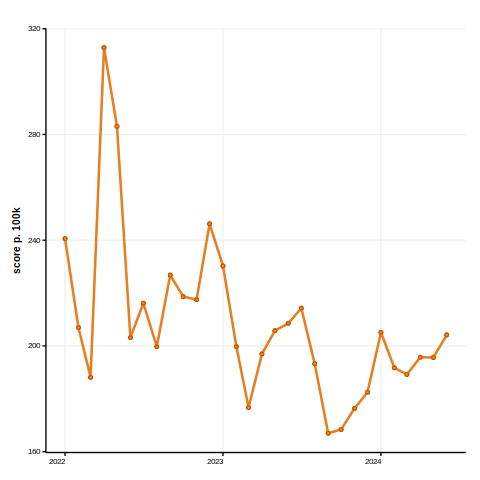

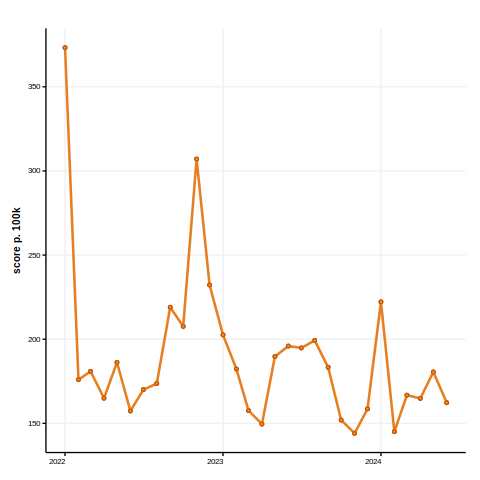

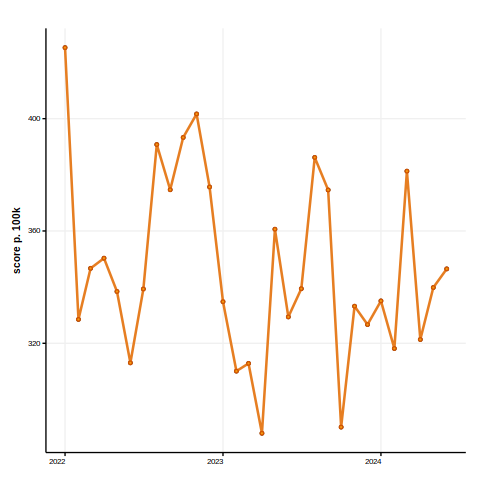

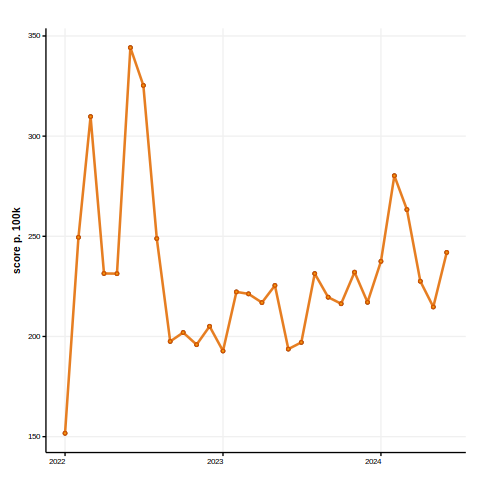

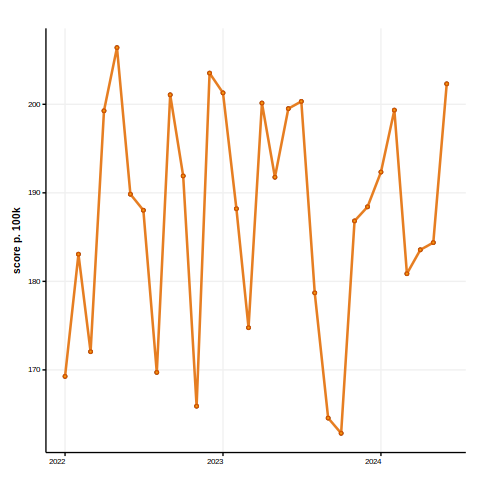

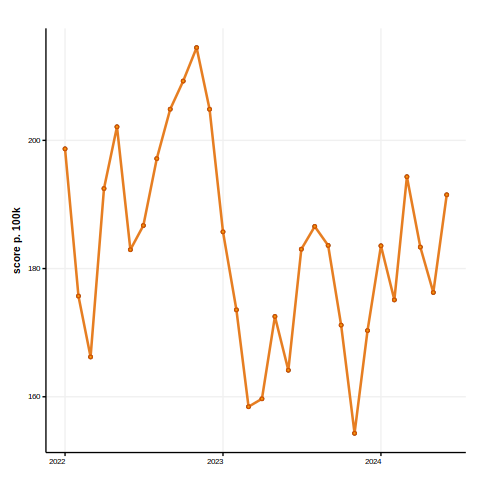

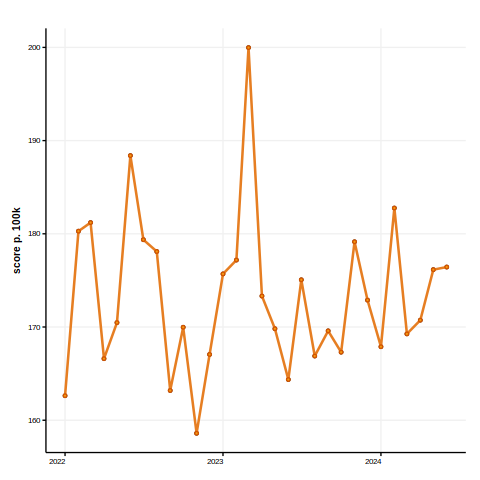

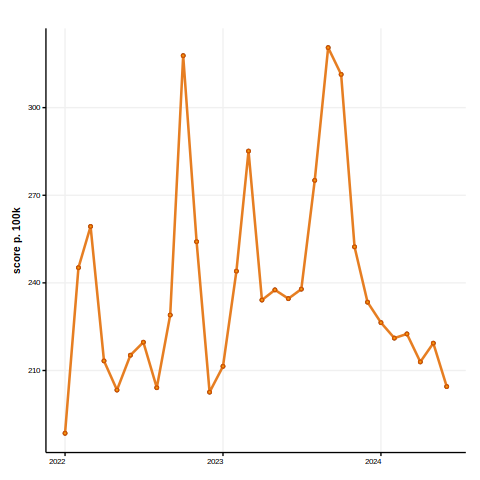

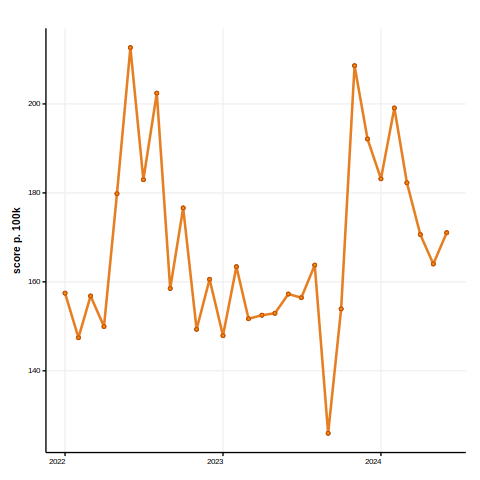

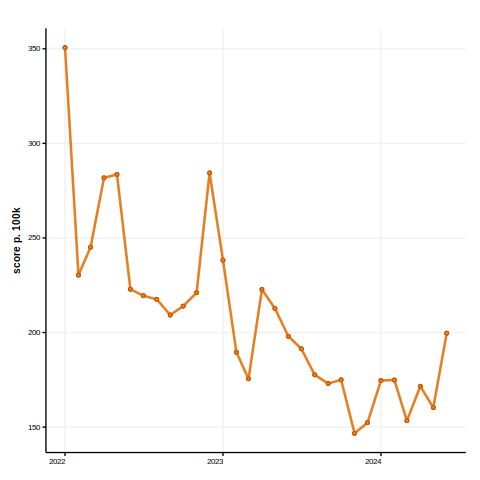

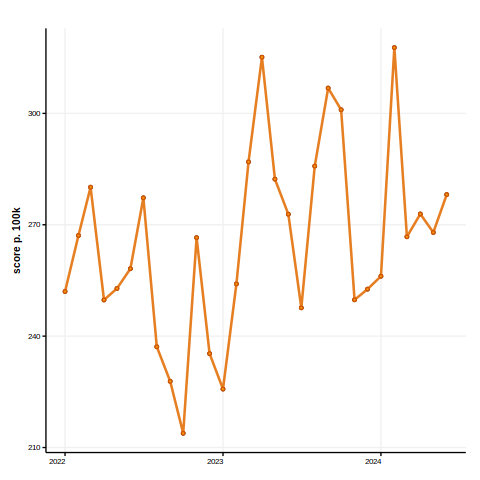

RInterpreterError: Failed to parse and evaluate line '\n\ndeath_tpc7_df$date <- as.Date(paste(death_tpc7_df$year, death_tpc7_df$month, "01", sep="-"))\ndeath_tpc7_df$month_year <- format(death_tpc7_df$date, "%b %Y")\ndeath_tpc7_df$month_year <- factor(death_tpc7_df$month_year, \n                                 levels = unique(death_tpc7_df$month_year[order(death_tpc7_df$date)]))\n\n\n# print(head(death_tpc7_df))\n# columns_to_plot <- c("100")\ncolumns_to_plot <- as.character(0:200)\n\n# Loop through each column\nfor (col in columns_to_plot) {\n\n    death_tpc7_df[[col]] <- death_tpc7_df[[col]] * 100000\n\n    # Create the plot\n    p <- qplot(x = date, y = .data[[col]], data = death_tpc7_df, group = 1, ylab = "score p. 100k") +\n        theme_Publication() +\n        scale_y_continuous(labels = scales::number_format(accuracy = 1)) +\n        scale_x_date(date_breaks = "1 year", date_labels = "%Y", expand = c(0.05, 0.05)) +\n        theme(\n            axis.text.x = element_text(angle = 0, hjust = 1, size = 8),\n            axis.text.y = element_text(size = 8),\n            axis.title.x = element_text(size = 10),\n            axis.title.y = element_text(size = 10)\n        ) +\n\n        # theme(axis.text.x = element_text(angle = 45, hjust = 1), \n        #     plot.margin = margin(t = 10, r = 25, b = 40, l = 10, unit = "pt")) +\n        xlab(NULL) +\n        geom_line(color = "#e67e22", size = 1.2) + \n        geom_point(color = "#d35400", fill = "#f39c12", shape = 21, size = 1, stroke = 1)\n\n    ggsave(paste0("./v2_figures/tpc_", col, ".svg"), plot = p, width = 3.5, height = 1.5, dpi = 300)\n\n    print(col)\n    print(p)\n    # break\n}\n'.
R error message: 'Error in `[[<-.data.frame`(`*tmp*`, col, value = numeric(0)) : \n  replacement has 0 rows, data has 30'

In [33]:
%%R -i death_tpc7_df


death_tpc7_df$date <- as.Date(paste(death_tpc7_df$year, death_tpc7_df$month, "01", sep="-"))
death_tpc7_df$month_year <- format(death_tpc7_df$date, "%b %Y")
death_tpc7_df$month_year <- factor(death_tpc7_df$month_year, 
                                 levels = unique(death_tpc7_df$month_year[order(death_tpc7_df$date)]))


# print(head(death_tpc7_df))
# columns_to_plot <- c("100")
columns_to_plot <- as.character(0:200)

# Loop through each column
for (col in columns_to_plot) {

    death_tpc7_df[[col]] <- death_tpc7_df[[col]] * 100000

    # Create the plot
    p <- qplot(x = date, y = .data[[col]], data = death_tpc7_df, group = 1, ylab = "score p. 100k") +
        theme_Publication() +
        scale_y_continuous(labels = scales::number_format(accuracy = 1)) +
        scale_x_date(date_breaks = "1 year", date_labels = "%Y", expand = c(0.05, 0.05)) +
        theme(
            axis.text.x = element_text(angle = 0, hjust = 1, size = 8),
            axis.text.y = element_text(size = 8),
            axis.title.x = element_text(size = 10),
            axis.title.y = element_text(size = 10)
        ) +

        # theme(axis.text.x = element_text(angle = 45, hjust = 1), 
        #     plot.margin = margin(t = 10, r = 25, b = 40, l = 10, unit = "pt")) +
        xlab(NULL) +
        geom_line(color = "#e67e22", size = 1.2) + 
        geom_point(color = "#d35400", fill = "#f39c12", shape = 21, size = 1, stroke = 1)

    ggsave(paste0("./v2_figures/tpc_", col, ".svg"), plot = p, width = 3.5, height = 1.5, dpi = 300)

    print(col)
    print(p)
    # break
}

# Barplot FUNC

In [103]:
%%R

plot_barplot <- function(mae_df, axes_labels, significance, name) {
    p <- arima_barplot(mae_df, axes_labels, significance)
    ggsave(paste0("./v2_figures/arima_barplots_",name, ".svg" ), plot = p, width = 3.5, height = 3.5, dpi = 300)
    print(p)
    return(p)
}

arima_barplot <- function(mae_df, axes_labels, significance) {
    mae_df$group <- factor(mae_df$group, levels = unique(mae_df$group))

    sig_df <- data.frame(
        group = unique(mae_df$group),
        label = significance,
        y_pos = max(mae_df$`Percent Decrease in MAE`) + 5
    )
    
    p <- ggplot(mae_df, aes(x = group, y = `Percent Decrease in MAE`)) +
        geom_bar(stat = "identity", fill = "grey", alpha = 0.7) +
        scale_x_discrete(labels = axes_labels) +
        xlab("Exogenous Variable") +
        ylab("MAE Decrease (%)") +
        geom_text(data = sig_df, aes(x = group, y = y_pos, label = label), size = 5) +
        theme_minimal() +
        theme_Publication() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  return(p)
}

# ARIMA 

In [97]:
with open("../data/arima_results_6.json", 'r') as f:
    arima_results = json.load(f)
    arima_results["cdc"]["error"] = arima_results["cdc"]["error"][3:]
    
groups = list(arima_results.keys())
groups

['cdc', '198', '166', '28', '103', '123']

## absolute errors

In [98]:
threshold = 0.05/5
threshold

0.01

In [51]:
mae_df = pd.DataFrame([
    {'group': group, '|error|': mae}
    for group in list(arima_results.keys())
    for mae in arima_results[group]["error"]
])
axes_labels = ["CDC", "CDC + Tpc 198", "CDC + Tpc 166", "CDC + Tpc 28", "CDC + Tpc 103", "CDC + Tpc 123"]

significance = ["", "**", "**", "", "", "**"] 
mae_df

group   |error|
0    cdc  0.198952
1    cdc  0.327154
2    cdc  0.364193
3    cdc  0.327916
4    cdc  0.388894
5    cdc  0.496180
6    cdc  0.465130
7    cdc  0.504458
8    cdc  0.236943
9    cdc  0.509145
10   198  0.212964
11   198  0.192555
12   198  0.362564
13   198  0.311550
14   198  0.370792
15   198  0.158831
16   198  0.386350
17   198  0.137711
18   198  0.210311
19   198  0.059797
20   166  0.195834
21   166  0.207320
22   166  0.350628
23   166  0.317939
24   166  0.375272
25   166  0.440885
26   166  0.427006
27   166  0.124257
28   166  0.202196
29   166  0.062709
30    28  0.193278
31    28  0.187101
32    28  0.301112
33    28  0.263753
34    28  0.128250
35    28  0.226553
36    28  0.274747
37    28  0.454292
38    28  0.409102
39    28  0.495096
40   103  0.189410
41   103  0.242865
42   103  0.110347
43   103  0.327614
44   103  0.388867
45   103  0.477577
46   103  0.435160
47   103  0.327202
48   103  0.396943
49   103  0.522115
50   123  0.202530
51   123  0.208511
52   123  0.348460
53   123  0.281283
54   123  0.370602
55   123  0.451907
56   123  0.455261
57   123  0.474483
58   123  0.166300
59   123  0.231780

In [99]:
mae_df = pd.DataFrame([
    {'group': group, 'Percent Decrease in MAE': arima_results[group]["mae_diff"]*100}
    for group in list(arima_results.keys())[1:]
])

axes_labels = ["Tpc 198", "Tpc 166", "Tpc 28", "Tpc 103", "Tpc 123"]


significance = ["**", "**", "", "", "**"]
mae_df

group  Percent Decrease in MAE
0   198                37.066069
1   166                29.194313
2    28                23.191688
3   103                10.496706
4   123                16.440249

/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


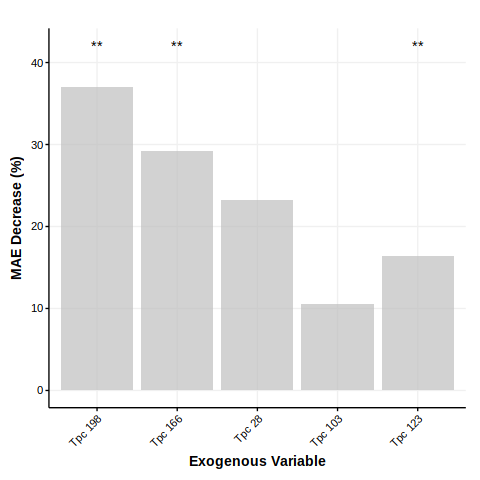

RecursionError: maximum recursion depth exceeded in comparison

In [104]:
name = "top_tpcs"
%R -i mae_df -i axes_labels -i significance -i name
%R plot_barplot(mae_df, axes_labels, significance, name)

In [19]:
%%R -i mae_df -i axes_labels -i significance

mae_df$group <- factor(mae_df$group, levels = unique(mae_df$group))

sig_y <- max(mae_df$`|error|`) * 1.1

sig_df <- data.frame(
    group = unique(mae_df$group),
    label = significance,
    y_pos = max(mae_df$`|error|`) + 0.03
)

# sig_df
p <- ggplot(mae_df, aes(x = group, y = `|error|`)) +
    geom_boxplot(fill = "grey", alpha = 0.7) +
    scale_x_discrete(labels = axes_labels) +
    xlab("ARIMA Input") +
    # geom_text(data = sig_df, aes(x = group, y = y_pos, label = label), size = 5) +
    theme_minimal() +
    theme_Publication() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# ggsave("./v2_figures/arima_abs_errors.svg", plot = p, width = 3.5, height = 3.5, dpi = 300)
# ggsave("./v2_figures/arima_abs_errors_sig.svg", plot = p, width = 3.5, height = 3.5, dpi = 300)
p

Error in `geom_boxplot()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object '|error|' not found
Run `rlang::last_trace()` to see where the error occurred.


/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In max(mae_df$`|error|`) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf

R[write to console]: 2: 
R[write to console]: In max(mae_df$`|error|`) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf

R[write to console]: 3: `legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing` 



RRuntimeError: Error in geom_boxplot(fill = "grey", alpha = 0.7) : 
ℹ Error occurred in the 1st layer.
Caused by error:
! object '|error|' not found


## prediction plot

In [159]:
print(arima_results["198"]["predictions"], len(arima_results["75"]["predictions"]))

[1.8780038180367158, 1.849334959510701, 1.8930984881973947, 1.88430878531612, 1.8806659377691333, 1.2389944642568842, 1.804045637946819, 1.477063829469162, 1.5182605906336866, 1.3004360215174617] 12


In [169]:
acutal_deaths = death_tpc7_df.loc[32:,["Month Code", "syn_opioid_norm"]]
acutal_deaths["cdc_arima"] = arima_results["cdc"]["predictions"][3:]
acutal_deaths["tpc198_arima"] = arima_results["123"]["predictions"]
acutal_deaths

Month Code  syn_opioid_norm  cdc_arima  tpc198_arima
32    2023/09         1.665039   1.863992      1.867570
33    2023/10         1.656780   1.983934      1.865292
34    2023/11         1.530534   1.894727      1.878994
35    2023/12         1.572759   1.900675      1.854042
36    2024/01         1.509873   1.898768      1.880475
37    2024/02         1.397826   1.894006      1.849732
38    2024/03         1.417696   1.882826      1.872957
39    2024/04         1.339353   1.843811      1.813837
40    2024/05         1.307950   1.544892      1.474250
41    2024/06         1.240639   1.749785      1.472420

/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


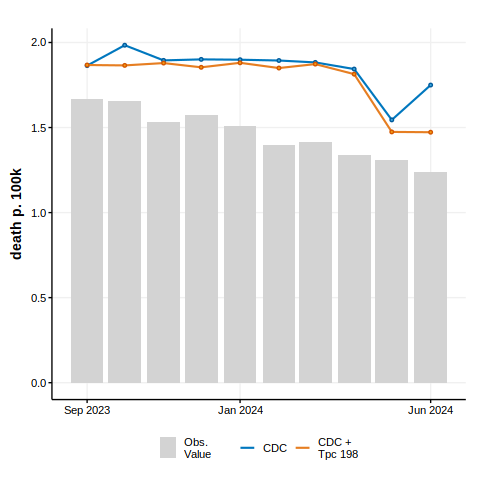

In [170]:
%%R -i acutal_deaths

acutal_deaths$date <- ymd(paste0(gsub("/", "-", acutal_deaths$`Month Code`), "-01"))
date_range <- range(acutal_deaths$date)
middle_date <- acutal_deaths$date[5]


p <- ggplot(acutal_deaths, aes(x = date)) +
    geom_col(aes(y = syn_opioid_norm, fill = "Obs.\nValue")) +
    
    geom_line(aes(y = cdc_arima, color = "CDC"), size = 1) +
    geom_point(aes(y = cdc_arima), color = "#005a9c", fill = "#39a5dc", shape = 21, size = 1, stroke=1) +

    geom_line(aes(y = tpc198_arima, color = "CDC +\nTpc 198"), size = 1) +
    geom_point(aes(y = tpc198_arima), color = "#d35400", fill = "#f39c12", shape = 21, size = 1, stroke=1) +

    scale_fill_manual(values = c("Obs.\nValue" = "lightgrey")) +
    scale_color_manual(values = c("CDC" = "#0077be",
                                "CDC +\nTpc 198" = "#e67e22")) +
    
    scale_x_date(breaks = c(date_range[1], middle_date, date_range[2]),
                 date_labels = "%b %Y") +
    ylab("death p. 100k") + xlab(NULL) +
    theme_minimal() +
    theme_Publication_leaveLegend() +
    theme(legend.position = "bottom",
          legend.title = element_blank())

ggsave("./v2_figures/arima_predictions2_123.svg", plot = p, width = 3.5, height = 3, dpi = 300)

p 

In [172]:
%store -r a

In [173]:
a

Month Code  heroin_norm  nat_opioid_norm  methadone_norm  syn_opioid_norm  \
32    2023/09     0.090098         0.223467        0.071427         1.665039   
33    2023/10     0.084690         0.234822        0.079952         1.656780   
34    2023/11     0.071009         0.215985        0.076039         1.530534   
35    2023/12     0.088098         0.216993        0.088985         1.572759   
36    2024/01     0.073559         0.249627        0.088034         1.509873   
37    2024/02     0.076755         0.215504        0.082364         1.397826   
38    2024/03     0.066962         0.207964        0.074041         1.417696   
39    2024/04     0.080173         0.209863        0.080762         1.339353   
40    2024/05     0.072157         0.212936        0.076280         1.307950   
41    2024/06     0.062091         0.195689        0.079747         1.240639   

    cocaine_norm  unspecified_norm  cannabis_norm group_id         0  ...  \
32      0.678404          0.016597       0.024006   9_2023  0.001877  ...   
33      0.677814          0.018952       0.020136  10_2023  0.001694  ...   
34      0.642333          0.013610       0.021303  11_2023  0.004543  ...   
35      0.656893          0.014782       0.027789  12_2023  0.002118  ...   
36      0.647848          0.015066       0.022747   1_2024  0.002093  ...   
37      0.606659          0.014465       0.024503   2_2024  0.001989  ...   
38      0.619173          0.016519       0.024189   3_2024  0.002755  ...   
39      0.587736          0.015327       0.027412   4_2024  0.001926  ...   
40      0.596102          0.010308       0.017671   5_2024  0.002310  ...   
41      0.568234          0.014125       0.020010   6_2024  0.001857  ...   

          94        95        96        97        98        99  month  \
32  0.002634  0.001782  0.001787  0.001981  0.001899  0.002628      9   
33  0.002989  0.002079  0.001748  0.001789  0.002117  0.002314     10   
34  0.002062  0.001786  0.001479  0.002072  0.001785  0.002327     11   
35  0.002303  0.001881  0.001570  0.001911  0.001852  0.002287     12   
36  0.002239  0.001824  0.001340  0.001632  0.001814  0.002286      1   
37  0.002361  0.001848  0.001374  0.001803  0.001813  0.002005      2   
38  0.002159  0.001946  0.001351  0.002260  0.001695  0.002014      3   
39  0.002234  0.001820  0.001466  0.001774  0.001824  0.002148      4   
40  0.002325  0.001838  0.001395  0.001765  0.001846  0.002238      5   
41  0.002386  0.001880  0.001443  0.001959  0.001920  0.001945      6   

    month_str  year  combo_28_166  
32          9  2023      1.853833  
33         10  2023      1.841426  
34         11  2023      1.625243  
35         12  2023      1.608221  
36          1  2024      1.527732  
37          2  2024      1.804416  
38          3  2024      1.804023  
39          4  2024      1.580193  
40          5  2024      1.575207  
41          6  2024      1.573528  

[10 rows x 213 columns]

In [201]:
a["cdc_arima"] = acutal_deaths["cdc_arima"].copy()
a

Month Code  heroin_norm  nat_opioid_norm  methadone_norm  syn_opioid_norm  \
32    2023/09     0.090098         0.223467        0.071427         1.665039   
33    2023/10     0.084690         0.234822        0.079952         1.656780   
34    2023/11     0.071009         0.215985        0.076039         1.530534   
35    2023/12     0.088098         0.216993        0.088985         1.572759   
36    2024/01     0.073559         0.249627        0.088034         1.509873   
37    2024/02     0.076755         0.215504        0.082364         1.397826   
38    2024/03     0.066962         0.207964        0.074041         1.417696   
39    2024/04     0.080173         0.209863        0.080762         1.339353   
40    2024/05     0.072157         0.212936        0.076280         1.307950   
41    2024/06     0.062091         0.195689        0.079747         1.240639   

    cocaine_norm  unspecified_norm  cannabis_norm group_id         0  ...  \
32      0.678404          0.016597       0.024006   9_2023  0.001877  ...   
33      0.677814          0.018952       0.020136  10_2023  0.001694  ...   
34      0.642333          0.013610       0.021303  11_2023  0.004543  ...   
35      0.656893          0.014782       0.027789  12_2023  0.002118  ...   
36      0.647848          0.015066       0.022747   1_2024  0.002093  ...   
37      0.606659          0.014465       0.024503   2_2024  0.001989  ...   
38      0.619173          0.016519       0.024189   3_2024  0.002755  ...   
39      0.587736          0.015327       0.027412   4_2024  0.001926  ...   
40      0.596102          0.010308       0.017671   5_2024  0.002310  ...   
41      0.568234          0.014125       0.020010   6_2024  0.001857  ...   

          95        96        97        98        99  month  month_str  year  \
32  0.001782  0.001787  0.001981  0.001899  0.002628      9          9  2023   
33  0.002079  0.001748  0.001789  0.002117  0.002314     10         10  2023   
34  0.001786  0.001479  0.002072  0.001785  0.002327     11         11  2023   
35  0.001881  0.001570  0.001911  0.001852  0.002287     12         12  2023   
36  0.001824  0.001340  0.001632  0.001814  0.002286      1          1  2024   
37  0.001848  0.001374  0.001803  0.001813  0.002005      2          2  2024   
38  0.001946  0.001351  0.002260  0.001695  0.002014      3          3  2024   
39  0.001820  0.001466  0.001774  0.001824  0.002148      4          4  2024   
40  0.001838  0.001395  0.001765  0.001846  0.002238      5          5  2024   
41  0.001880  0.001443  0.001959  0.001920  0.001945      6          6  2024   

    combo_28_166  cdc_arima  
32      1.853833   1.863992  
33      1.841426   1.983934  
34      1.625243   1.894727  
35      1.608221   1.900675  
36      1.527732   1.898768  
37      1.804416   1.894006  
38      1.804023   1.882826  
39      1.580193   1.843811  
40      1.575207   1.544892  
41      1.573528   1.749785  

[10 rows x 214 columns]

In [218]:
%R names(a)

<rpy2.robjects.vectors.StrVector object at 0x7f1a96121a40> [RTYPES.STRSXP]
R classes: ('character',)
['Month Co..., 'heroin_n..., 'nat_opio..., 'methadon..., ..., 'month_str', 'year', 'combo_28..., 'cdc_arima']

In [215]:
%%R -i a

a$date <- ymd(paste0(gsub("/", "-", a$`Month Code`), "-01"))
date_range <- range(a$date)
middle_date <- a$date[5]


p <- ggplot(a, aes(x = date)) +
    geom_col(aes(y = syn_opioid_norm, fill = "Obs.\nValue")) +
    
    geom_line(aes(y = cdc_arima, color = "CDC"), size = 1) +
    # geom_point(aes(y = cdc_arima), color = "#005a9c", fill = "#39a5dc", shape = 21, size = 1, stroke=1) 

    geom_line(aes(y = combo_28_166, color = "CDC +\nTpc 82 +\nTpc 166"), size = 1) +
    geom_point(aes(y = combo_28_166), color = "#d35400", fill = "#f39c12", shape = 21, size = 1, stroke=1) +

    scale_fill_manual(values = c("Obs.\nValue" = "lightgrey")) +
    scale_color_manual(values = c("CDC" = "#0077be",
                                "CDC +\nTpc 82 +\nTpc 166" = "#e67e22")) +
    
    scale_x_date(breaks = c(date_range[1], middle_date, date_range[2]),
                 date_labels = "%b %Y") +
    ylab("death p. 100k") + xlab(NULL) +
    theme_minimal() +
    theme_Publication_leaveLegend() +
    theme(legend.position = "bottom",
          legend.title = element_blank())

ggsave("./v2_figures/arima_predictions2_combo.svg", plot = p, width = 3.5, height = 3, dpi = 300)

p 

/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


RParsingError: Parsing status not OK - PARSING_STATUS.PARSE_ERROR

In [206]:
a

Month Code  heroin_norm  nat_opioid_norm  methadone_norm  syn_opioid_norm  \
32    2023/09     0.090098         0.223467        0.071427         1.665039   
33    2023/10     0.084690         0.234822        0.079952         1.656780   
34    2023/11     0.071009         0.215985        0.076039         1.530534   
35    2023/12     0.088098         0.216993        0.088985         1.572759   
36    2024/01     0.073559         0.249627        0.088034         1.509873   
37    2024/02     0.076755         0.215504        0.082364         1.397826   
38    2024/03     0.066962         0.207964        0.074041         1.417696   
39    2024/04     0.080173         0.209863        0.080762         1.339353   
40    2024/05     0.072157         0.212936        0.076280         1.307950   
41    2024/06     0.062091         0.195689        0.079747         1.240639   

    cocaine_norm  unspecified_norm  cannabis_norm group_id         0  ...  \
32      0.678404          0.016597       0.024006   9_2023  0.001877  ...   
33      0.677814          0.018952       0.020136  10_2023  0.001694  ...   
34      0.642333          0.013610       0.021303  11_2023  0.004543  ...   
35      0.656893          0.014782       0.027789  12_2023  0.002118  ...   
36      0.647848          0.015066       0.022747   1_2024  0.002093  ...   
37      0.606659          0.014465       0.024503   2_2024  0.001989  ...   
38      0.619173          0.016519       0.024189   3_2024  0.002755  ...   
39      0.587736          0.015327       0.027412   4_2024  0.001926  ...   
40      0.596102          0.010308       0.017671   5_2024  0.002310  ...   
41      0.568234          0.014125       0.020010   6_2024  0.001857  ...   

          95        96        97        98        99  month  month_str  year  \
32  0.001782  0.001787  0.001981  0.001899  0.002628      9          9  2023   
33  0.002079  0.001748  0.001789  0.002117  0.002314     10         10  2023   
34  0.001786  0.001479  0.002072  0.001785  0.002327     11         11  2023   
35  0.001881  0.001570  0.001911  0.001852  0.002287     12         12  2023   
36  0.001824  0.001340  0.001632  0.001814  0.002286      1          1  2024   
37  0.001848  0.001374  0.001803  0.001813  0.002005      2          2  2024   
38  0.001946  0.001351  0.002260  0.001695  0.002014      3          3  2024   
39  0.001820  0.001466  0.001774  0.001824  0.002148      4          4  2024   
40  0.001838  0.001395  0.001765  0.001846  0.002238      5          5  2024   
41  0.001880  0.001443  0.001959  0.001920  0.001945      6          6  2024   

    combo_28_166  cdc_arima  
32      1.853833   1.863992  
33      1.841426   1.983934  
34      1.625243   1.894727  
35      1.608221   1.900675  
36      1.527732   1.898768  
37      1.804416   1.894006  
38      1.804023   1.882826  
39      1.580193   1.843811  
40      1.575207   1.544892  
41      1.573528   1.749785  

[10 rows x 214 columns]

## controls

### Plotting function

In [105]:
%%R

plot_barplot <- function(mae_df, axes_labels, significance, name) {
    p <- arima_barplot(mae_df, axes_labels, significance)
    ggsave(paste0("./v2_figures/arima_barplots_",name, ".svg" ), plot = p, width = 3.5, height = 3.5, dpi = 300)
    print(p)
    return(p)
}

arima_barplot <- function(mae_df, axes_labels, significance) {
    mae_df$group <- factor(mae_df$group, levels = unique(mae_df$group))

    sig_df <- data.frame(
        group = unique(mae_df$group),
        label = significance,
        y_pos = max(mae_df$`Percent Decrease in MAE`) + 5
    )
    
    p <- ggplot(mae_df, aes(x = group, y = `Percent Decrease in MAE`)) +
        geom_bar(stat = "identity", fill = "grey", alpha = 0.7) +
        scale_x_discrete(labels = axes_labels) +
        xlab("Exogenous Variable") +
        ylab("MAE Decrease (%)") +
        geom_text(data = sig_df, aes(x = group, y = y_pos, label = label), size = 5) +
        theme_minimal() +
        theme_Publication() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  return(p)
}

In [107]:
%%R

plot_boxplot <- function(mae_df, axes_labels, significance, name) {
    p <- arima_boxplot(mae_df, axes_labels, significance)
    ggsave(paste0("./v2_figures/arima_abs_errors_",name, ".svg" ), plot = p, width = 3.5, height = 3.5, dpi = 300)
    print(p)
    return(p)
}

arima_boxplot <- function(mae_df, axes_labels, significance) {
  mae_df$group <- factor(mae_df$group, levels = unique(mae_df$group))

    sig_y <- max(mae_df$`|error|`) * 1.1
    
    sig_df <- data.frame(
        group = unique(mae_df$group),
        label = significance,
        y_pos = max(mae_df$`|error|`) + 0.03
    )
    
    # sig_df
    p <- ggplot(mae_df, aes(x = group, y = `|error|`)) +
        geom_boxplot(fill = "grey", alpha = 0.7) +
        scale_x_discrete(labels = axes_labels) +
        xlab("ARIMA Input") +
        geom_text(data = sig_df, aes(x = group, y = y_pos, label = label), size = 5) +
        theme_minimal() +
        theme_Publication() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))
    
    # ggsave("./v2_figures/arima_abs_errors.svg", plot = p, width = 3.5, height = 3.5, dpi = 300)
    # ggsave("./v2_figures/arima_abs_errors_sig.svg", plot = p, width = 3.5, height = 3.5, dpi = 300)
  
  return(p)
}

### Heart Attack

In [106]:
with open("../data/arima_results_HEART_ATTACK.json", 'r') as f:
    arima_results = json.load(f)
    arima_results["cdc"]["error"] = arima_results["cdc"]["error"][3:]
    
groups = list(arima_results.keys())
groups

['cdc', '123', '166', '198']

In [137]:
[arima_results[g]["pvalue"] for g in groups]

['NA', 0.921875, 0.556640625, 0.10546875]

In [136]:
[np.mean(arima_results[g]["error"]) for g in groups]

[0.15433024846516216,
 0.1468557571563368,
 0.17503136147797937,
 0.3445017207604702]

  group  Percent Decrease in MAE
0   123                 4.843180
1   166               -13.413516
2   198              -123.223719


/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


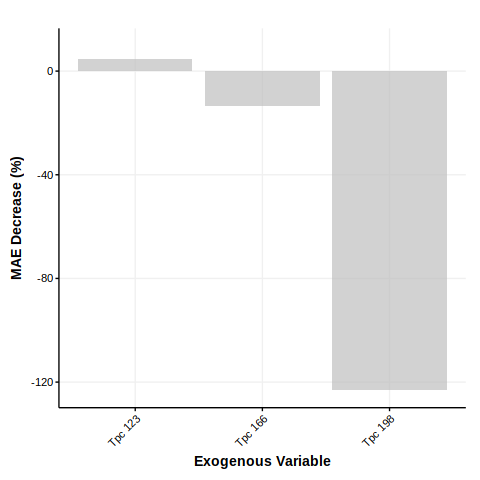

RecursionError: maximum recursion depth exceeded in comparison

In [109]:
mae_df = pd.DataFrame([
    {'group': group, 'Percent Decrease in MAE': arima_results[group]["mae_diff"]*100}
    for group in list(arima_results.keys())[1:]
])

axes_labels = ["Tpc 123", "Tpc 166", "Tpc 198"]
significance = ["", "", ""]
print(mae_df)

name = "heart_attack"
%R -i mae_df -i axes_labels -i significance -i name
%R plot_barplot(mae_df, axes_labels, significance, name)

   group   |error|
0    cdc  0.237411
1    cdc  0.001590
2    cdc  0.071559
3    cdc  0.132736
4    cdc  0.280831
5    cdc  0.078042
6    cdc  0.036914
7    cdc  0.185412
8    cdc  0.196589
9    cdc  0.322219
10   123  0.295889
11   123  0.052531
12   123  0.020512
13   123  0.250551
14   123  0.335071
15   123  0.037553
16   123  0.024076
17   123  0.153106
18   123  0.118704
19   123  0.180564
20   166  0.324562
21   166  0.183945
22   166  0.057437
23   166  0.241702
24   166  0.325931
25   166  0.140550
26   166  0.091456
27   166  0.075273
28   166  0.034793
29   166  0.274665
30   198  0.378795
31   198  0.019218
32   198  0.447059
33   198  0.636866
34   198  0.351395
35   198  0.592776
36   198  0.595414
37   198  0.018264
38   198  0.142009
39   198  0.263220


/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


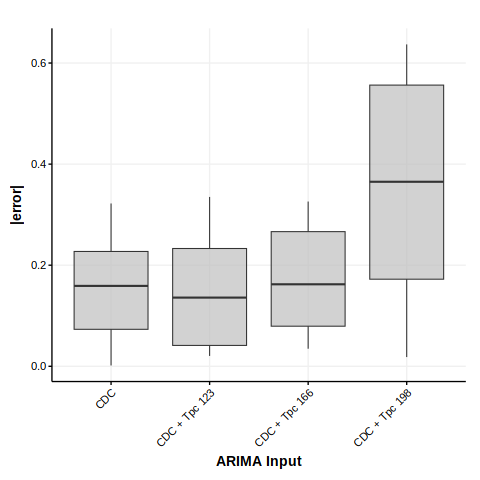

RecursionError: maximum recursion depth exceeded in comparison

In [243]:
mae_df = pd.DataFrame([
    {'group': group, '|error|': mae}
    for group in list(arima_results.keys())
    for mae in arima_results[group]["error"]
])
axes_labels = ["CDC", "CDC + Tpc 123", "CDC + Tpc 166", "CDC + Tpc 198"]
significance = ["", "ns", "ns", "ns"] 
print(mae_df)

name = "heart_attack"
%R -i mae_df -i axes_labels -i significance -i name
%R plot_boxplot(mae_df, axes_labels, significance, name)

### NEG Control

In [111]:
with open("../data/arima_results_NEG_CTRL.json", 'r') as f:
    arima_results = json.load(f)
    arima_results["cdc"]["error"] = arima_results["cdc"]["error"][3:]
    
groups = list(arima_results.keys())
groups

['cdc', '27', '149', '187']

In [134]:
[arima_results[g]["pvalue"] for g in groups]

['NA', 0.203125, 0.4609375, 0.9453125]

In [132]:
[np.mean(arima_results[g]["error"]) for g in groups]

[0.381896531998327,
 0.43209647047988814,
 0.4437862949514949,
 0.39107058431629715]

  group  Percent Decrease in MAE
0     1                11.055328
1     2               -15.915665
2     3                37.066069
3     4                 3.125570
4     5                10.598183
5     6               -12.541677


/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


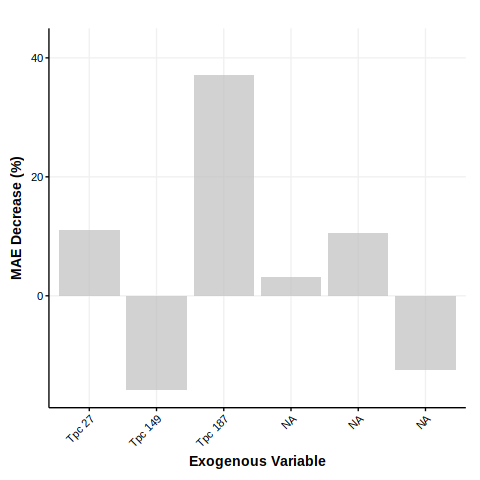

RecursionError: maximum recursion depth exceeded in comparison

In [123]:
mae_df = pd.DataFrame([
    {'group': group, 'Percent Decrease in MAE': arima_results[group]["mae_diff"]*100}
    for group in list(arima_results.keys())[1:]
])

axes_labels = ["Tpc 27", "Tpc 149", "Tpc 187"]
significance = ["", "", ""]
print(mae_df)

name = "neg_ctrl"
%R -i mae_df -i axes_labels -i significance -i name
%R plot_barplot(mae_df, axes_labels, significance, name)

In [122]:
mae_df = pd.DataFrame([
    {'group': group, '|error|': mae}
    for group in list(arima_results.keys())
    for mae in arima_results[group]["error"]
])
axes_labels = ["CDC", "CDC + Tpc 127", "CDC + Tpc 149", "CDC + Tpc 187"]
significance = ["", "ns", "ns", "ns"] 
print(mae_df)

name = "neg_ctrl"
%R -i mae_df -i axes_labels -i significance -i name
%R plot_boxplot(mae_df, axes_labels, significance, name)

/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
R[write to console]: Error in data.frame(group = unique(mae_df$group), label = significance,  : 
  arguments imply differing number of rows: 7, 4, 1

R[write to console]: In addition: 
R[write to console]: There were 16 warnings (use warnings() to see them)
R[write to console]: 



   group   |error|
0    cdc  0.198952
1    cdc  0.327154
2    cdc  0.364193
3    cdc  0.327916
4    cdc  0.388894
..   ...       ...
62     6  0.541983
63     6  0.429879
64     6  0.526448
65     6  0.478329
66     6  0.521925

[67 rows x 2 columns]

Error in data.frame(group = unique(mae_df$group), label = significance,  : 
  arguments imply differing number of rows: 7, 4, 1


RInterpreterError: Failed to parse and evaluate line 'plot_boxplot(mae_df, axes_labels, significance, name)'.
R error message: 'Error in data.frame(group = unique(mae_df$group), label = significance,  : \n  arguments imply differing number of rows: 7, 4, 1'

### Topic 198 Times

In [119]:
with open("../data/arima_results_TPC198_LEAD_TIMES.json", 'r') as f:
    arima_results = json.load(f)
    arima_results["cdc"]["error"] = arima_results["cdc"]["error"][3:]
    
groups = list(arima_results.keys())
groups

['cdc', '1', '2', '3', '4', '5', '6']

  group  Percent Decrease in MAE
0     1                11.055328
1     2               -15.915665
2     3                37.066069
3     4                 3.125570
4     5                10.598183
5     6               -12.541677


/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


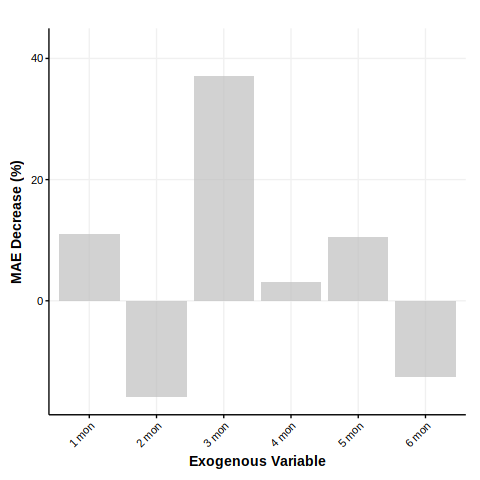

RecursionError: maximum recursion depth exceeded in comparison

In [124]:
mae_df = pd.DataFrame([
    {'group': group, 'Percent Decrease in MAE': arima_results[group]["mae_diff"]*100}
    for group in list(arima_results.keys())[1:]
])

axes_labels = ["1 mon", "2 mon", "3 mon", "4 mon", "5 mon", "6 mon"]
significance =  ["", "", "", "", "", ""]
print(mae_df)

name = "198_times"
%R -i mae_df -i axes_labels -i significance -i name
%R plot_barplot(mae_df, axes_labels, significance, name)

   group   |error|
0     27  0.472607
1     27  0.277655
2     27  0.415579
3     27  0.346383
4     27  0.409174
5     27  0.505232
6     27  0.463586
7     27  0.489005
8     27  0.328107
9     27  0.432369
10   149  0.029777
11   149  0.028062
12   149  0.202624
13   149  0.235077
14   149  0.406557
15   149  0.318393
16   149  0.385164
17   149  0.488356
18   149  0.406576
19   149  0.826538
20   149  0.301611
21   149  0.429863
22   187  0.223371
23   187  0.357973
24   187  0.366250
25   187  0.398645
26   187  0.497193
27   187  0.385298
28   187  0.444958
29   187  0.459015
30   187  0.328822


/opt/miniconda3/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


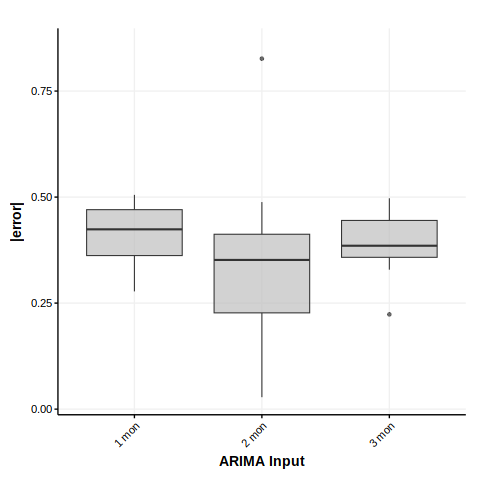

RecursionError: maximum recursion depth exceeded in comparison

In [114]:
mae_df = pd.DataFrame([
    {'group': group, '|error|': mae}
    for group in list(arima_results.keys())[1:]
    for mae in arima_results[group]["error"]
])
axes_labels = ["1 mon", "2 mon", "3 mon", "4 mon", "5 mon", "6 mon"]
significance =  ["", "", "", "", "", ""]
print(mae_df)

name = "tpc198_times"
%R -i mae_df -i axes_labels -i significance -i name
%R plot_boxplot(mae_df, axes_labels, significance, name)

# Lead plots

# tab